In [16]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_new=pd.read_csv("scraped_data.csv")
data_new

Exchange    Symbol     Price  ...   Updated Base Quote
0                 Binance   SOL/BTC  53901.32  ...  Recently  SOL   BTC
1                 Binance   DOT/BTC  53901.32  ...  Recently  DOT   BTC
2              Binance.US   BTC/USD  53965.77  ...  Recently  BTC   USD
3                  FTX US  BTC/USDT  53913.13  ...  Recently  BTC  USDT
4                 Binance   BNB/BTC  53901.32  ...  Recently  BNB   BTC
...                   ...       ...       ...  ...       ...  ...   ...
1903  Independent Reserve   ETC/AUD     54.82  ...  Recently  ETC   AUD
1904               Crex24   ETC/BTC     54.73  ...  Recently  ETC   BTC
1905              NovaDAX  ETC/USDT     54.93  ...  Recently  ETC  USDT
1906               Coinut  ETC/USDT     55.07  ...  Recently  ETC  USDT
1907               Crex24   ETC/ETH     55.02  ...  Recently  ETC   ETH

[1908 rows x 12 columns]

In [3]:
data=data_new.dropna()

In [4]:
data

Exchange    Symbol     Price  ...   Updated Base Quote
0                 Binance   SOL/BTC  53901.32  ...  Recently  SOL   BTC
1                 Binance   DOT/BTC  53901.32  ...  Recently  DOT   BTC
2              Binance.US   BTC/USD  53965.77  ...  Recently  BTC   USD
3                  FTX US  BTC/USDT  53913.13  ...  Recently  BTC  USDT
4                 Binance   BNB/BTC  53901.32  ...  Recently  BNB   BTC
...                   ...       ...       ...  ...       ...  ...   ...
1903  Independent Reserve   ETC/AUD     54.82  ...  Recently  ETC   AUD
1904               Crex24   ETC/BTC     54.73  ...  Recently  ETC   BTC
1905              NovaDAX  ETC/USDT     54.93  ...  Recently  ETC  USDT
1906               Coinut  ETC/USDT     55.07  ...  Recently  ETC  USDT
1907               Crex24   ETC/ETH     55.02  ...  Recently  ETC   ETH

[1806 rows x 12 columns]

In [5]:
#Some volume values containing * so removing * from volume
vol=[]
for i in data.Volume:
  if('*' in i):
    try:
      i=i.replace('*','')
    except:
      pass
    try:
      i=i.replace(" ",'')
    except:
      pass
  vol.append(i)
data.Volume=vol

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
data['Volume']=pd.to_numeric(data['Volume'],downcast='float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df=data.groupby(by='Symbol')

In [8]:
table=pd.DataFrame(columns=['Symbol','Exchange','Volume','Volume %','+2% Depth','-2% Depth','Base','Quote'])
for key, item in df:
    #print(df.get_group(key))
    a=df[["Symbol","Exchange","Volume","Volume %","+2% Depth","-2% Depth",'Base','Quote']].get_group(key)
    b=a.sort_values(by=['Volume'],ascending=False)
    table=table.append(b,ignore_index=True)

In [76]:
table.to_csv("Table.csv")

In [9]:
table_style=table.style.set_caption("Volume on the selected markets 2021-10-08")
table_style

In [11]:
Assets=[]
Quotes=[]
Volumes=[]
Exchanges=[]
group_asset=table.groupby('Base')
for x,z in group_asset:
  n=group_asset.get_group(x)
  Assets.append(n.Base.iloc[0])
  group_quote=n.groupby('Quote')
  qou=[]
  Volume=[]
  Exchange=[]
  for key,value in group_quote:
    a=group_quote.get_group(key)
    qou.append(a.Quote.iloc[0])
    group_exchange=a.groupby('Exchange')
    vol=[]
    exc=[]
    for i,j in group_exchange:
      c=group_exchange.get_group(i)
      exc.append(c.Exchange.iloc[0])
      vol.append(sum(c.Volume.values))
    Volume.append(vol)
    Exchange.append(exc)
  Quotes.append(qou)
  Volumes.append(Volume)
  Exchanges.append(Exchange)


In [15]:
print("Assets:",Assets)
print("Quotes:",Quotes)
print("Exchanges:",Exchanges)
print("Volumes:",Volumes)

Assets: ['50X', 'AAVE', 'ADA', 'ADA-9F4', 'ADAX', 'ADX', 'AGLD', 'ALG', 'ALGO', 'AR', 'ARPA', 'ATO', 'ATOM', 'AVAX', 'AXS', 'BAKE', 'BAT', 'BBOO', 'BCD', 'BCH', 'BCH-1FD', 'BETH', 'BNB', 'BOND', 'BSV', 'BTC', 'BTCST', 'BURGER', 'C98', 'CAKE', 'CCAKE', 'CELR', 'CHR', 'CHZ', 'CLV', 'COCOS', 'COS', 'COTI', 'CTSI', 'CVNT', 'CYS', 'DASH', 'DCR', 'DOGE', 'DOT', 'DYDX', 'EGLD', 'EOS', 'ERN', 'ETC', 'ETH', 'FET', 'FIL', 'FIO', 'FLOW', 'FTM', 'FTT', 'FX', 'GALA', 'GNO', 'HBAR', 'HOT', 'HT', 'ICP', 'ILV', 'INJ', 'IOST', 'JST', 'KLAY', 'KSM', 'LINK', 'LTC', 'LUNA', 'MASK', 'MATIC', 'MATIC-84A', 'MBOX', 'MINA', 'MIR', 'MKR', 'NEAR', 'NEO', 'NU', 'OCE', 'OGN', 'OMG', 'ONE', 'PROM', 'PROS', 'RAD', 'RUNE', 'RVN', 'SCRT', 'SLP', 'SOL', 'SOLD', 'SPARTA', 'SRM', 'STPT', 'STR', 'STX', 'SUSHI', 'SXP', 'THETA', 'TORN', 'TROY', 'TRX', 'TSLA', 'UNI', 'VET', 'VTHO', 'WABI', 'WBTC', 'WIN', 'WRX', 'XBT', 'XDG', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVS', 'YGG', 'ZEC', 'ZRX', 'luna']
Quotes: [['BCH'], ['BNB'], ['AUD', 'B

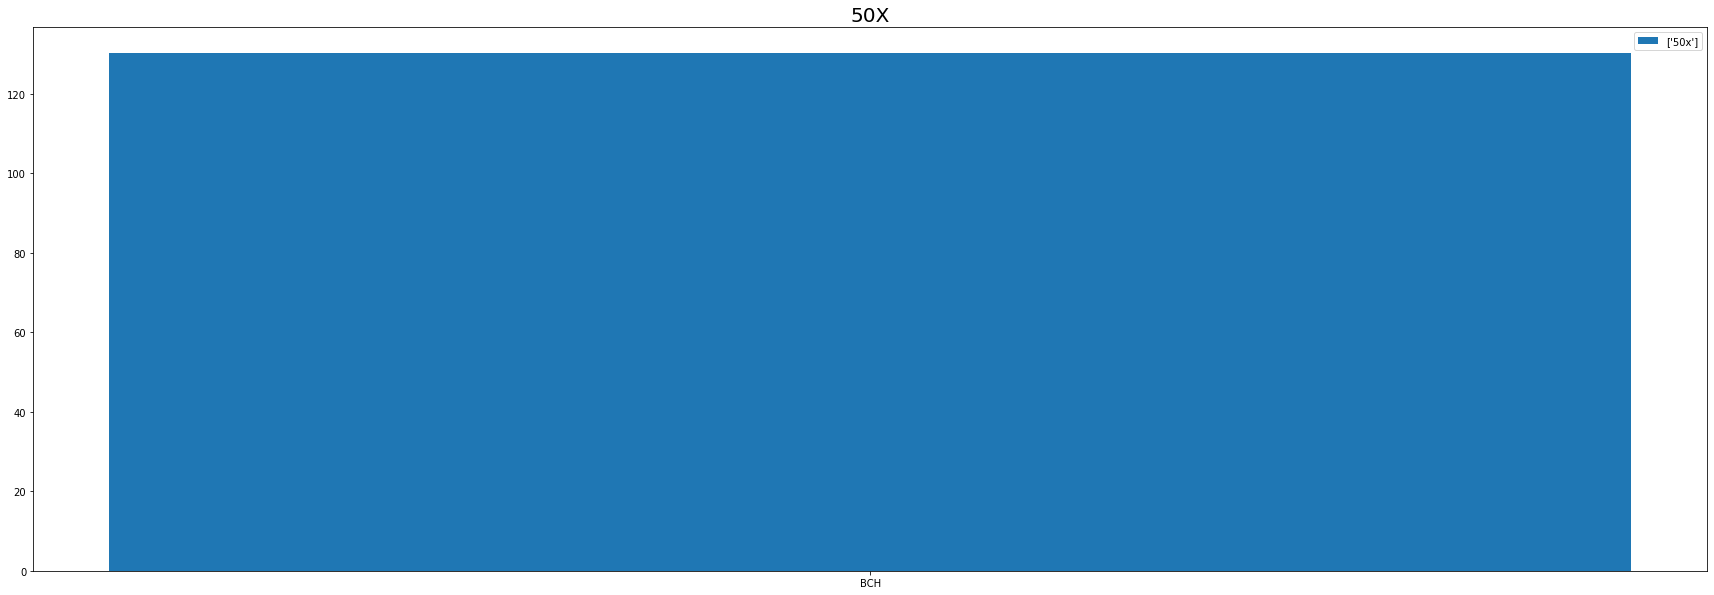

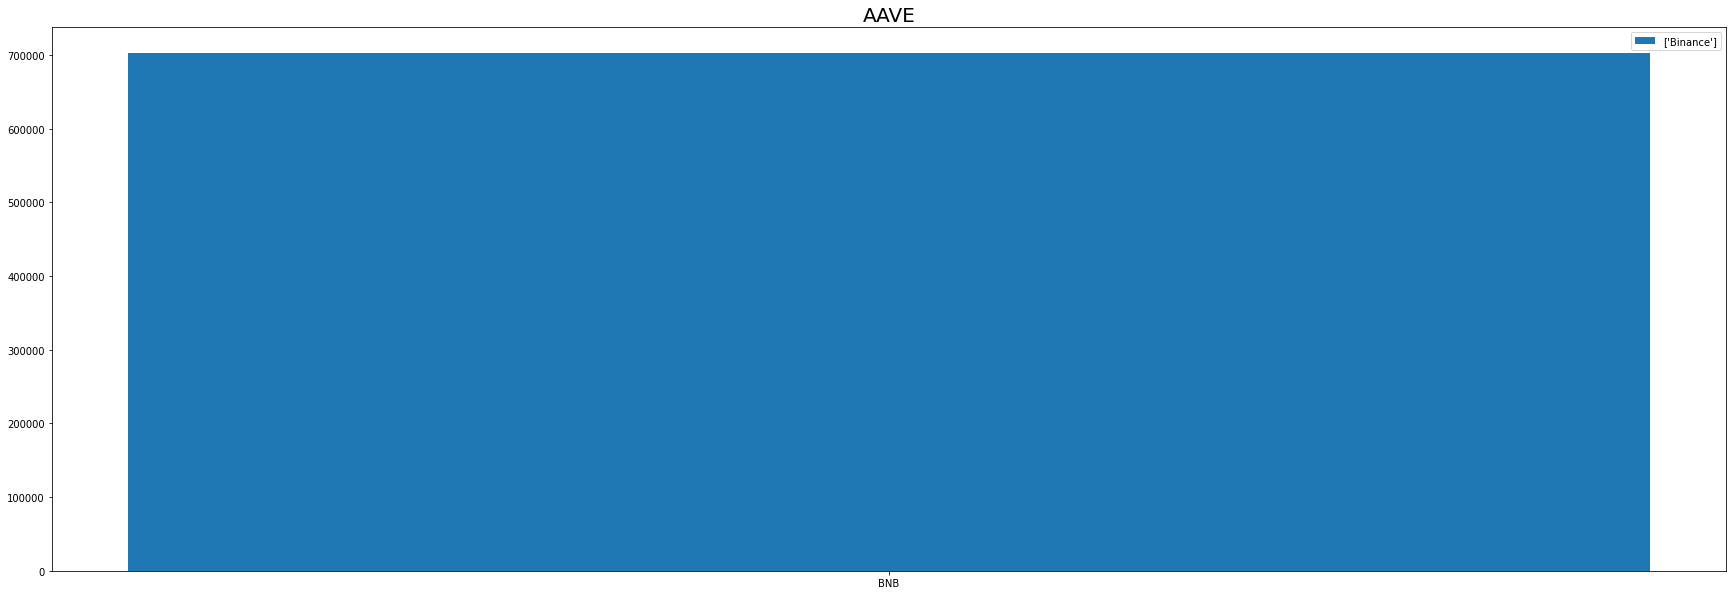

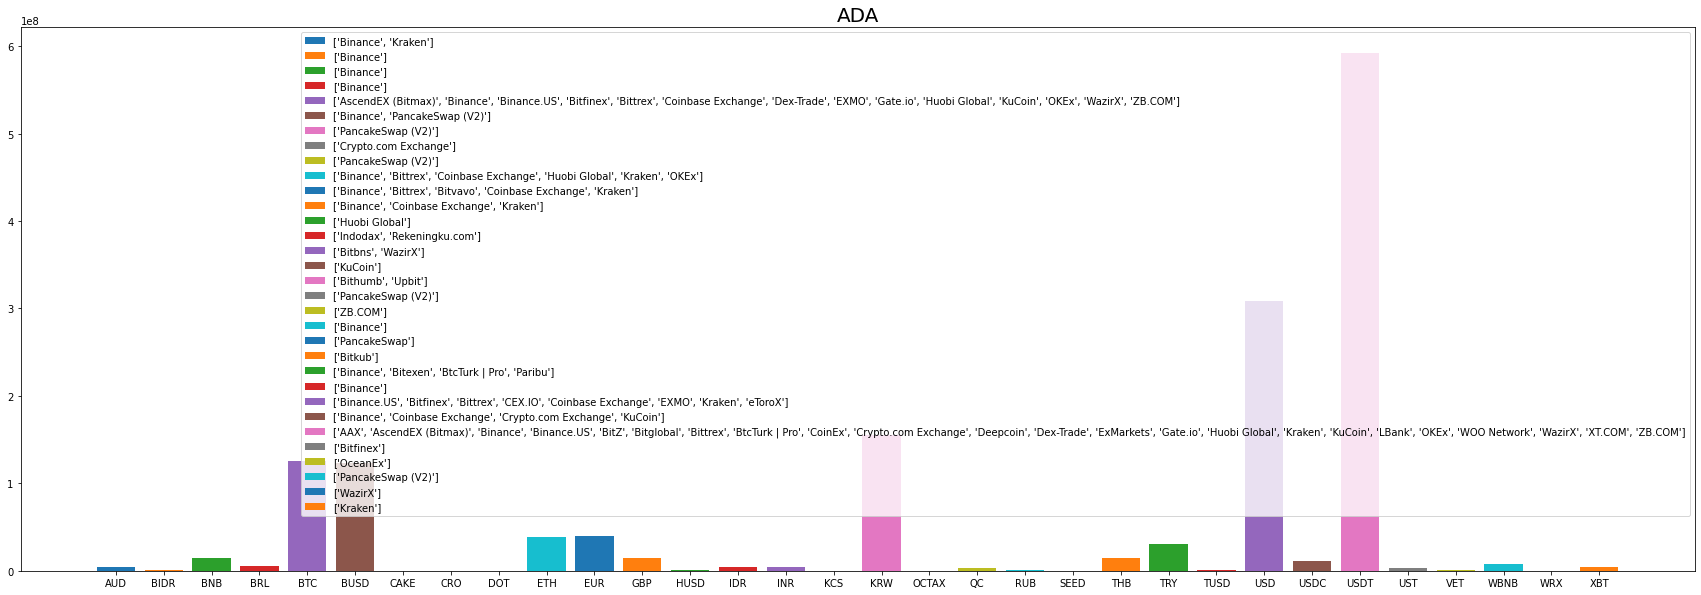

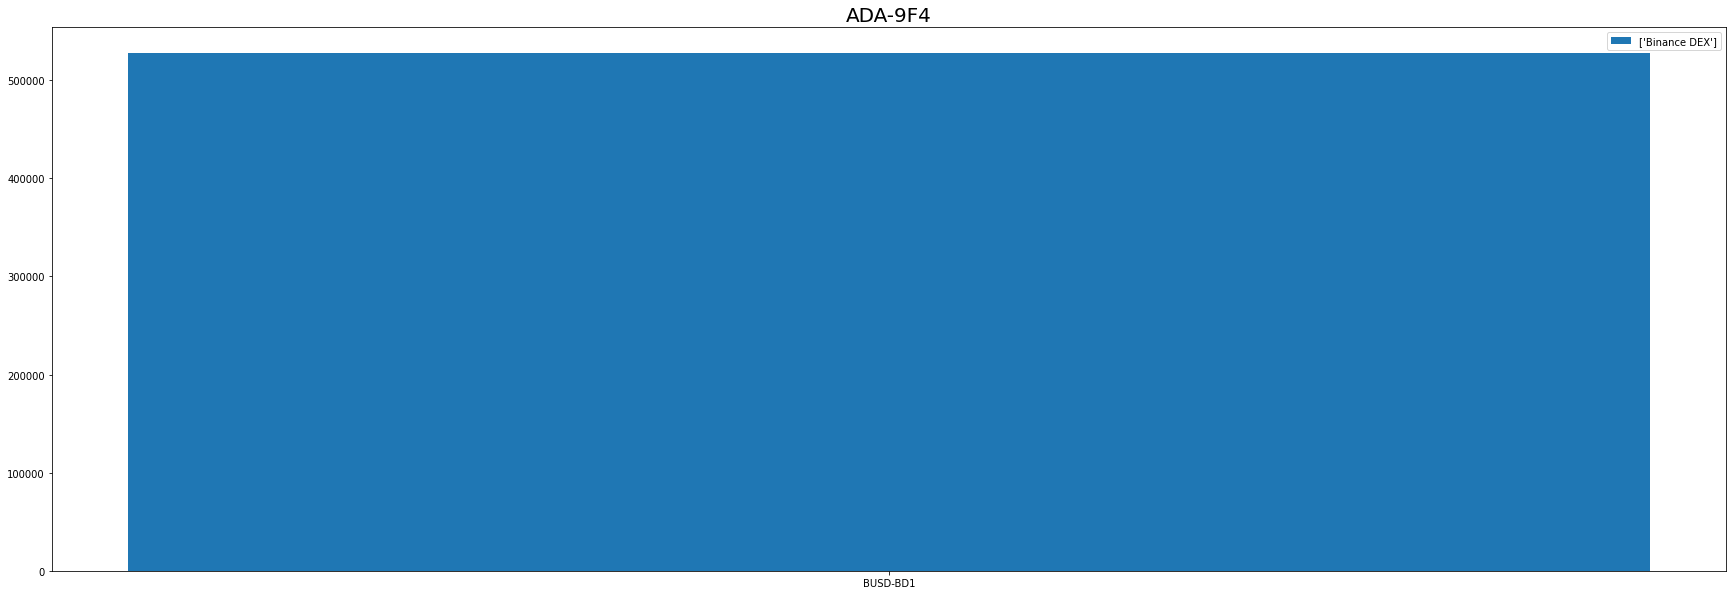

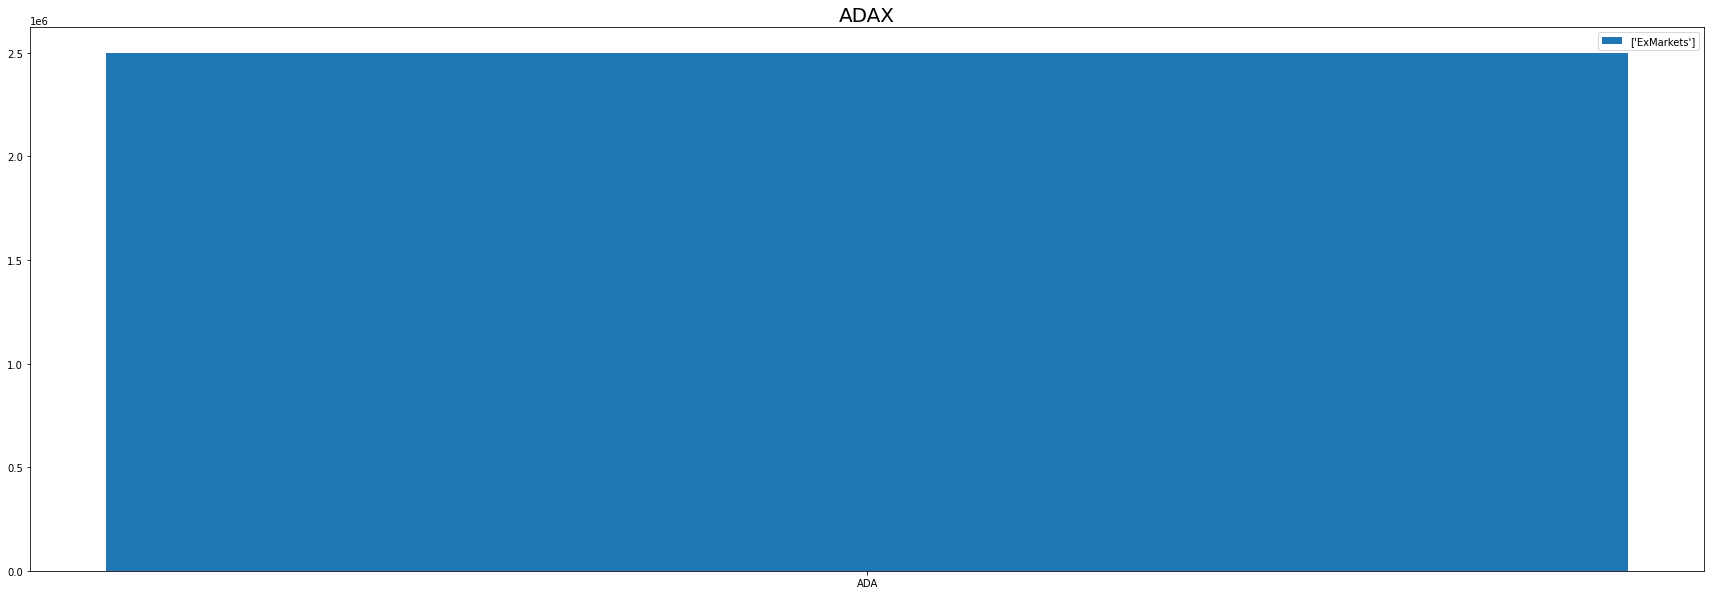

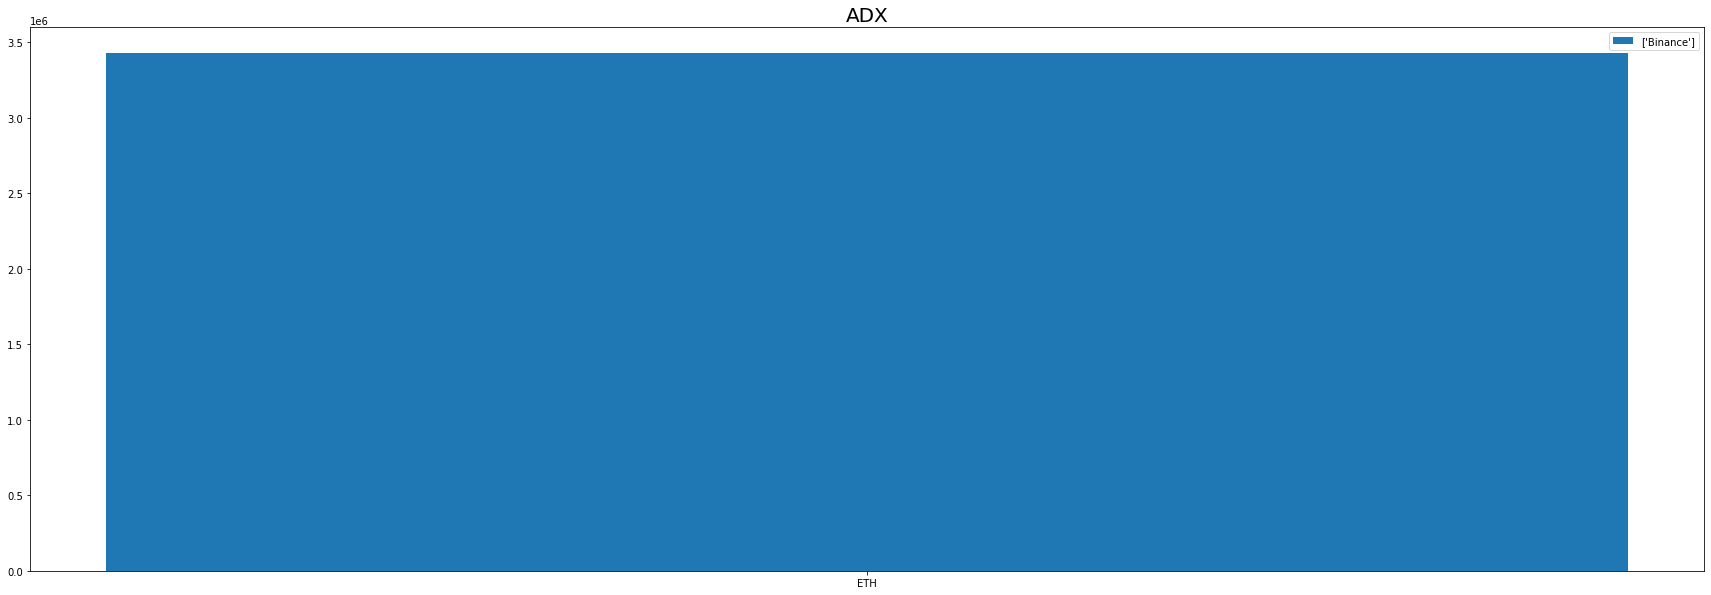

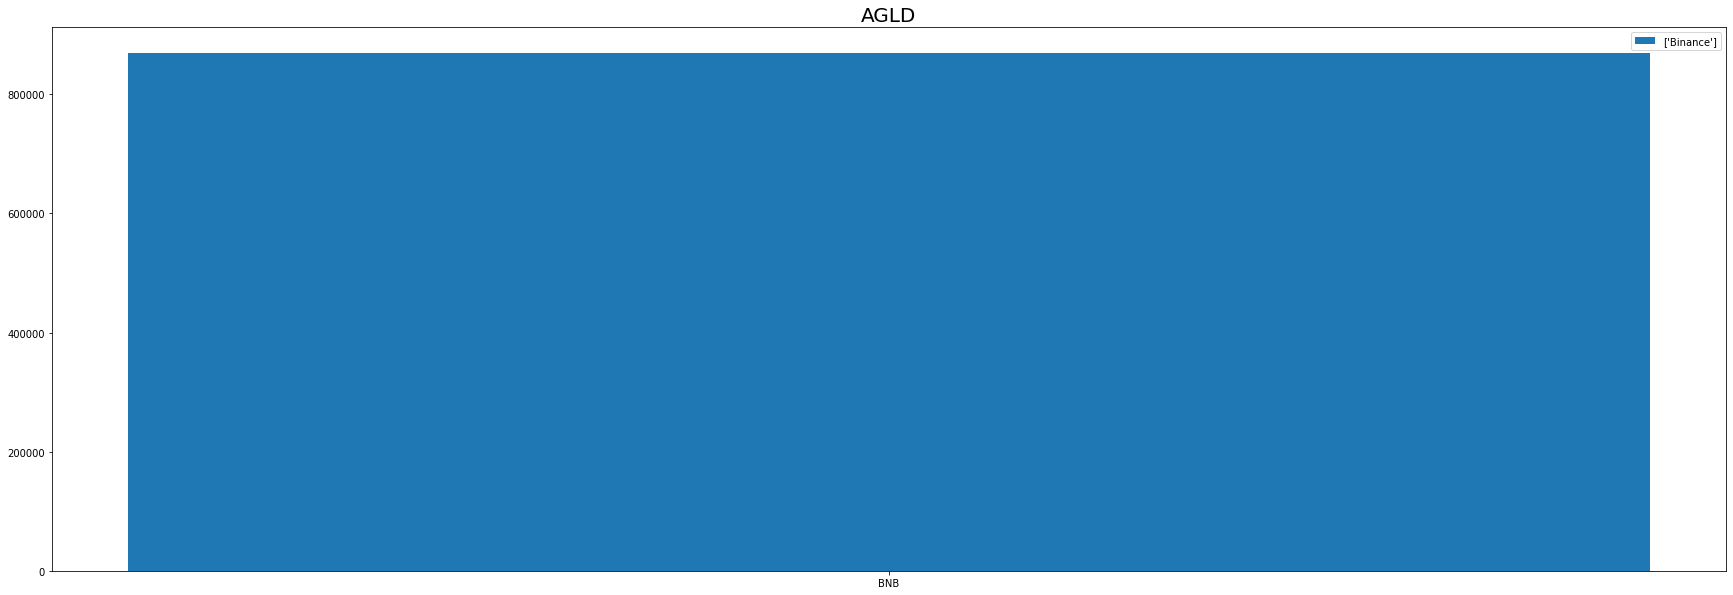

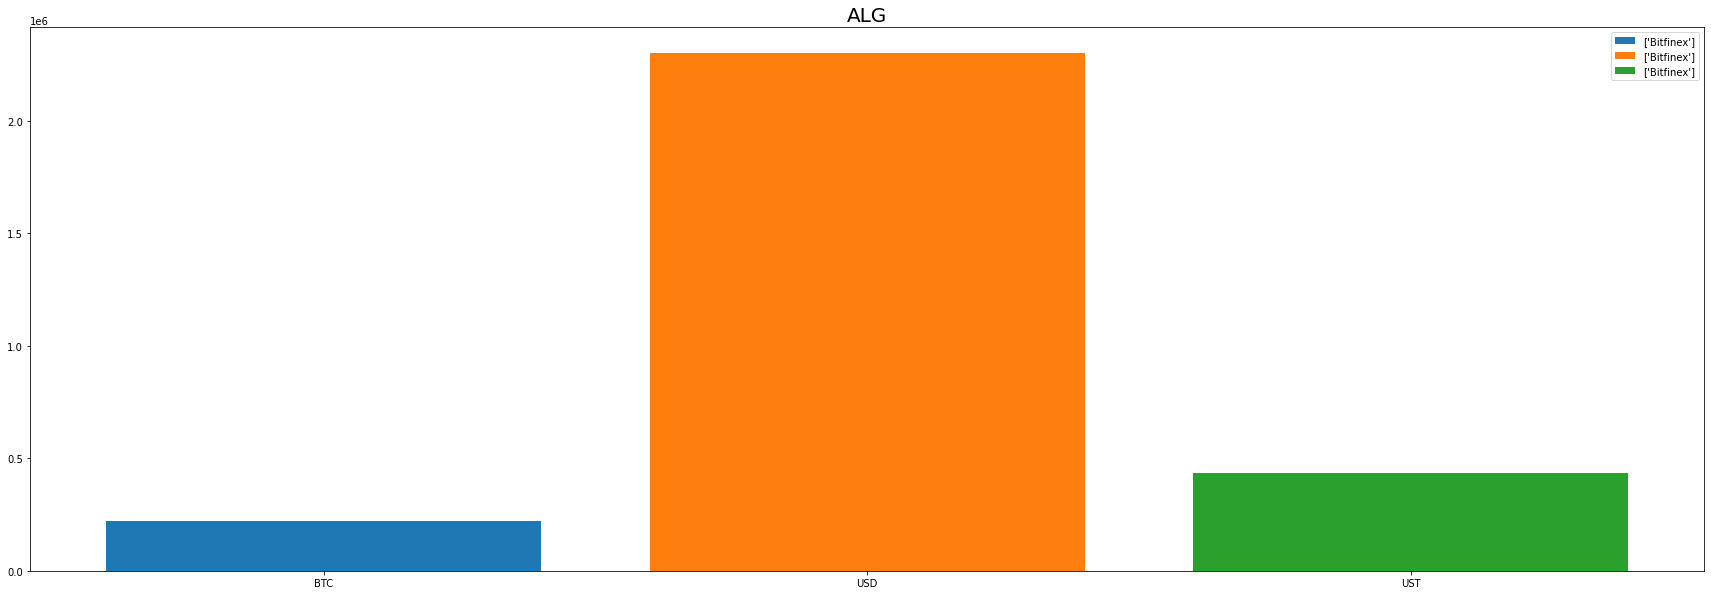

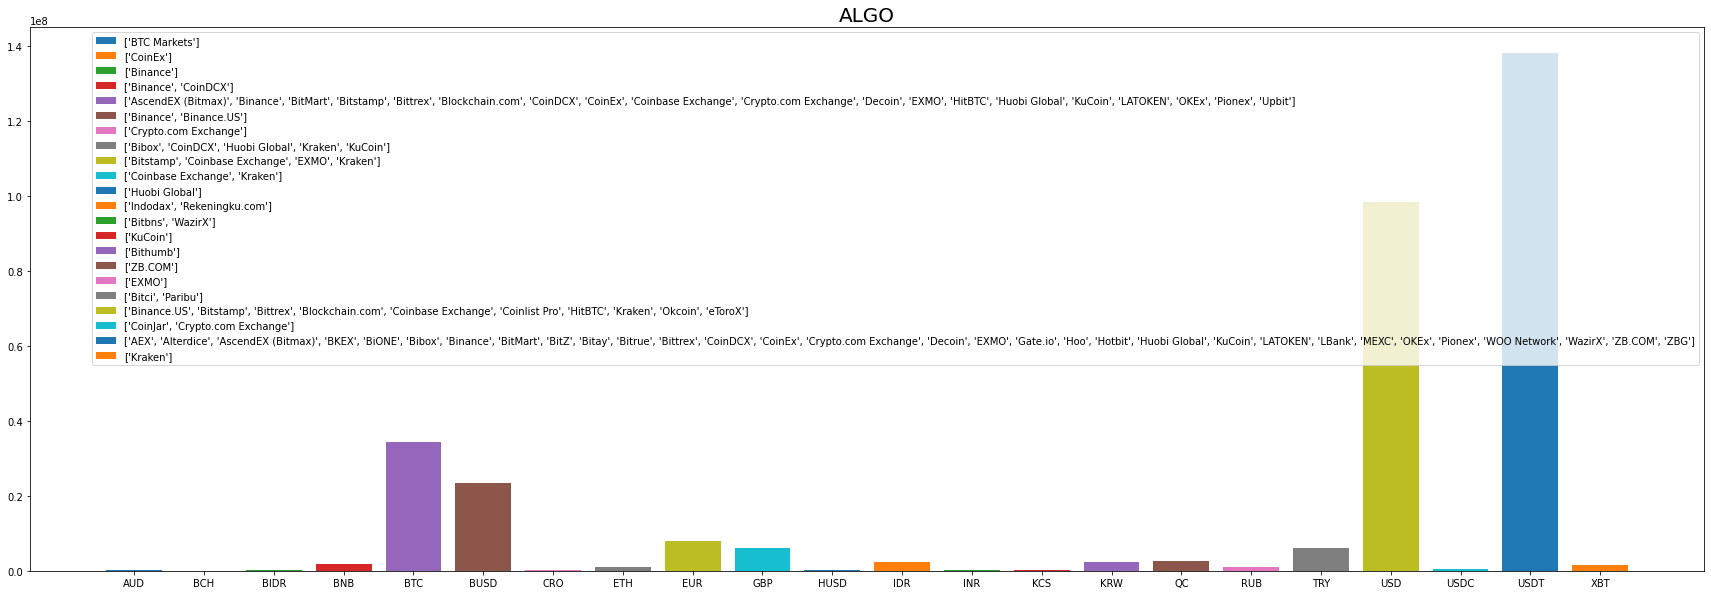

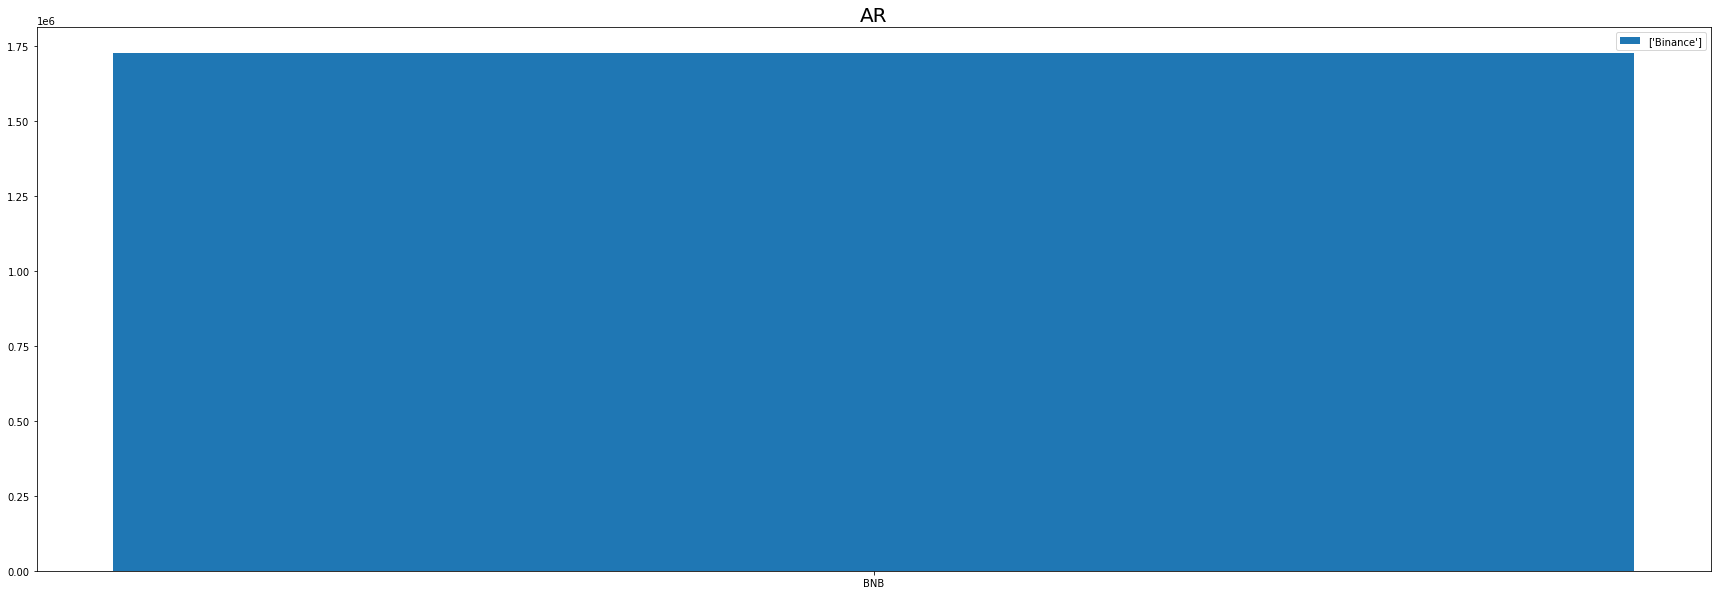

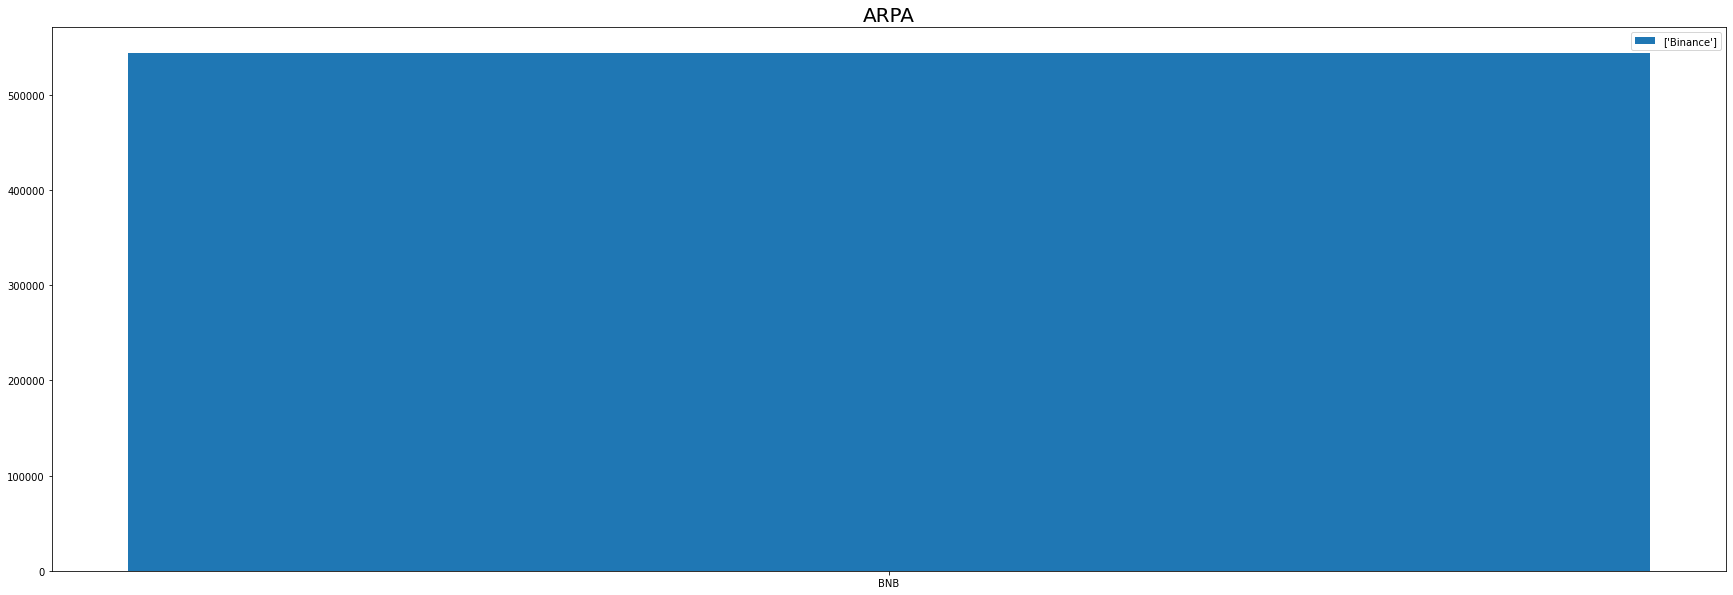

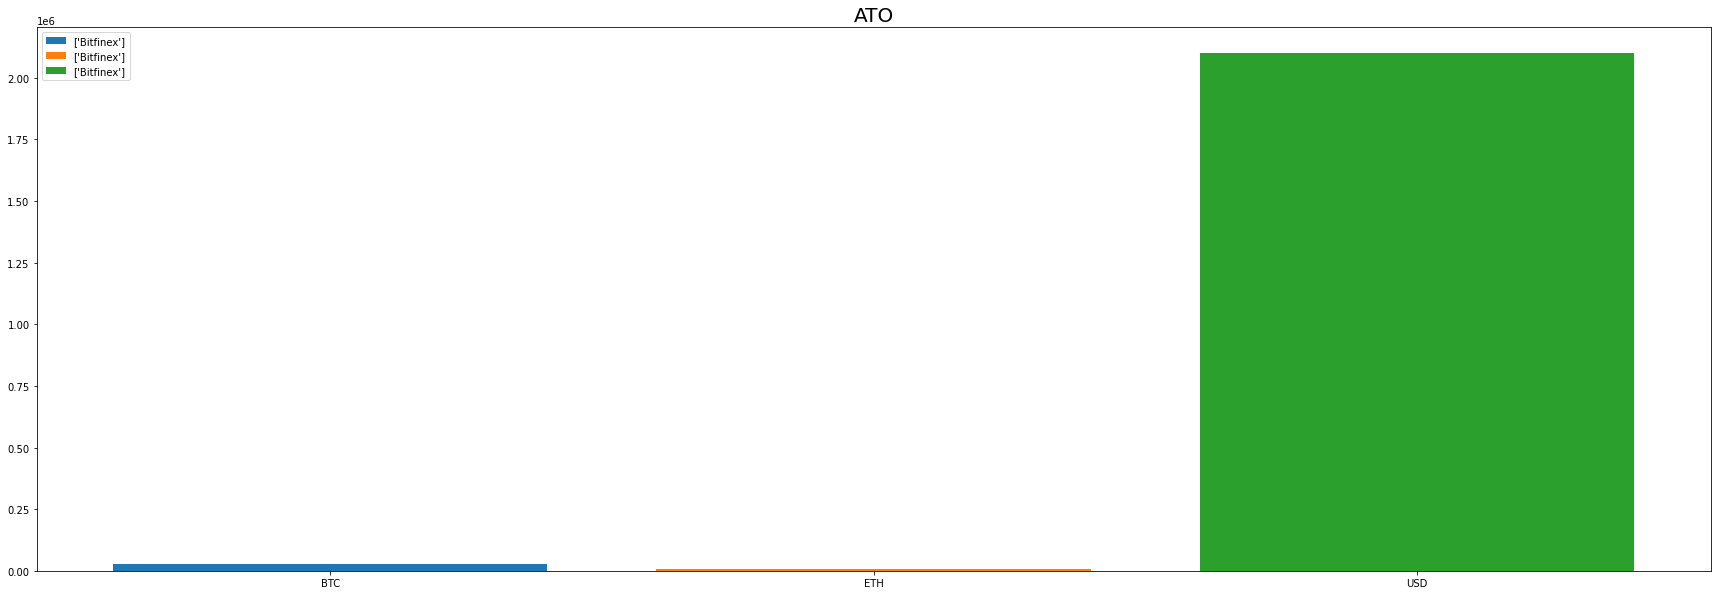

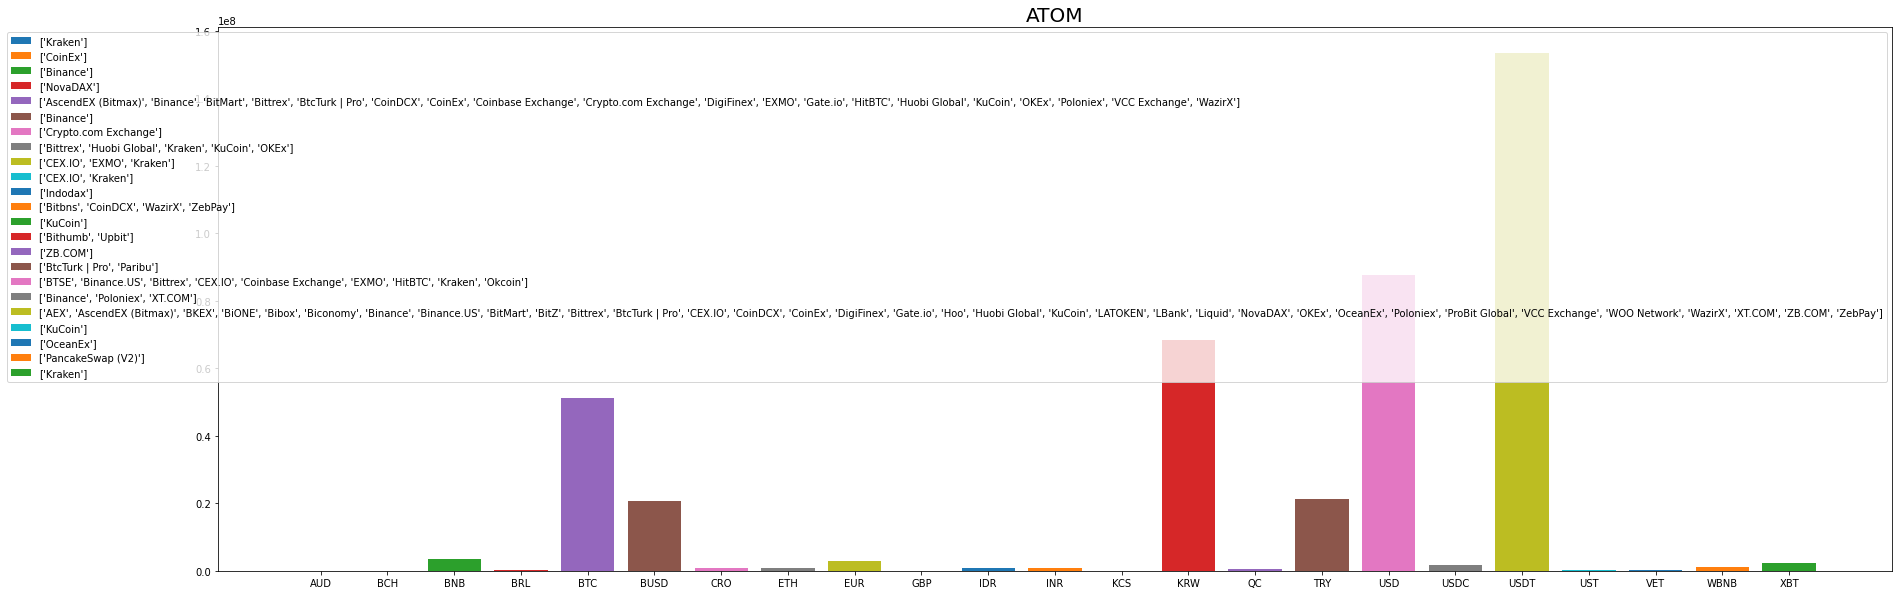

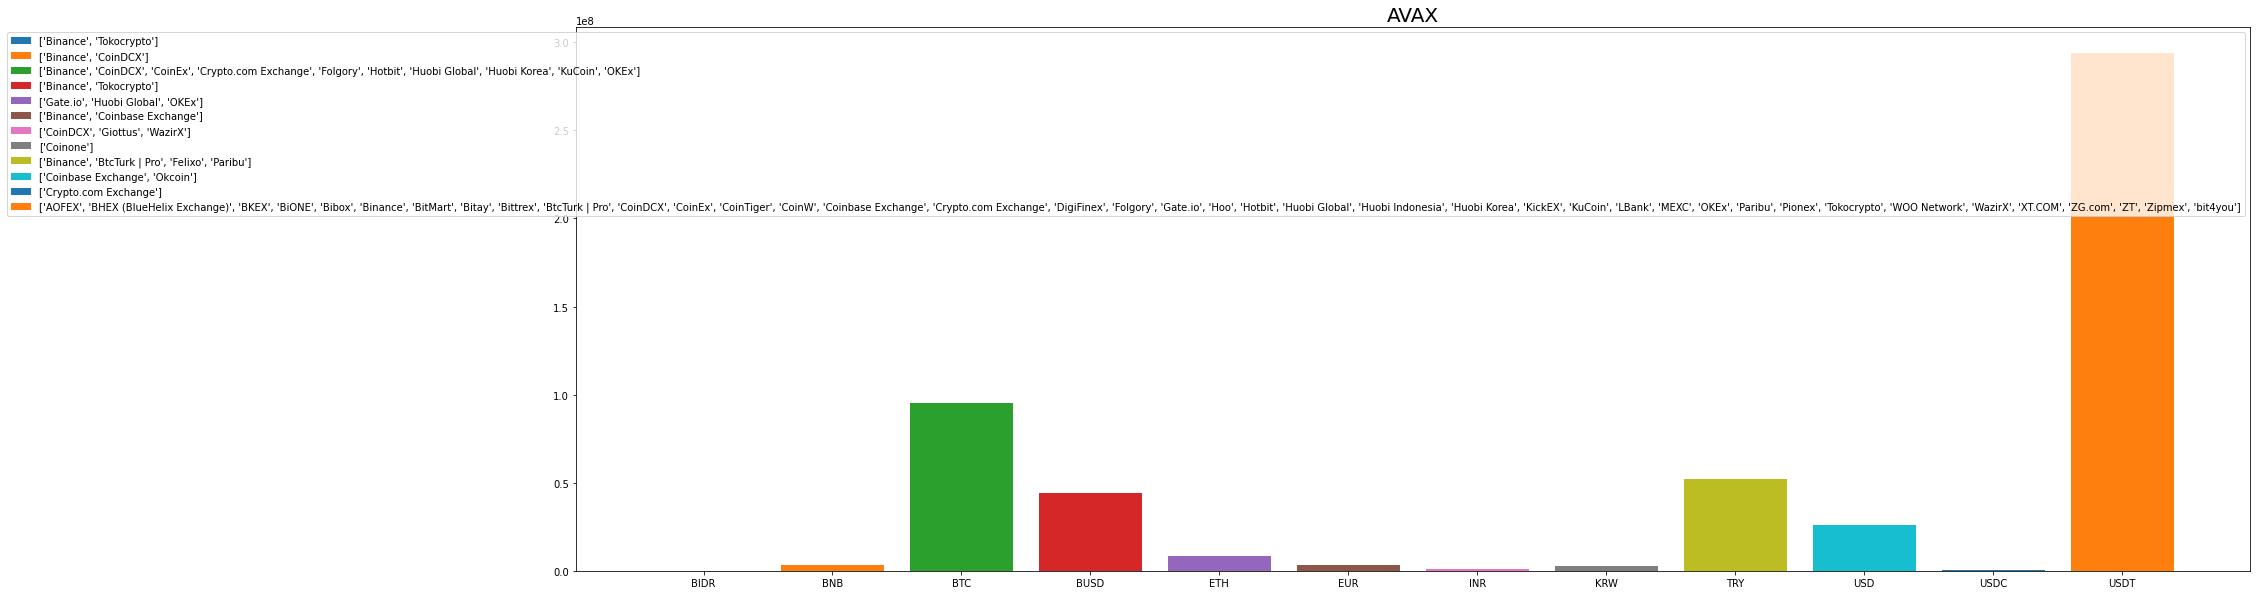

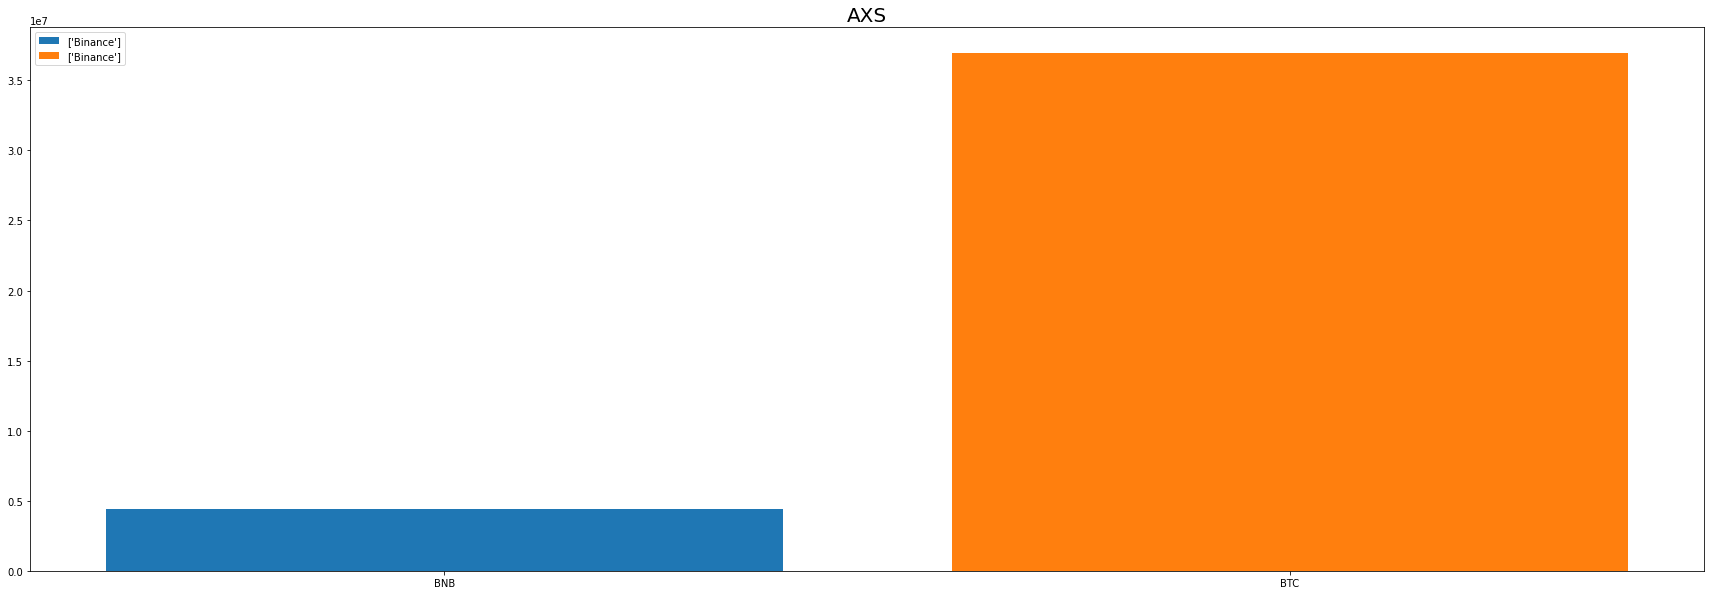

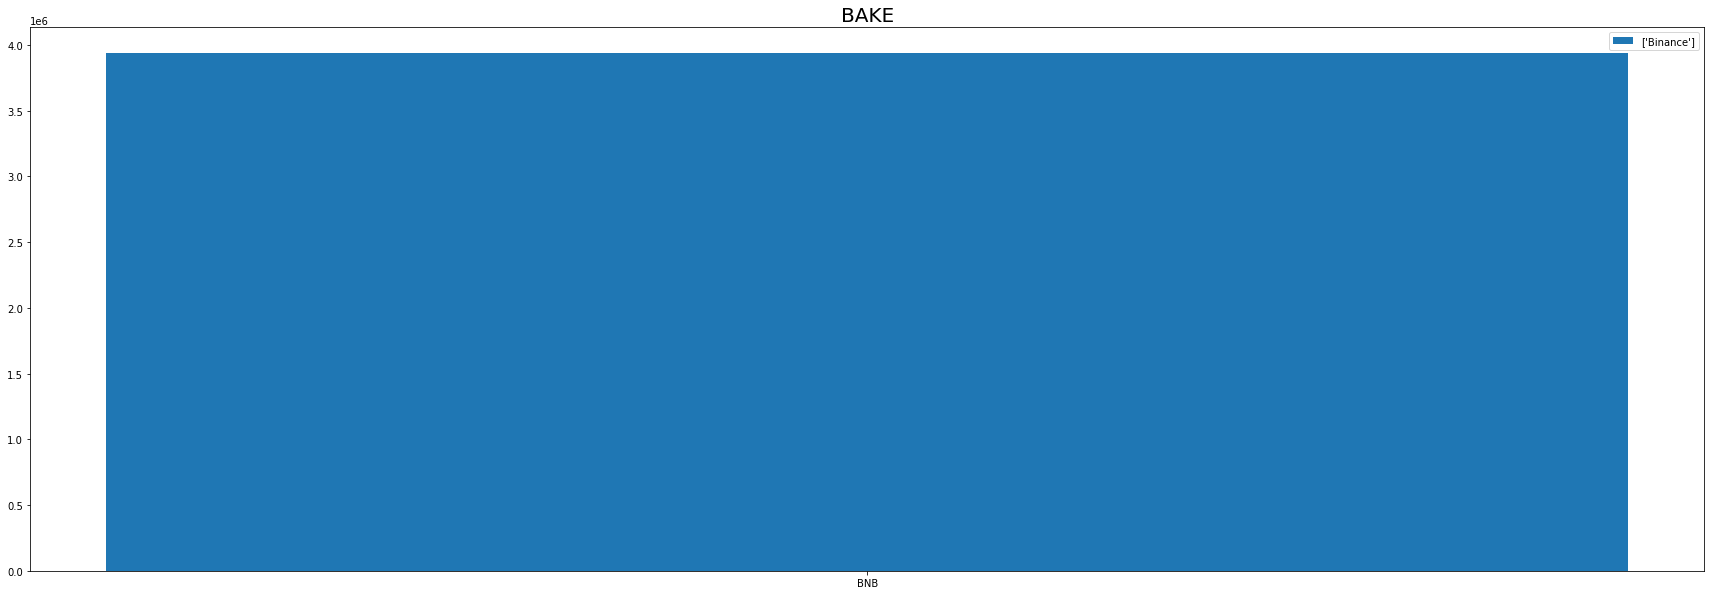

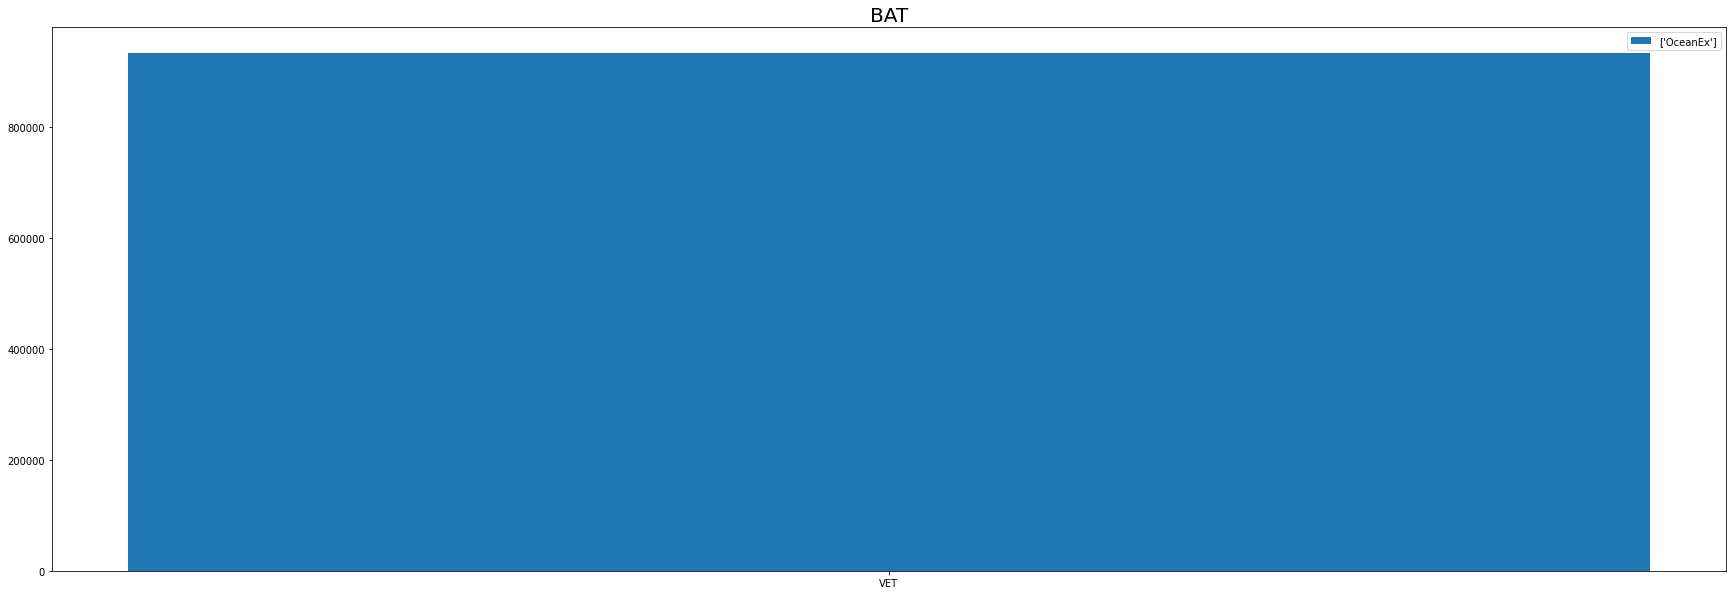

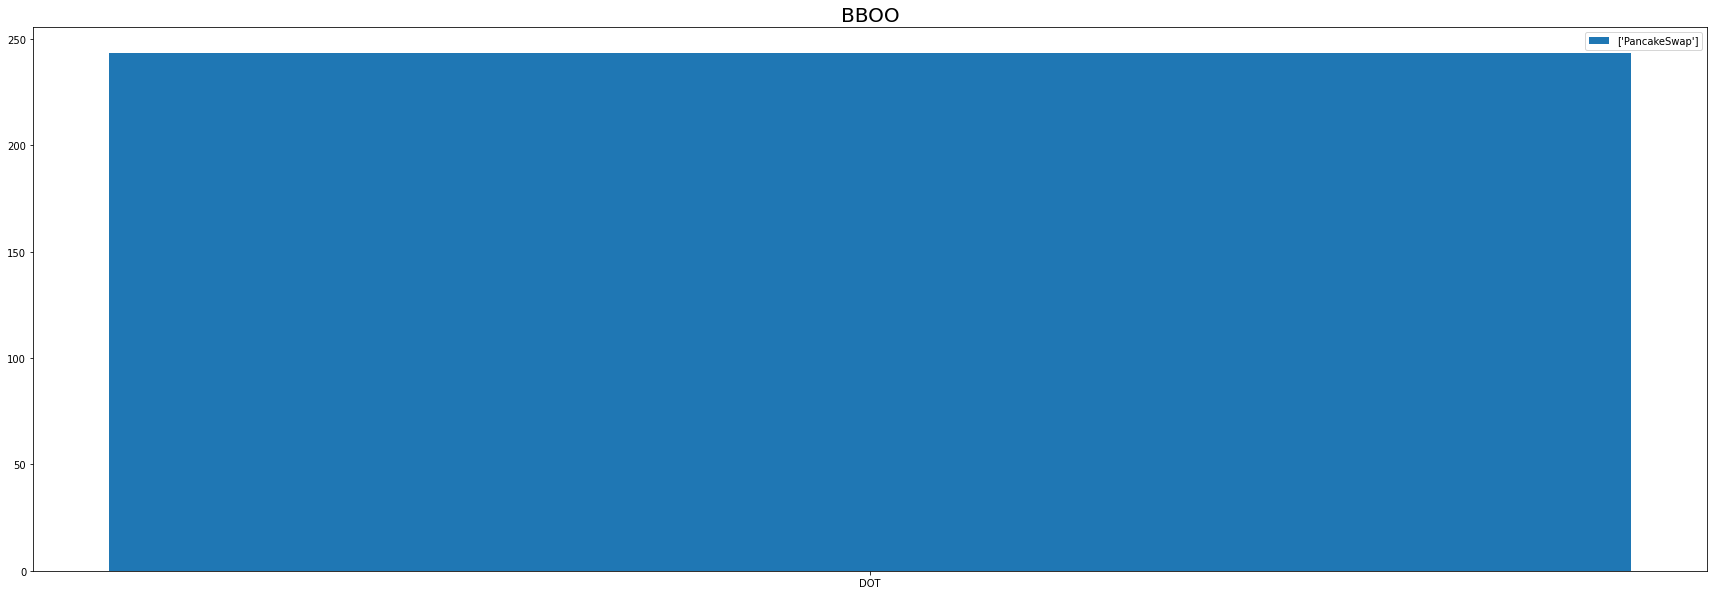

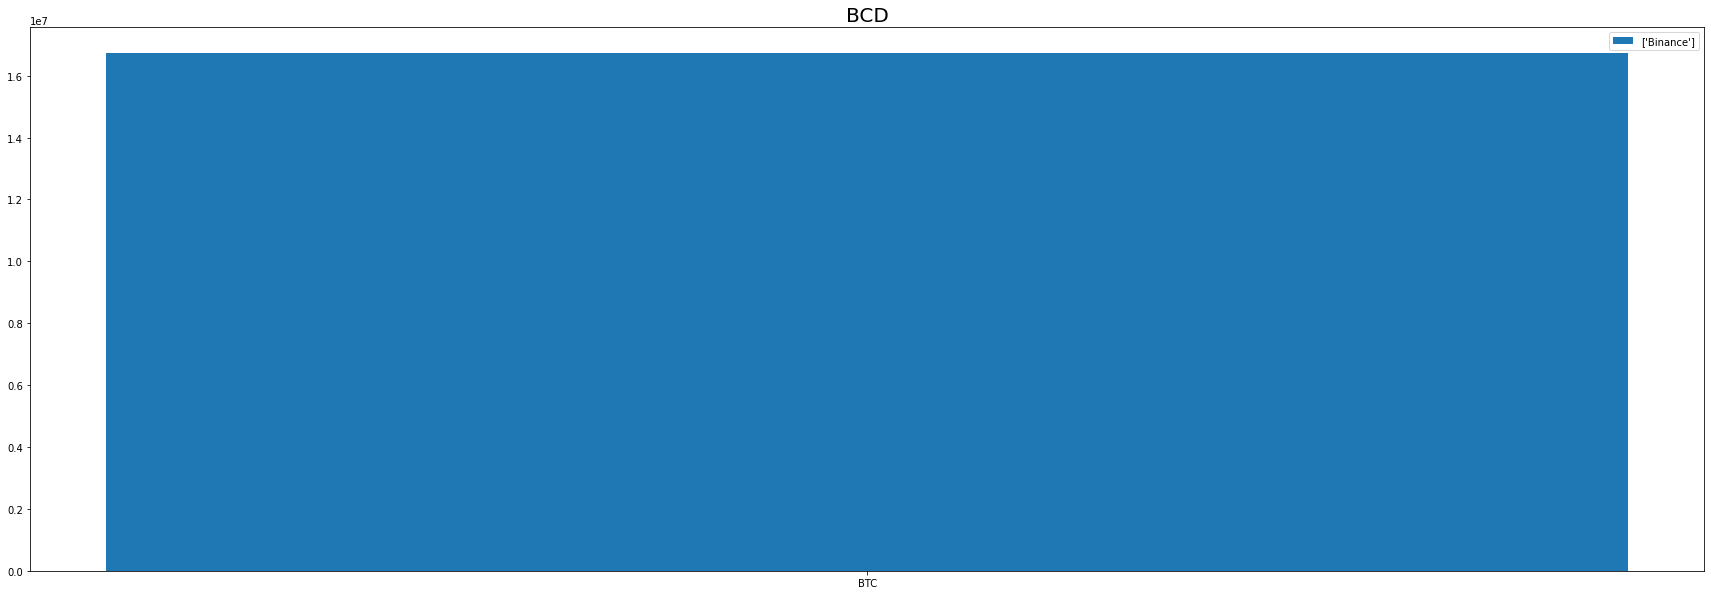

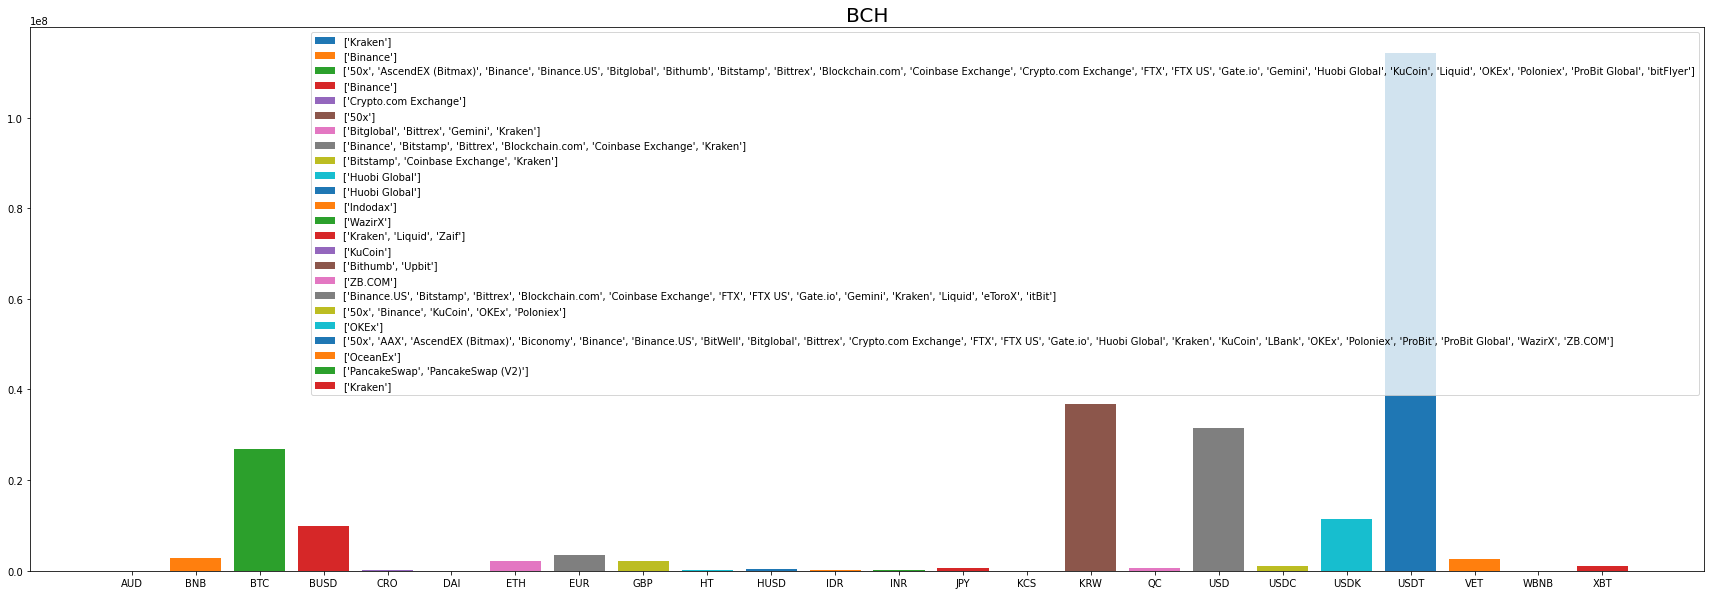

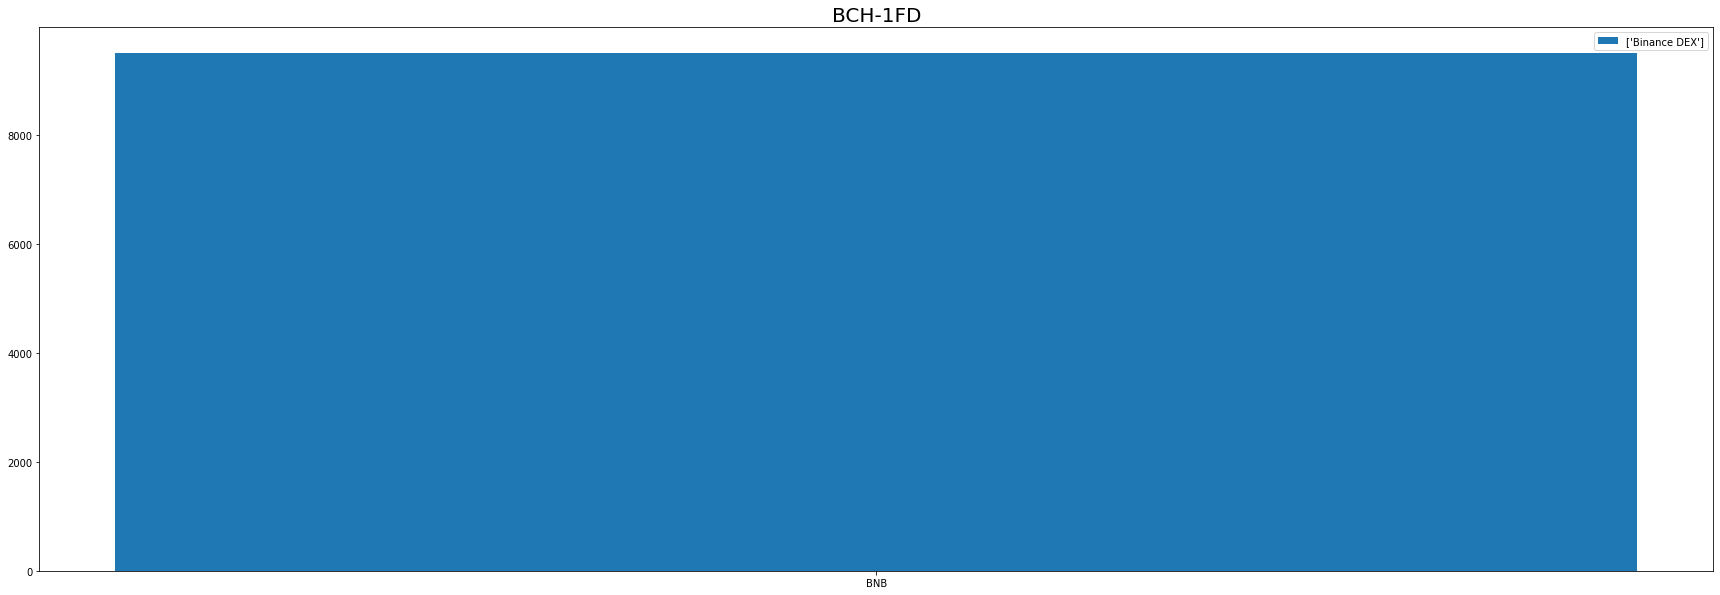

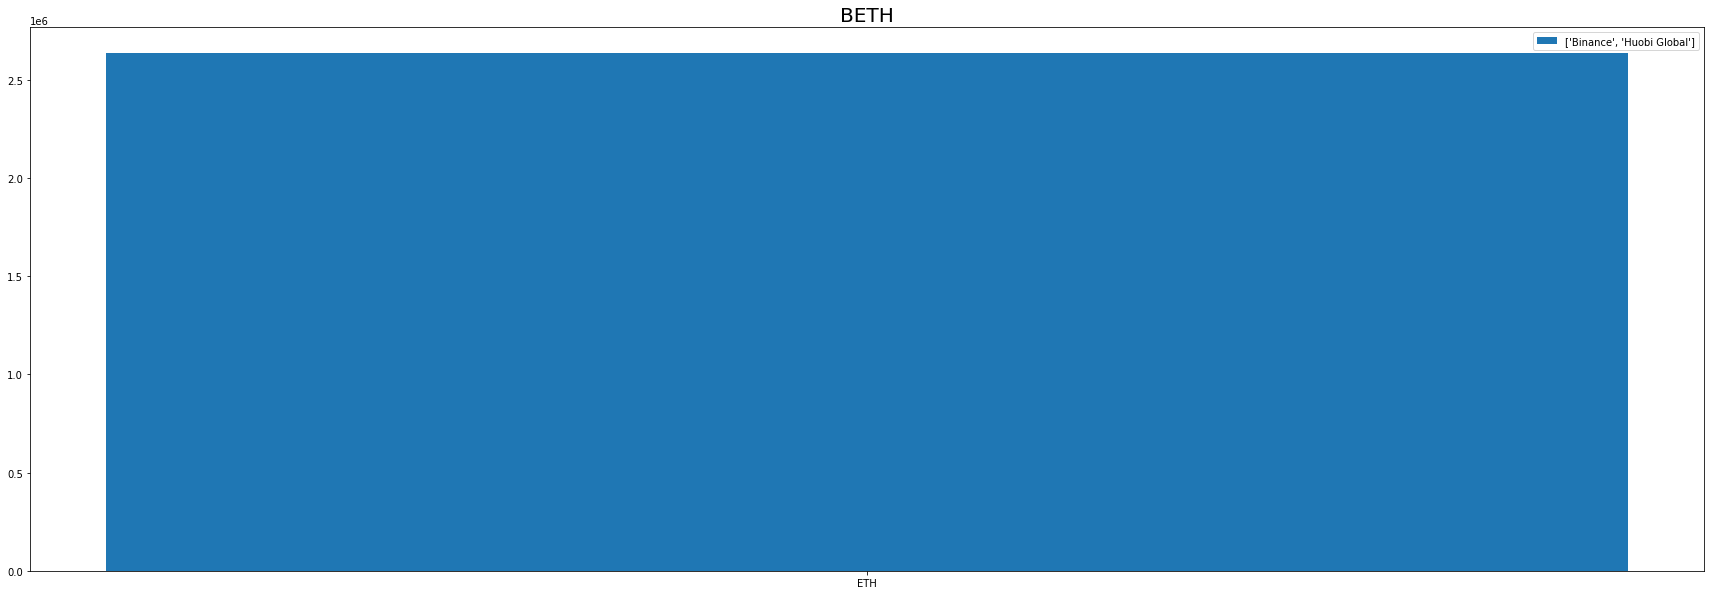

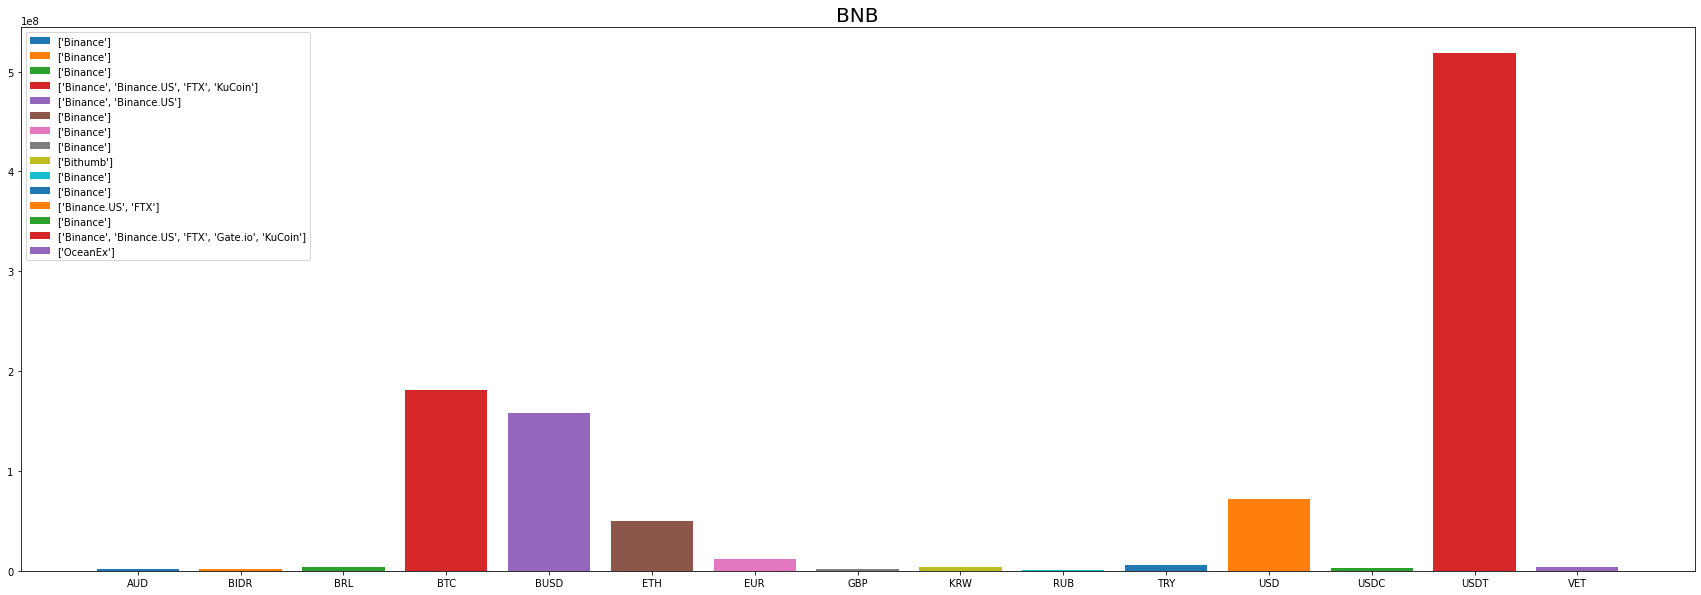

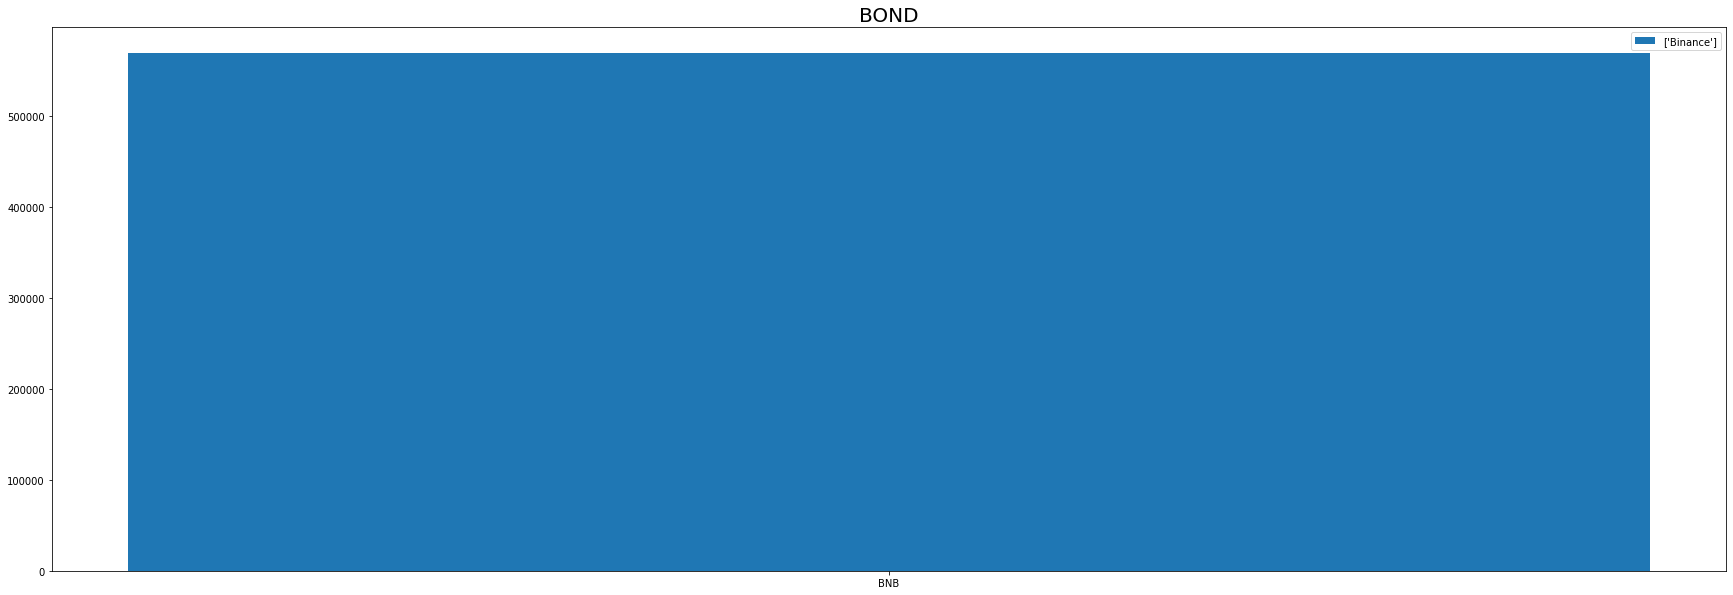

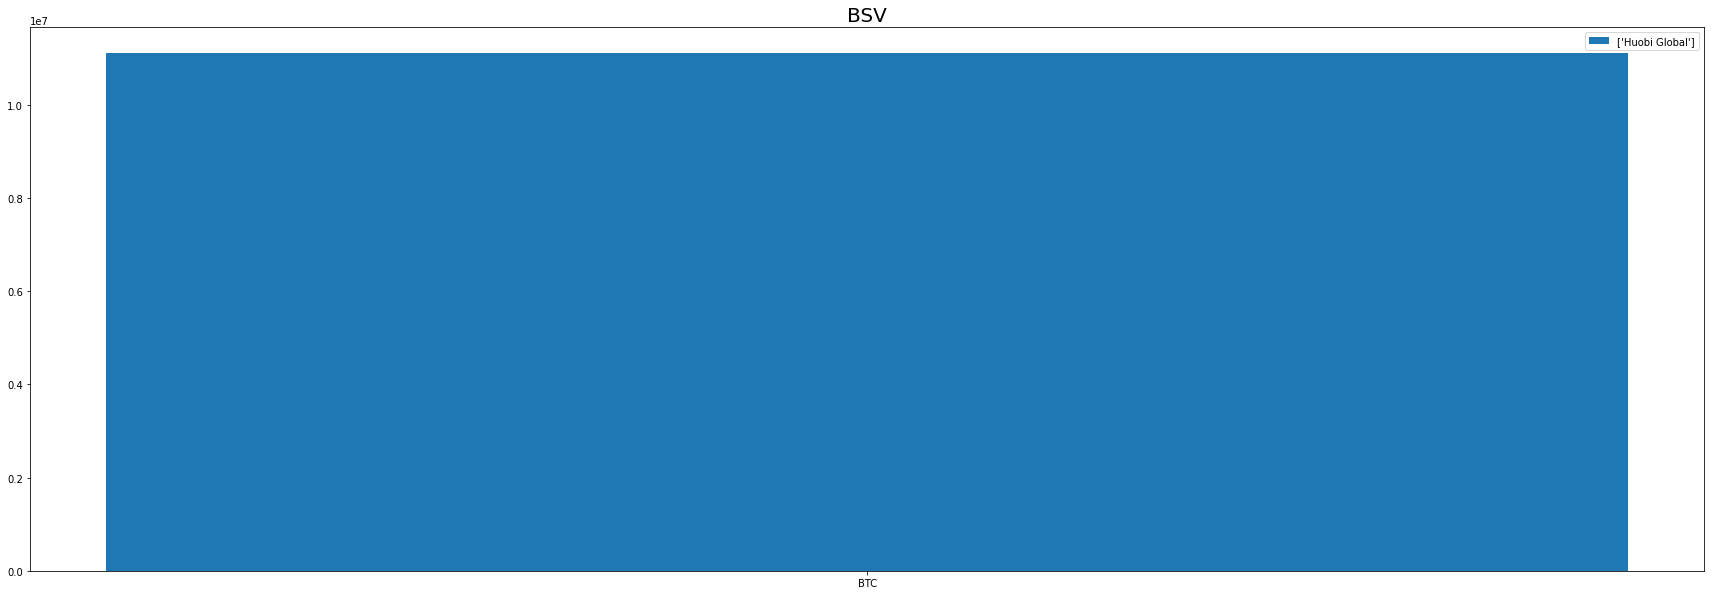

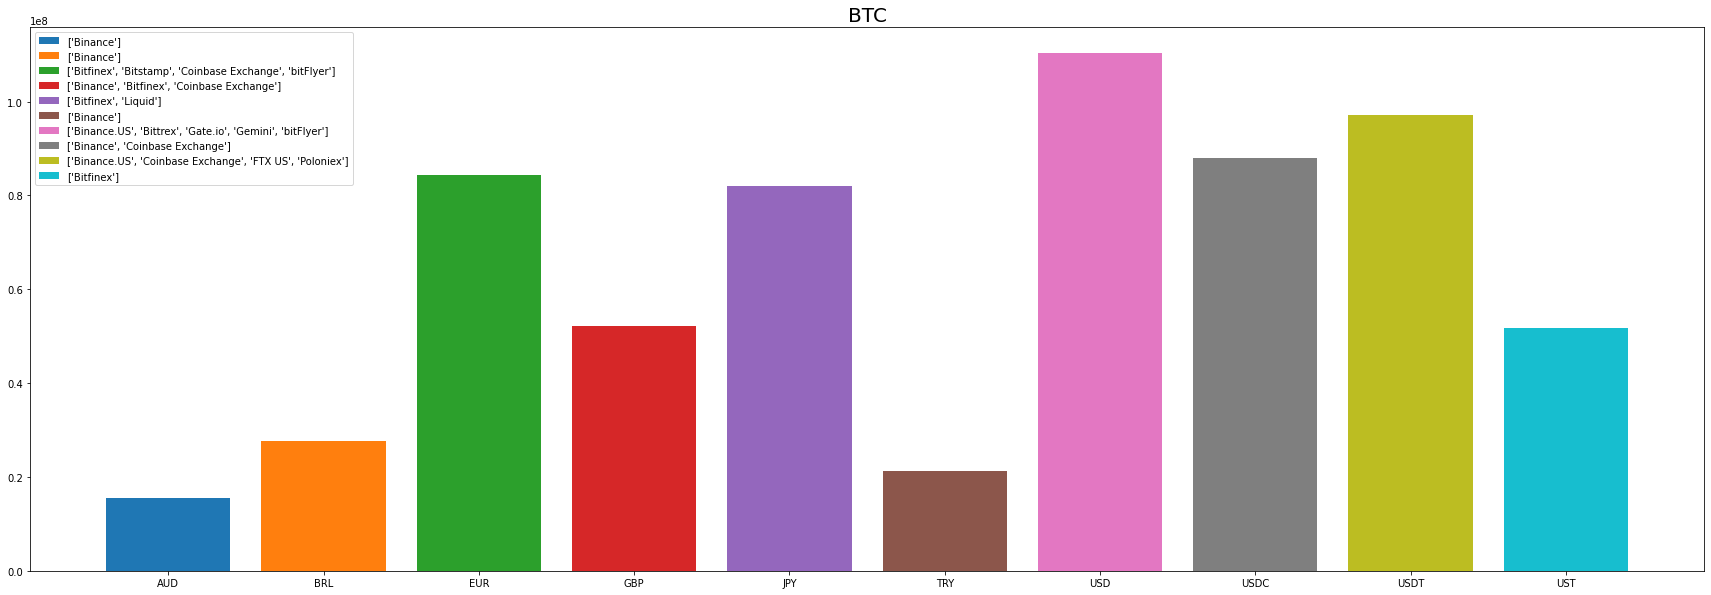

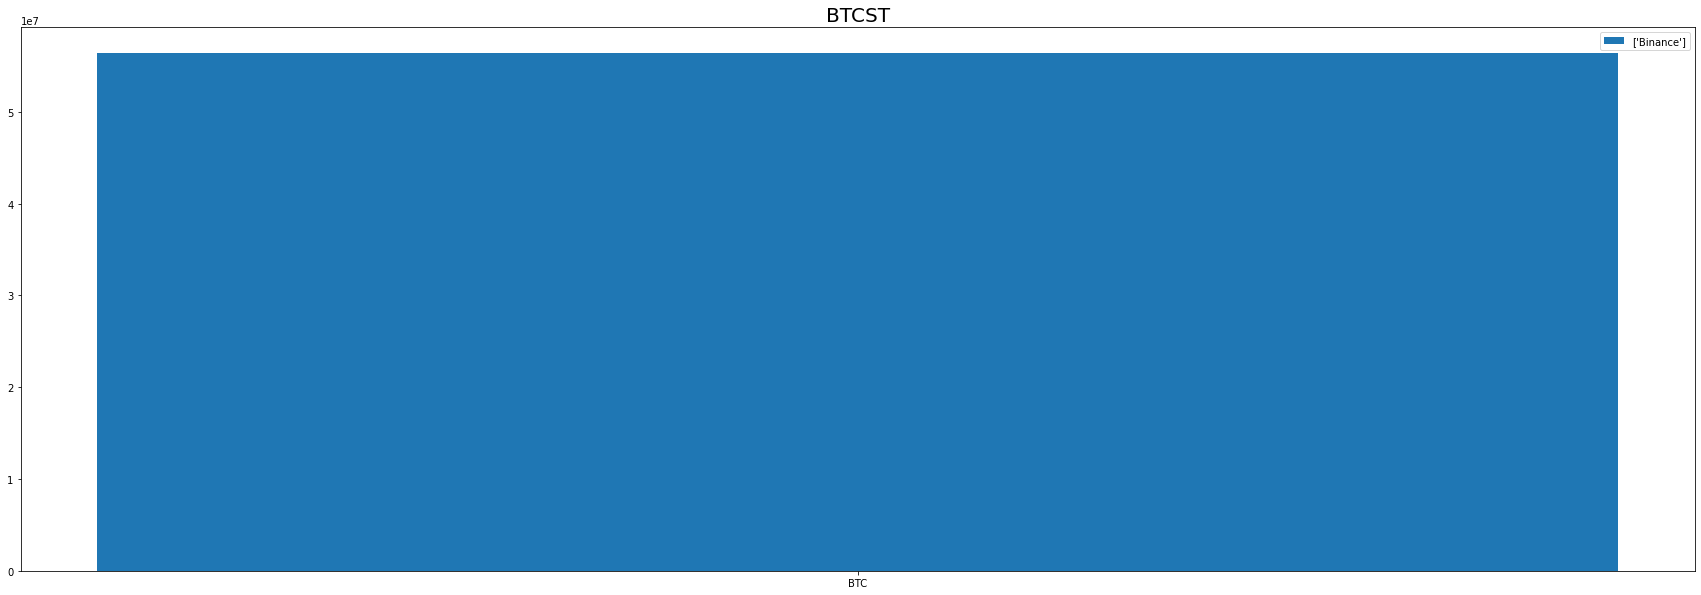

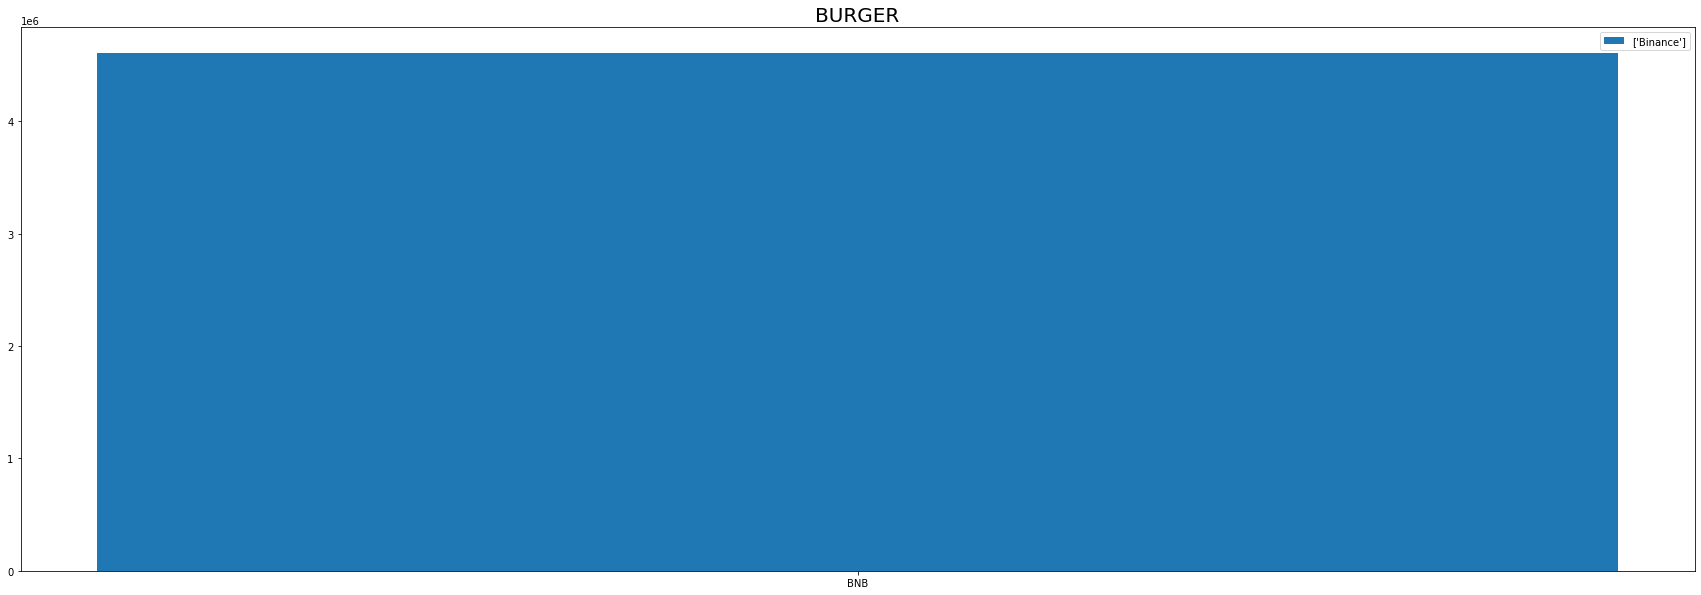

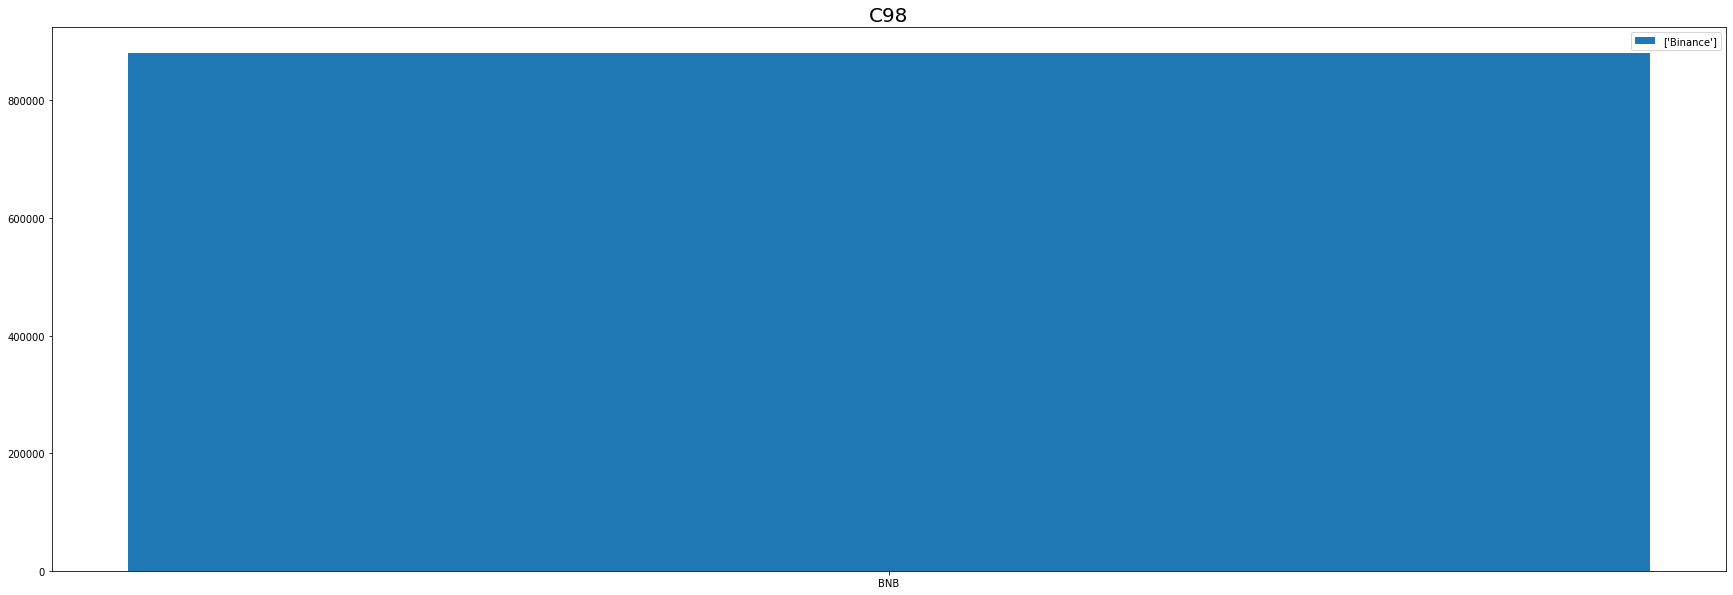

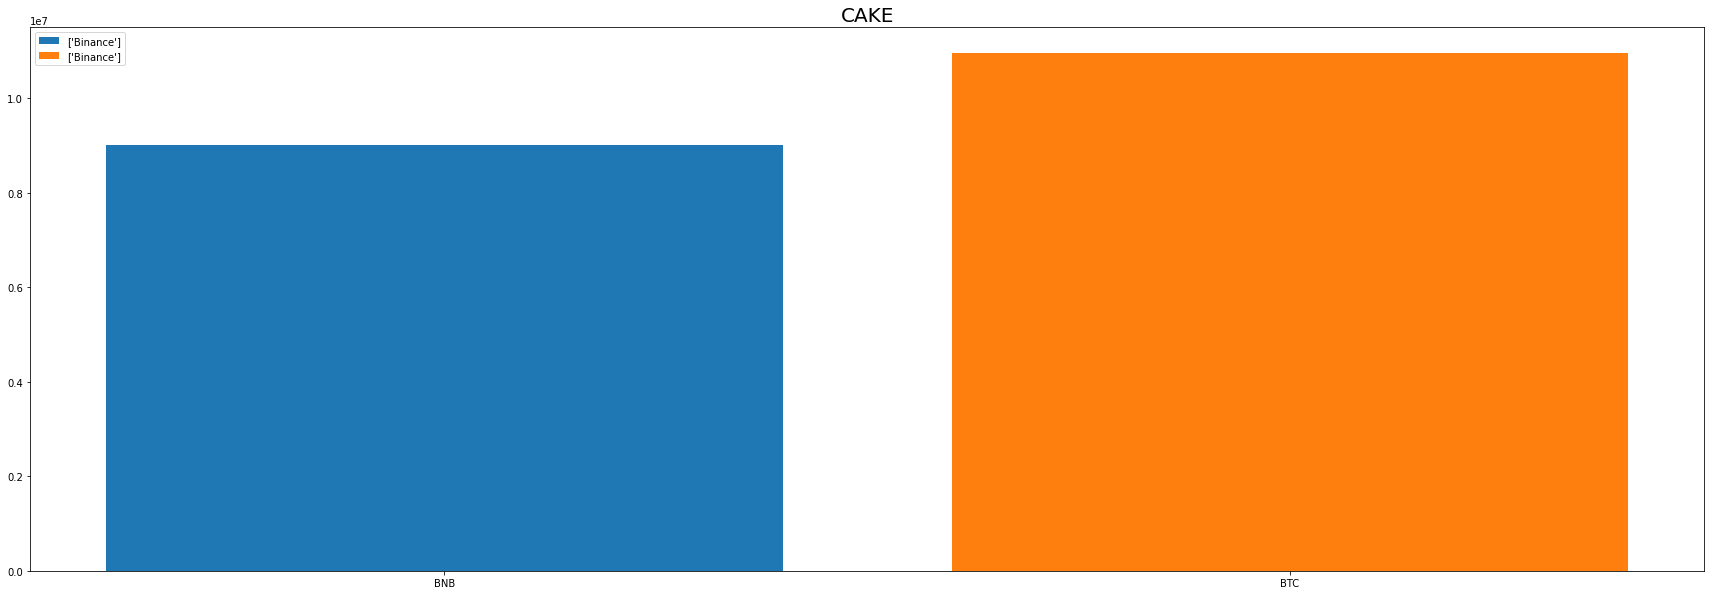

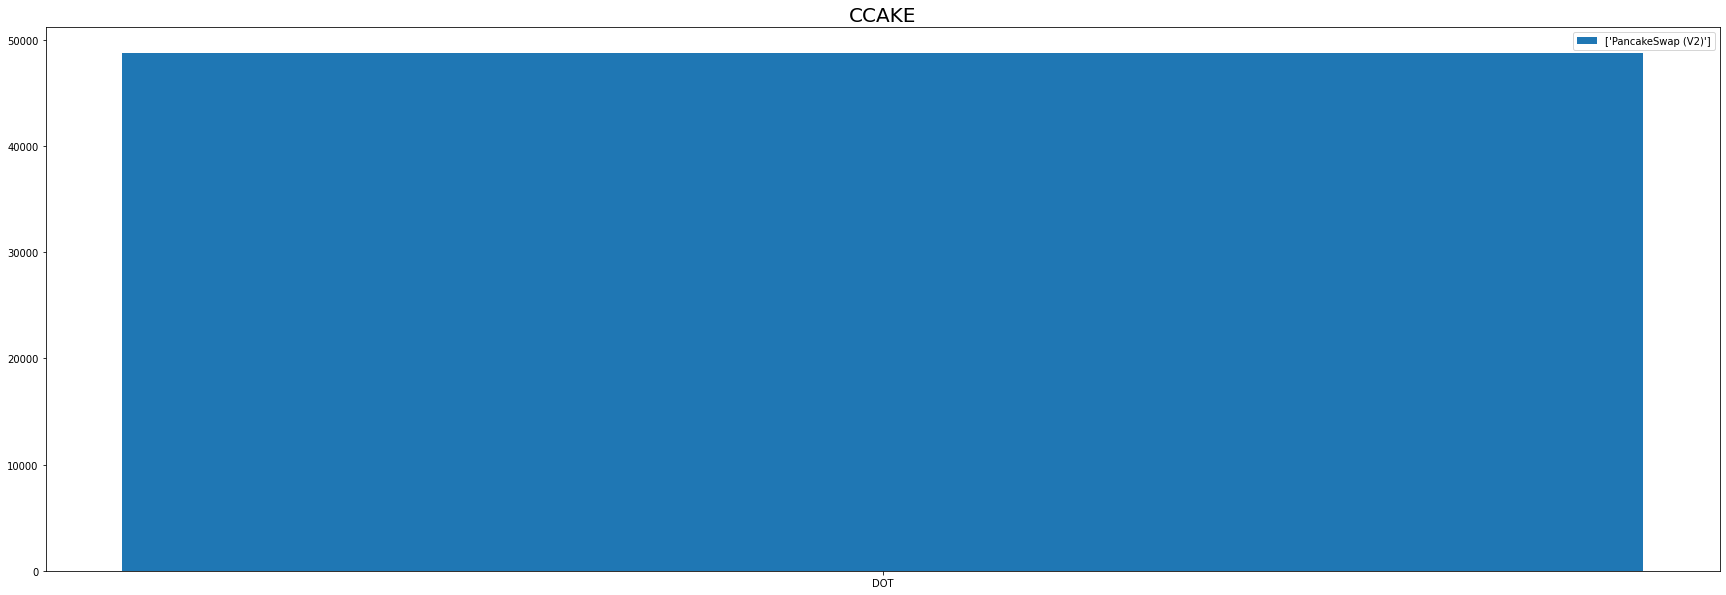

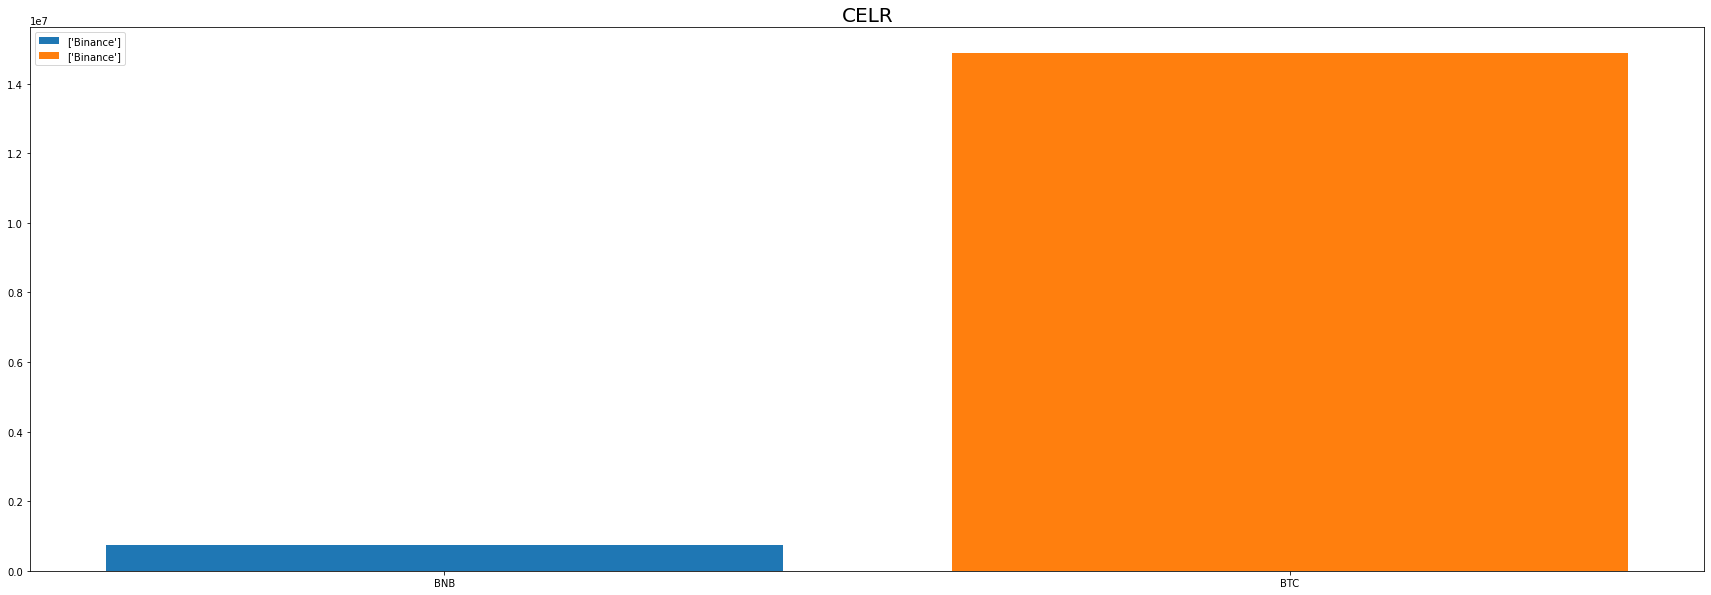

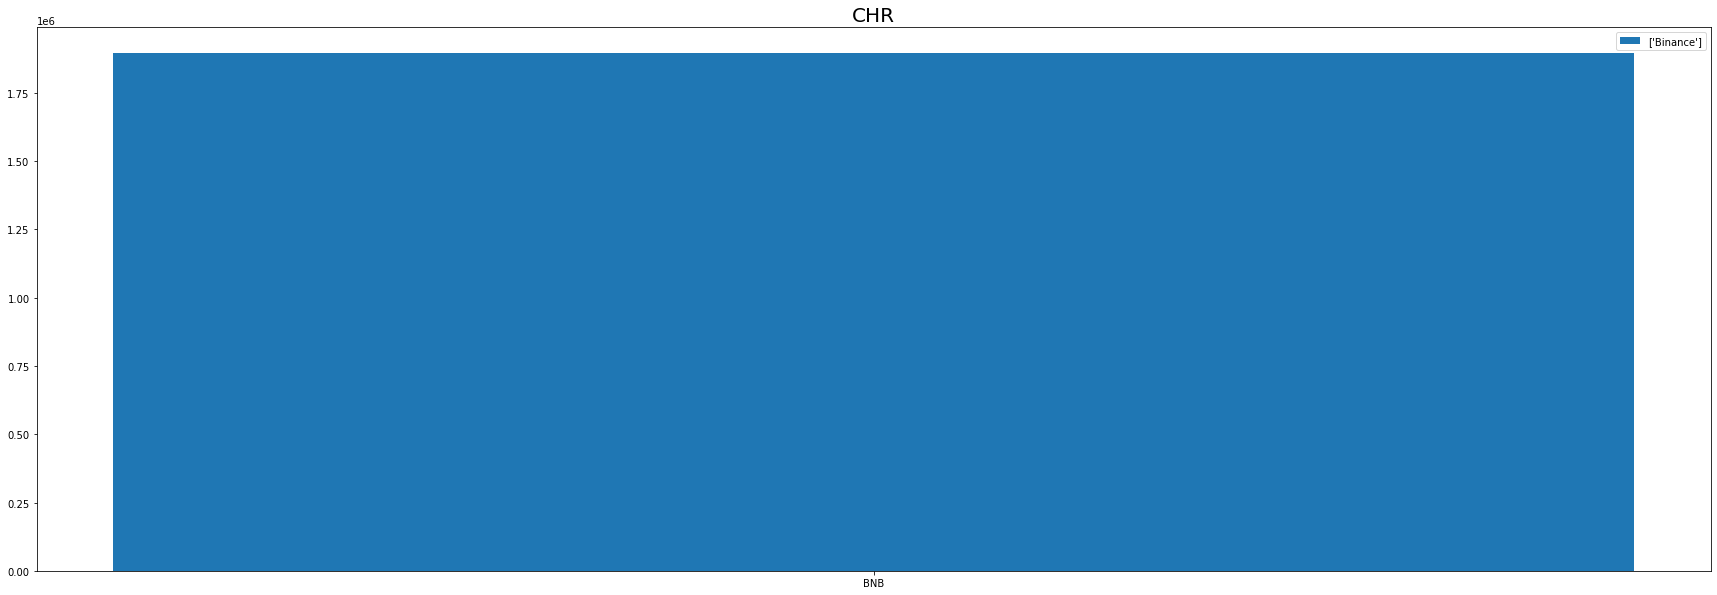

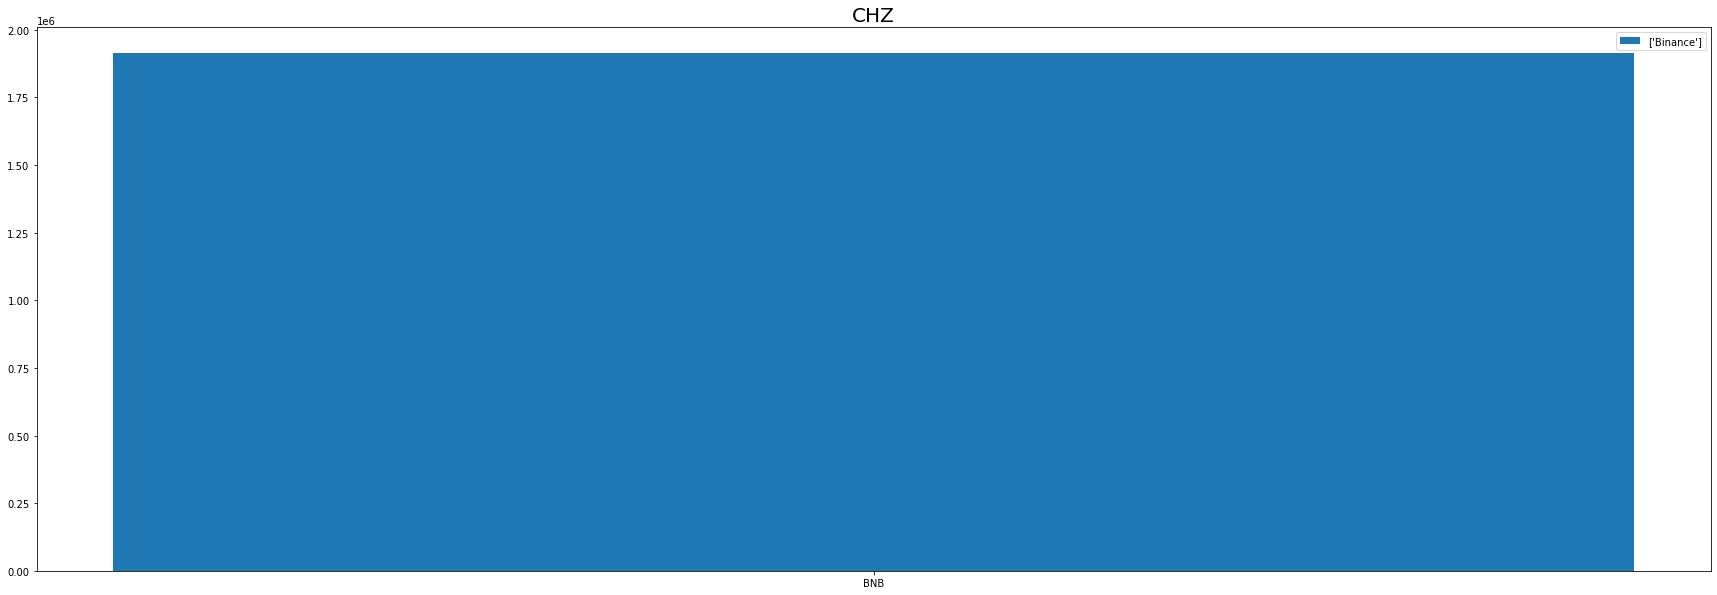

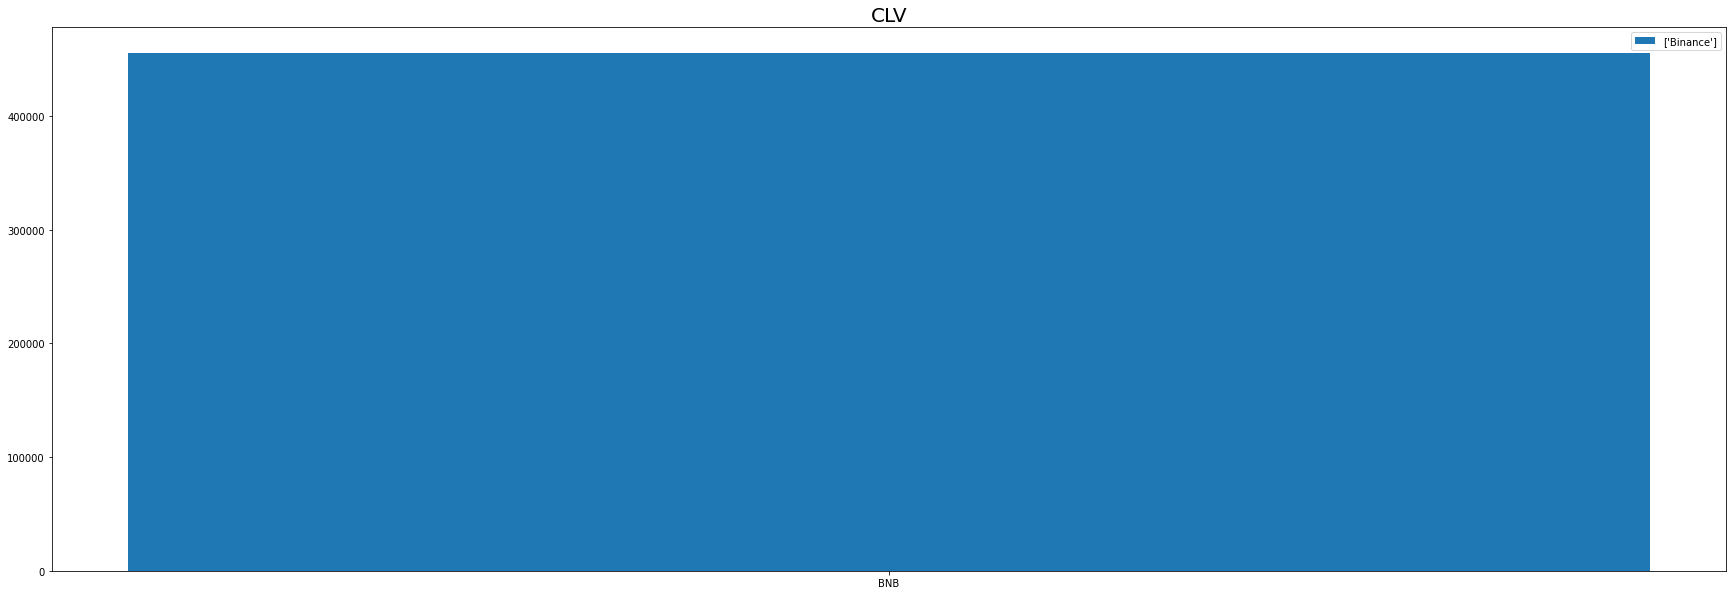

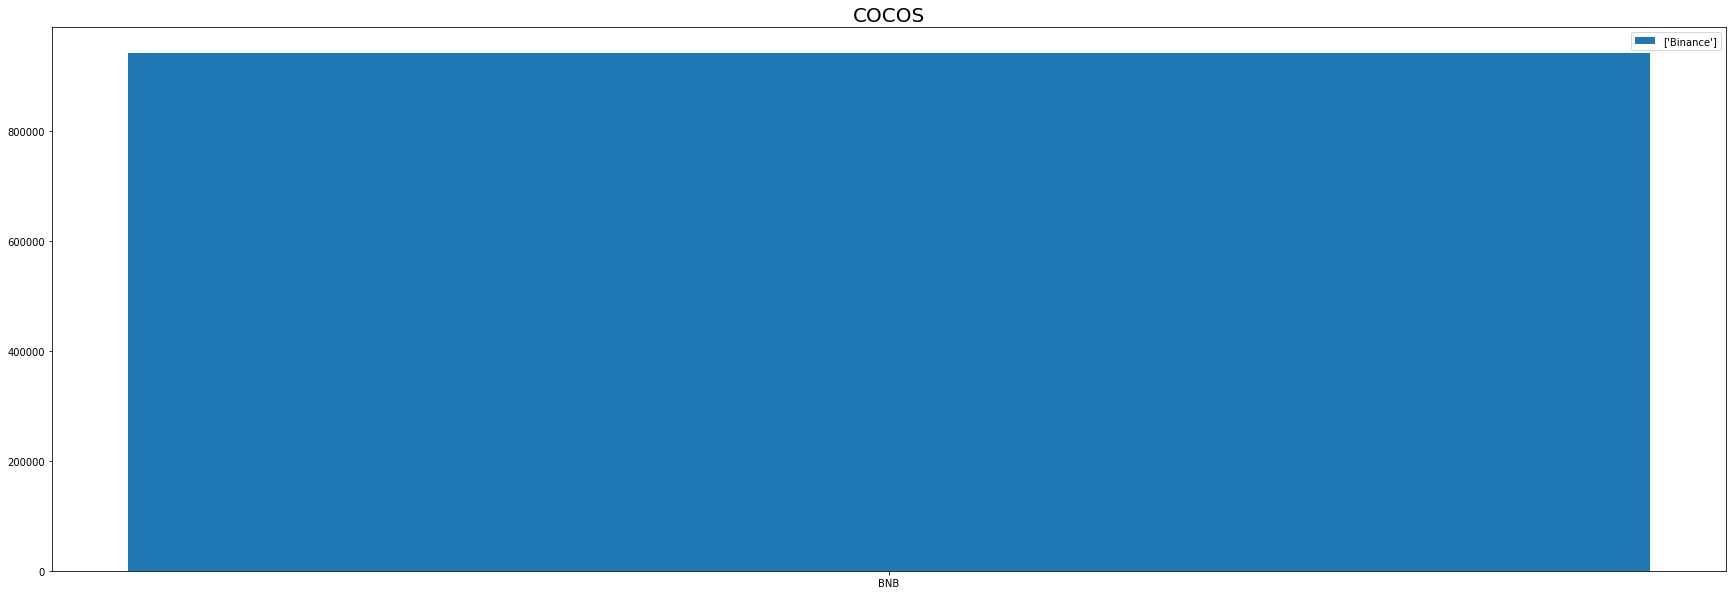

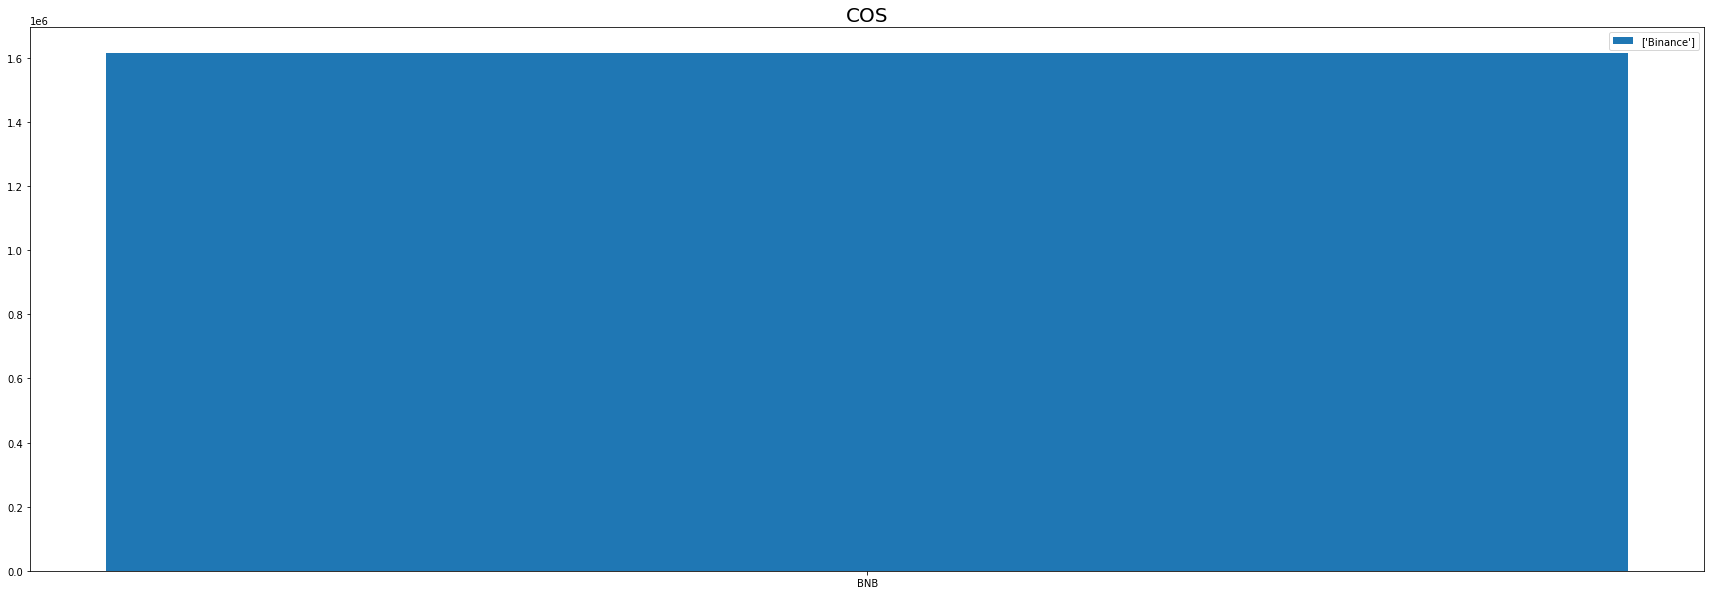

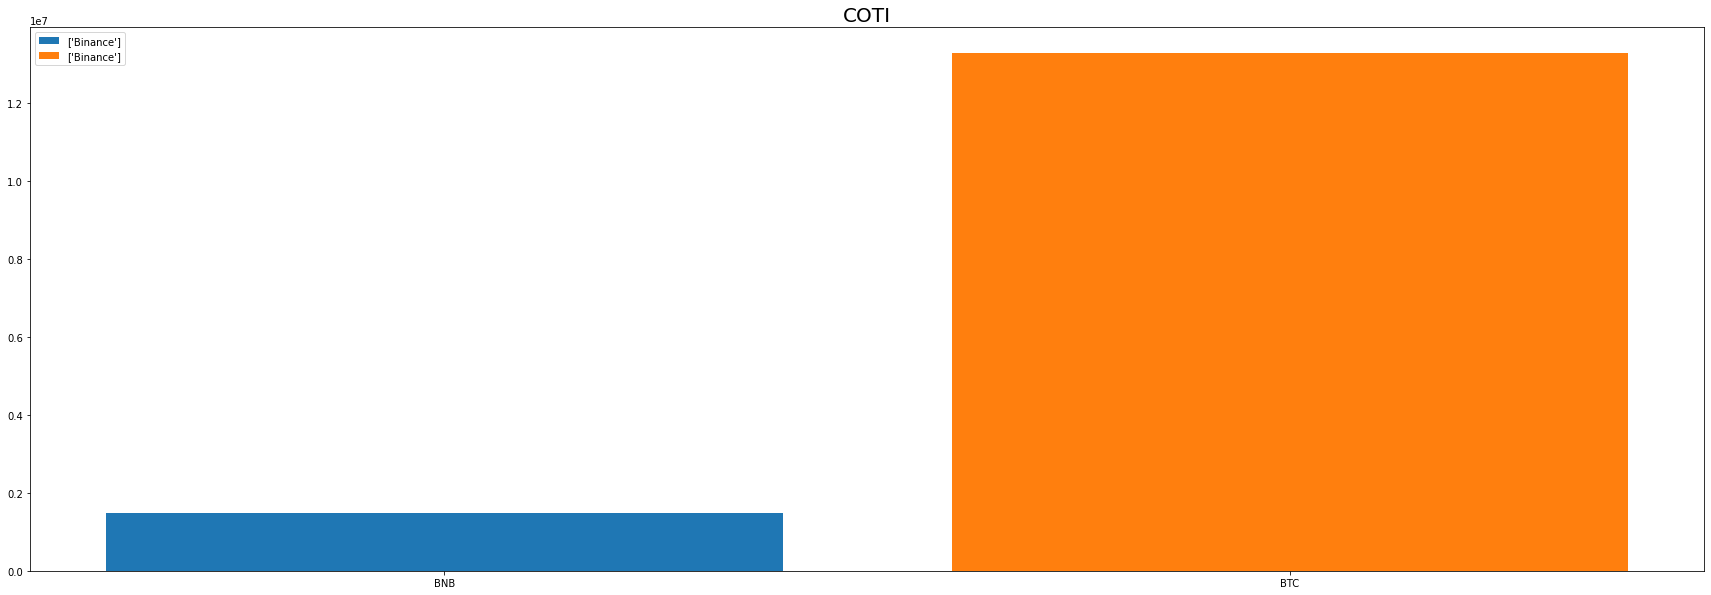

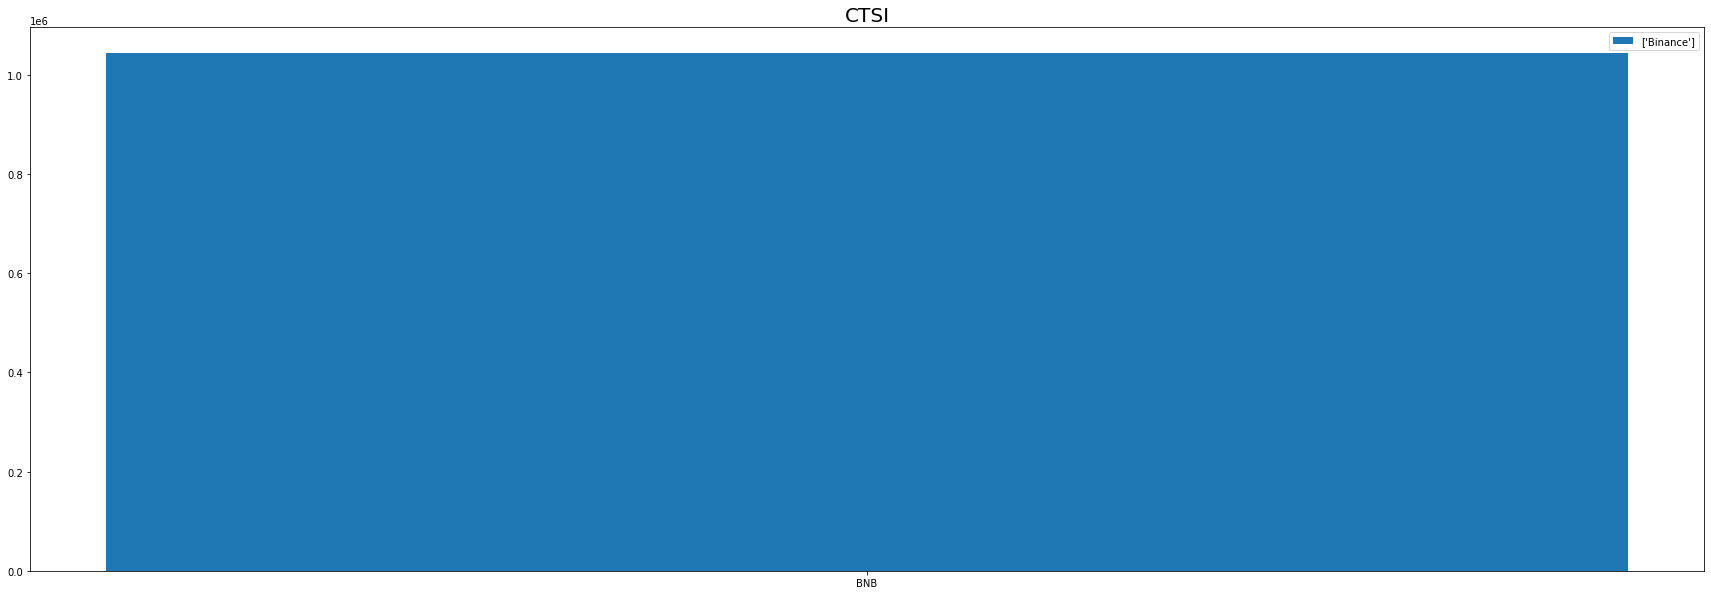

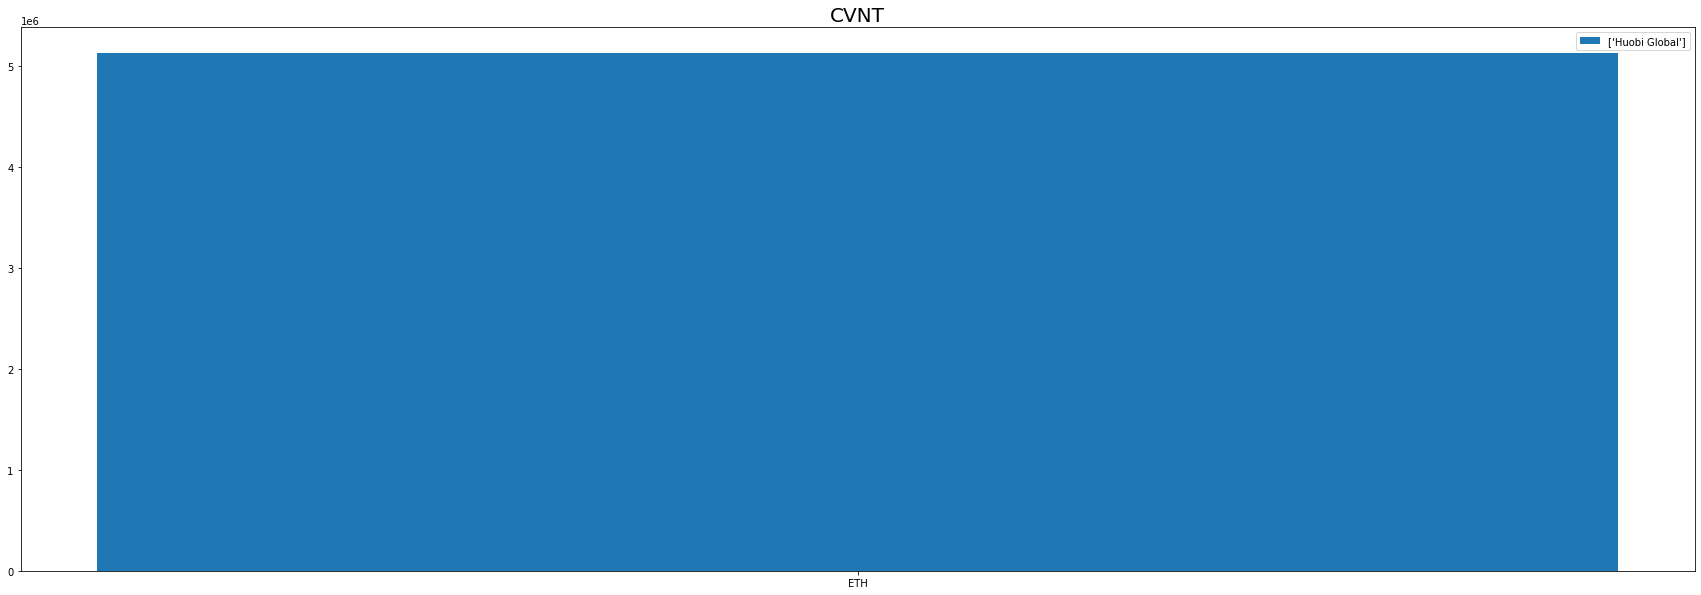

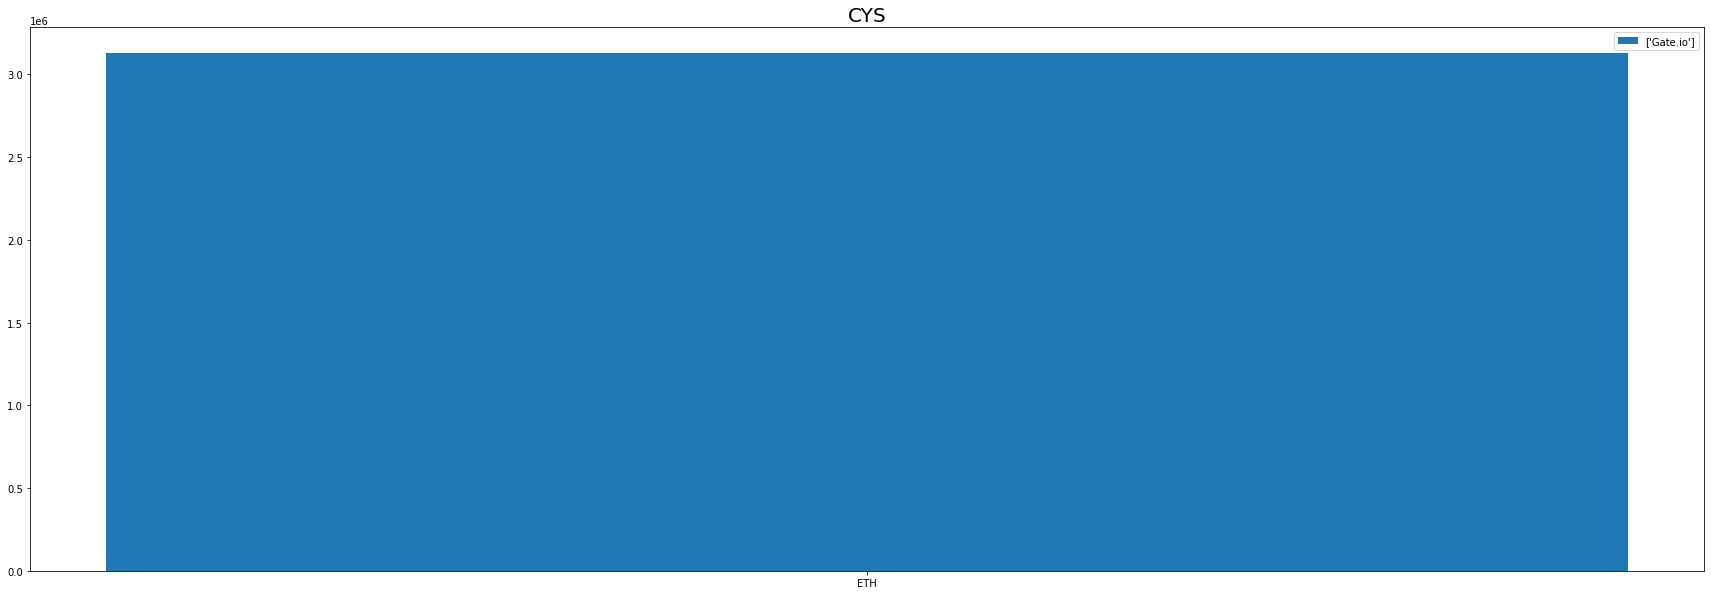

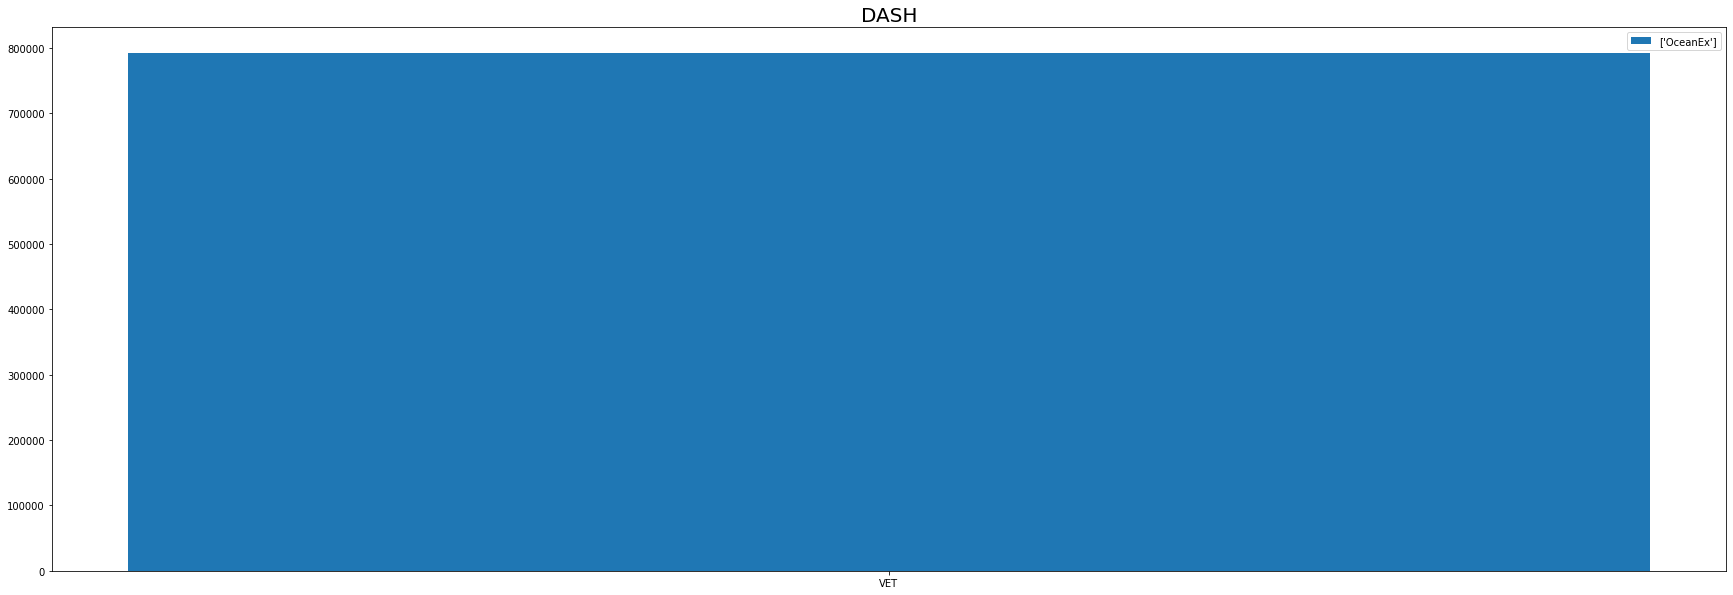

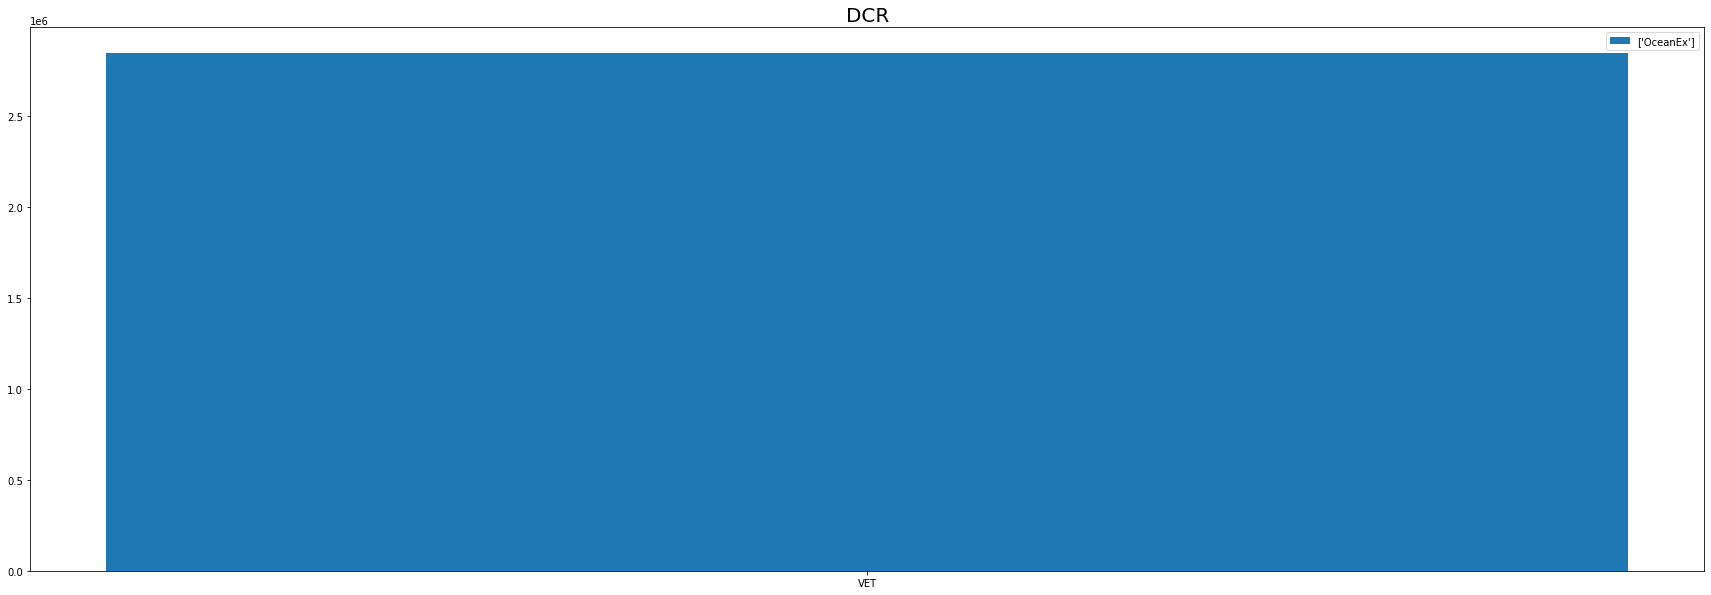

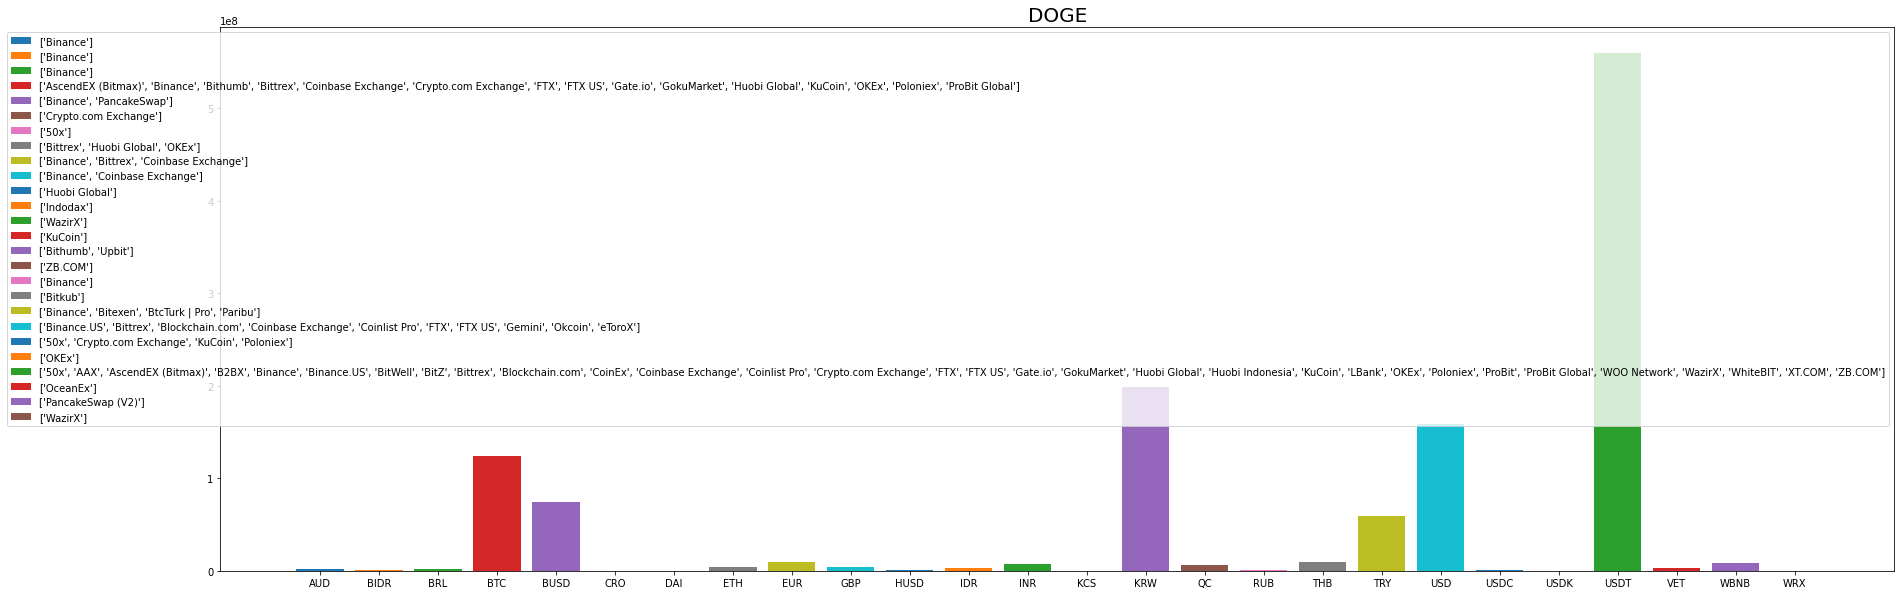

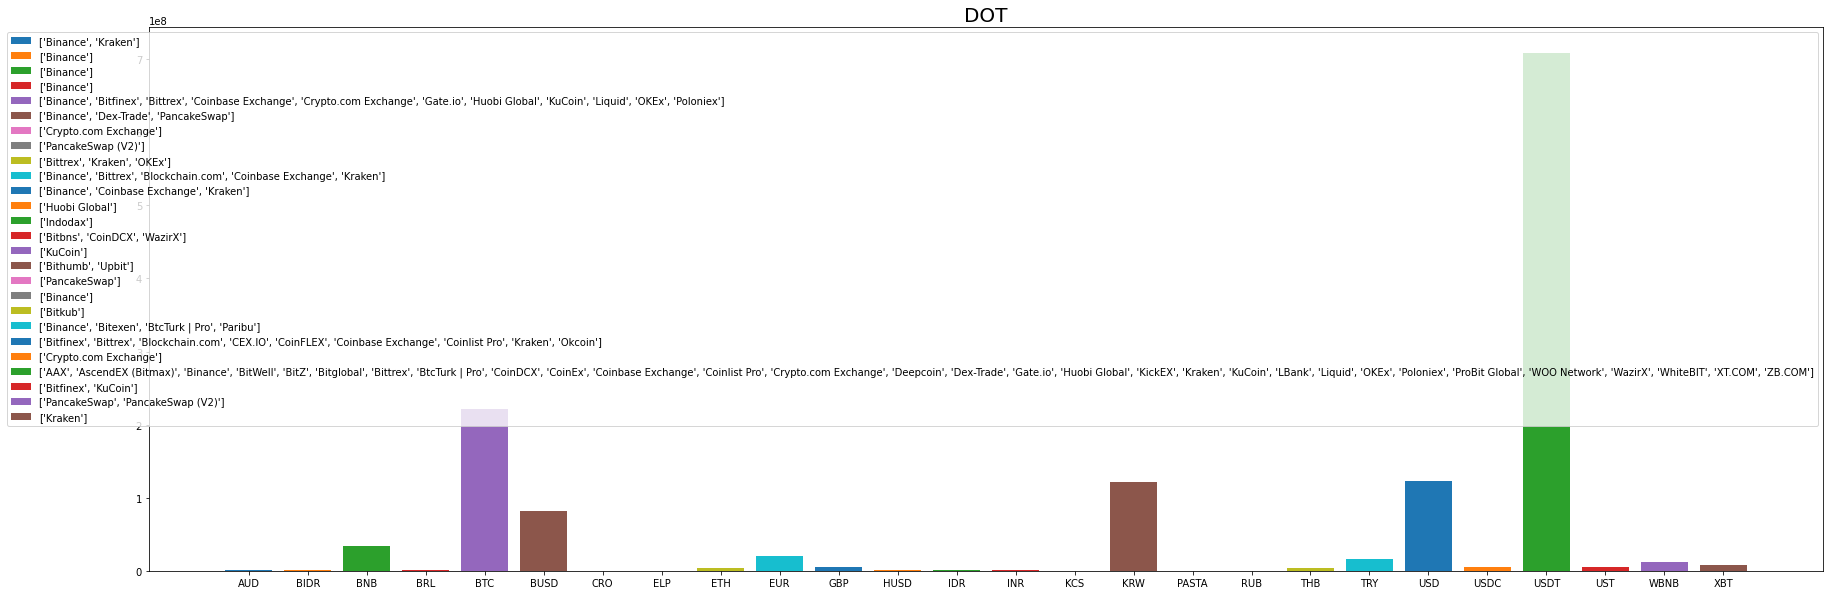

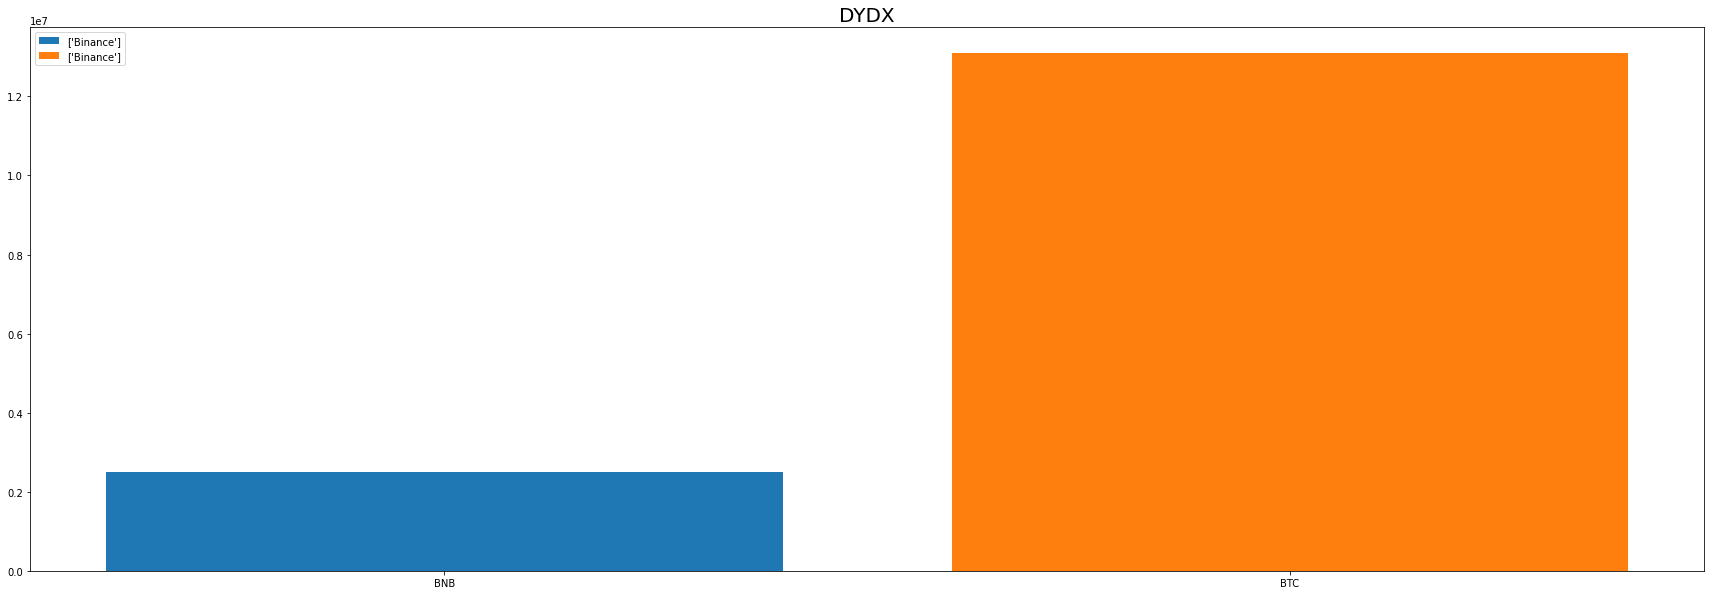

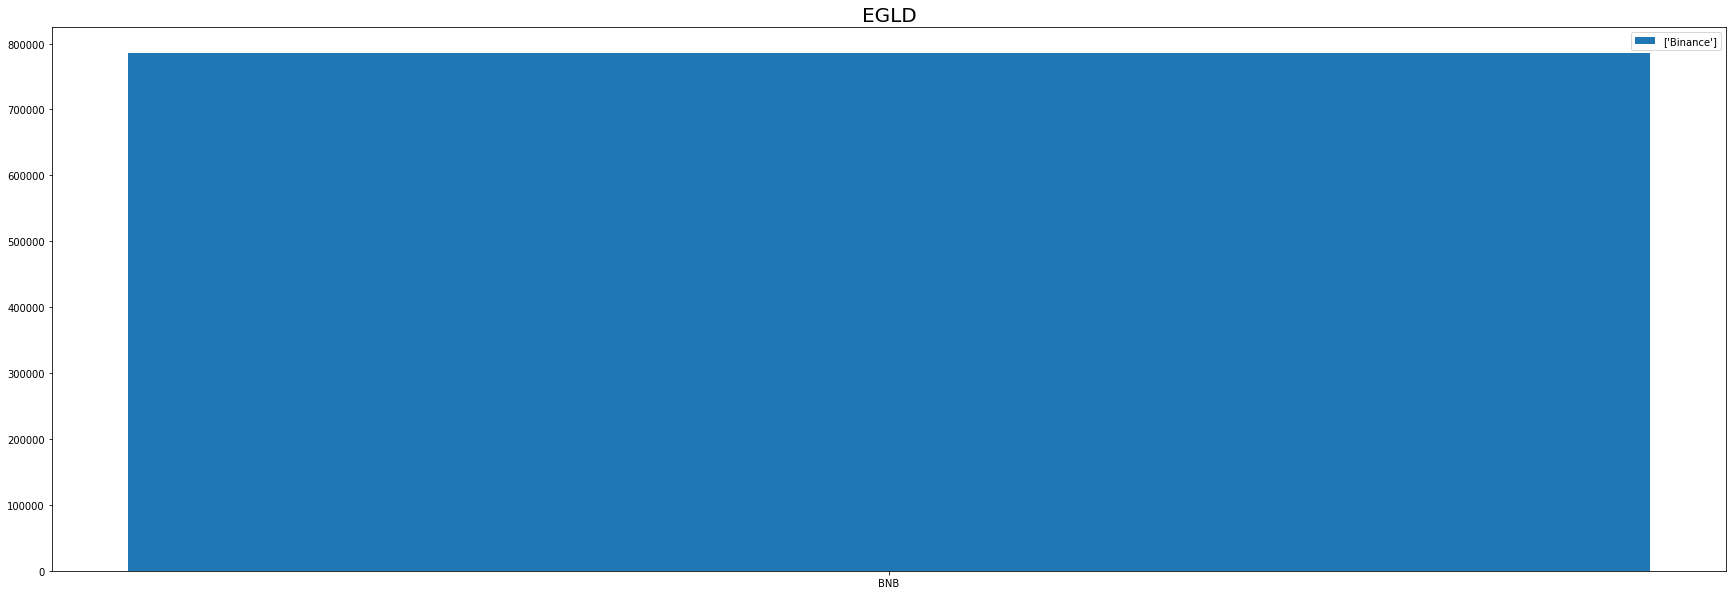

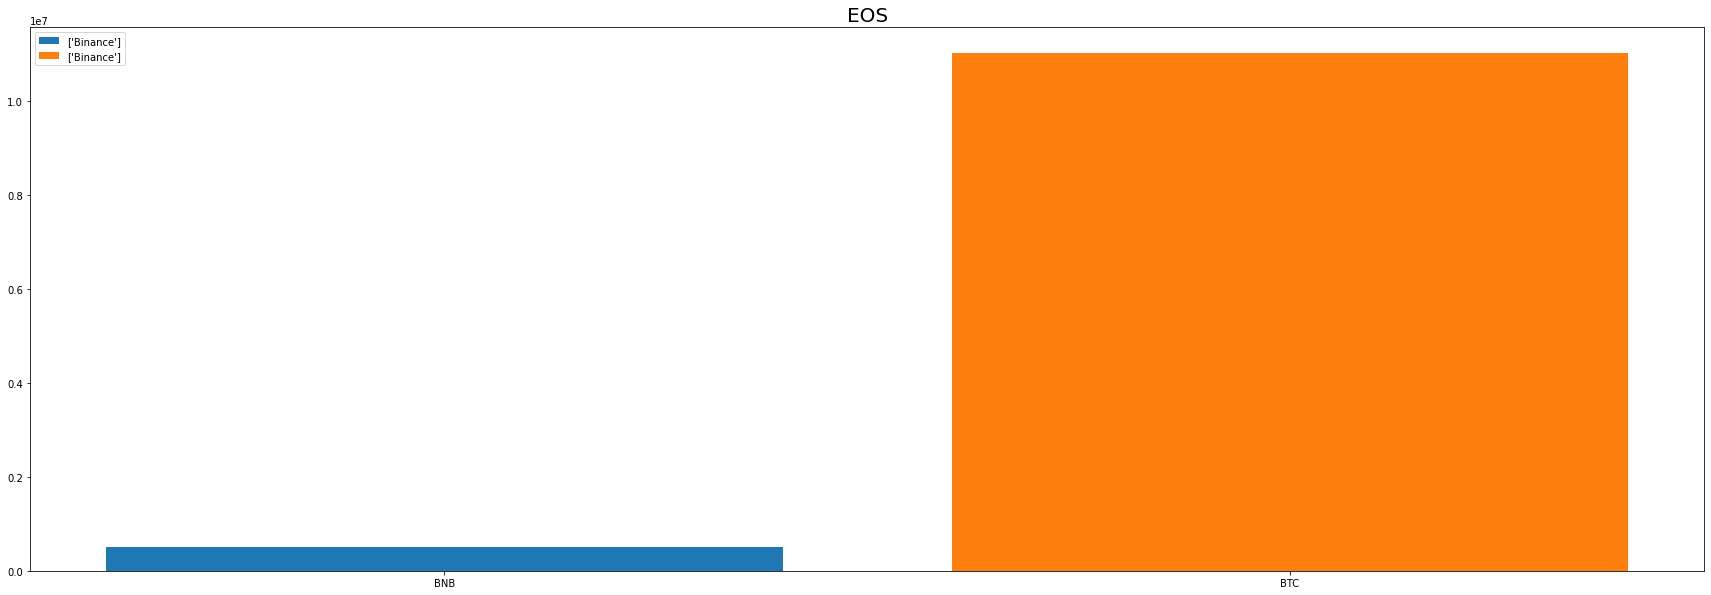

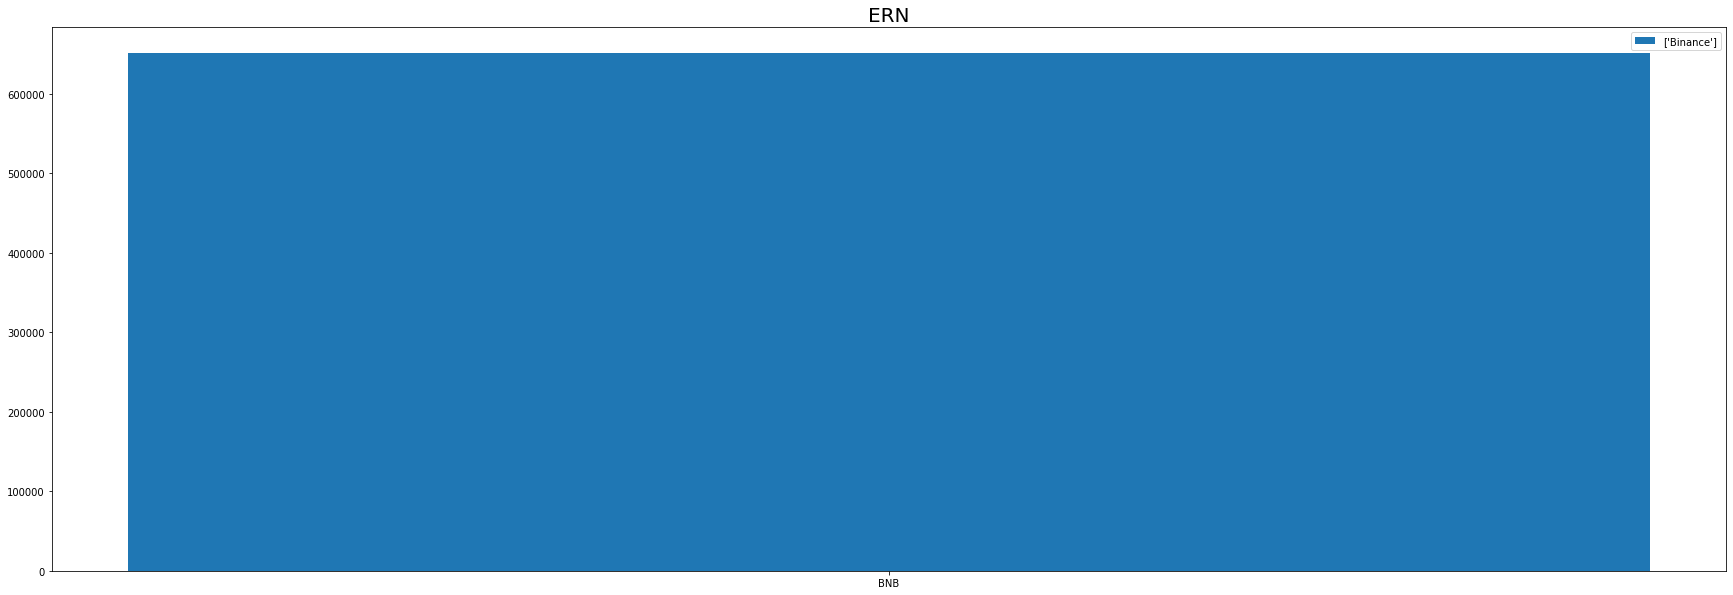

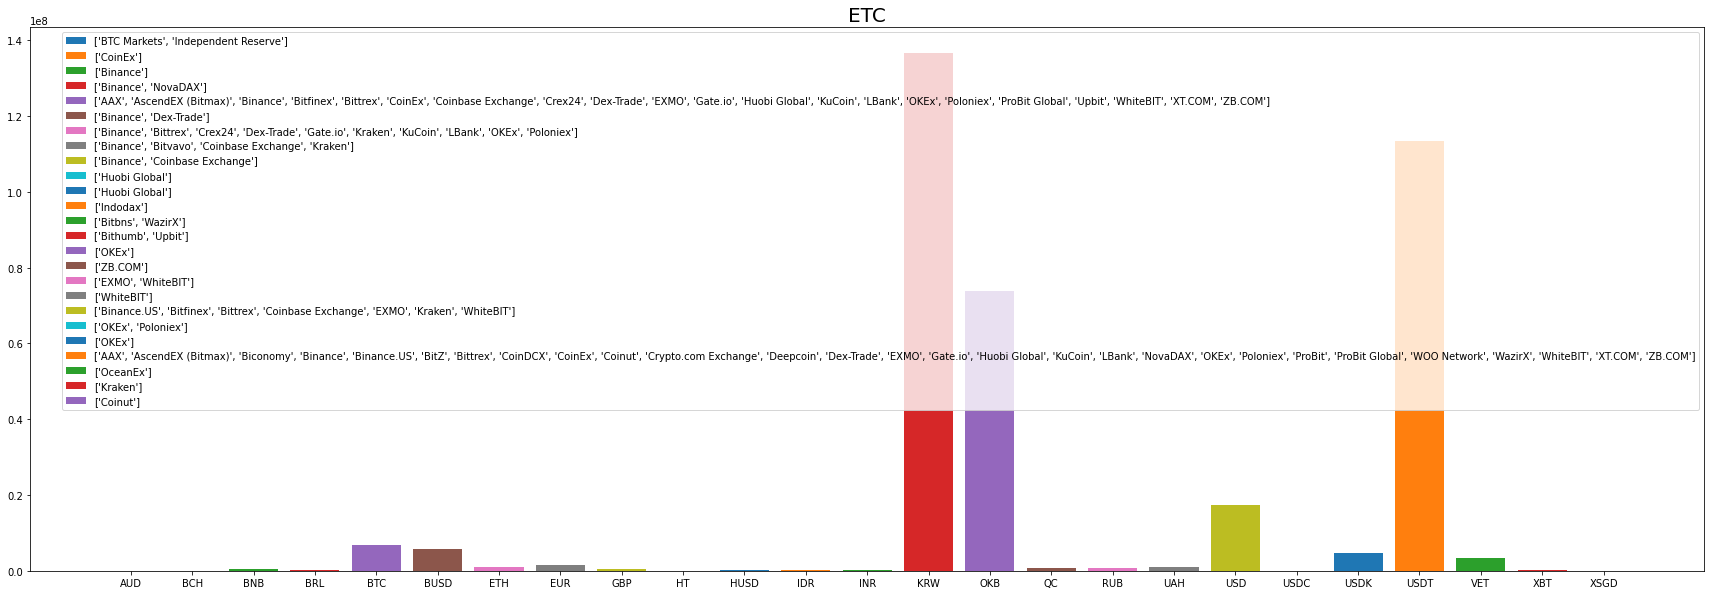

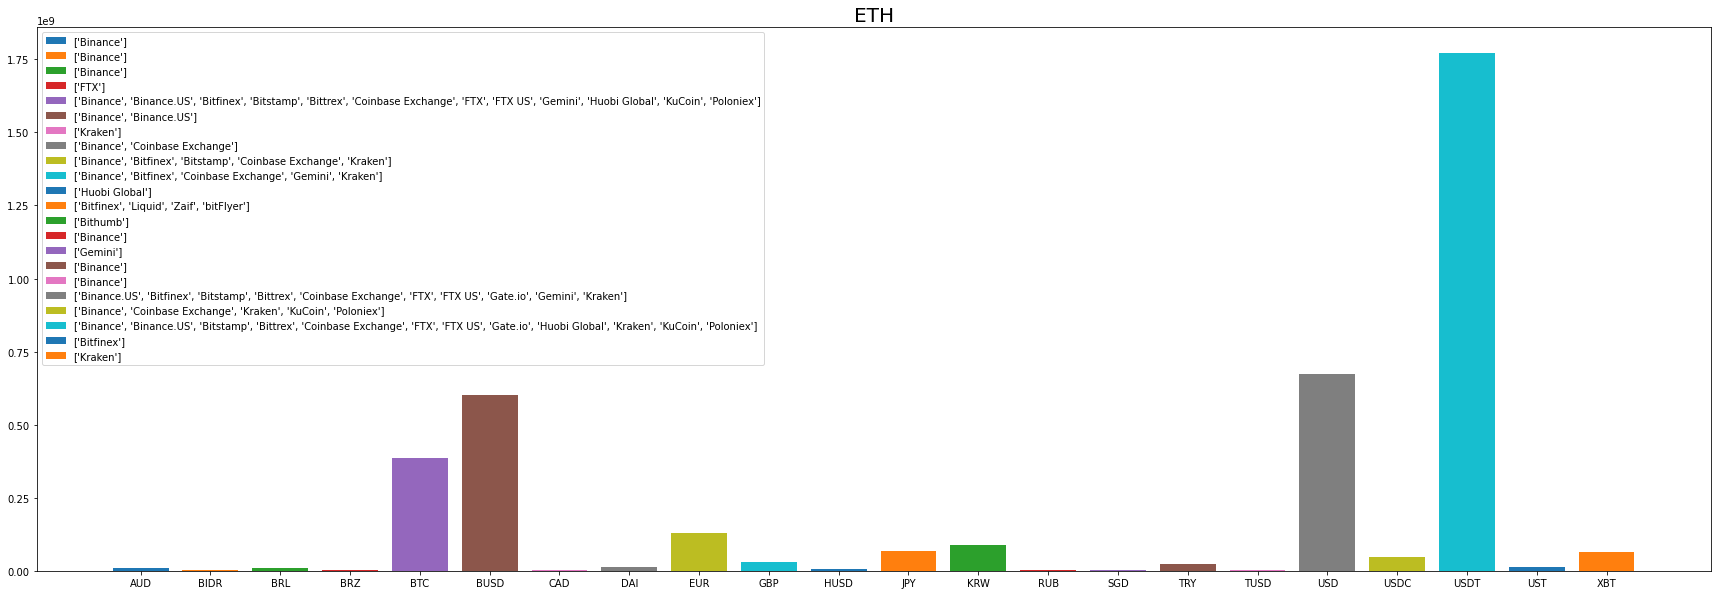

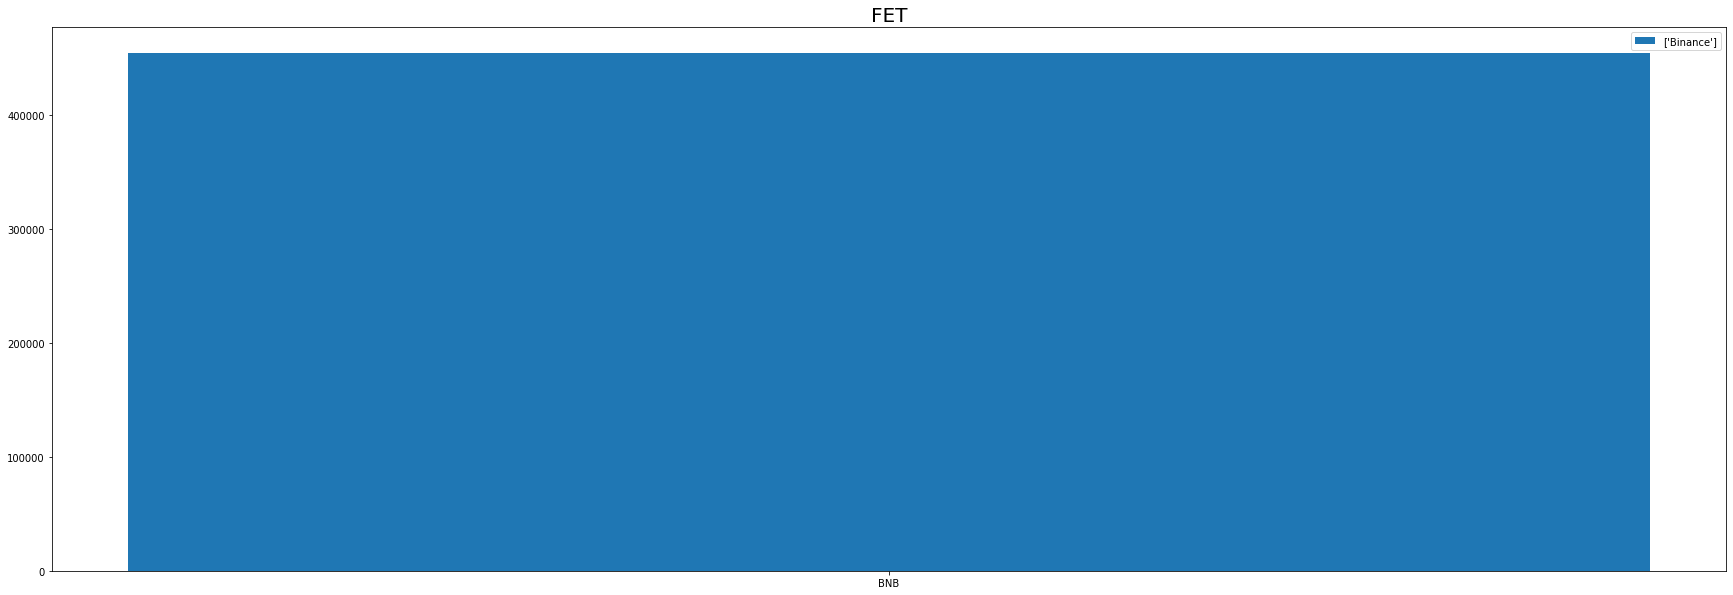

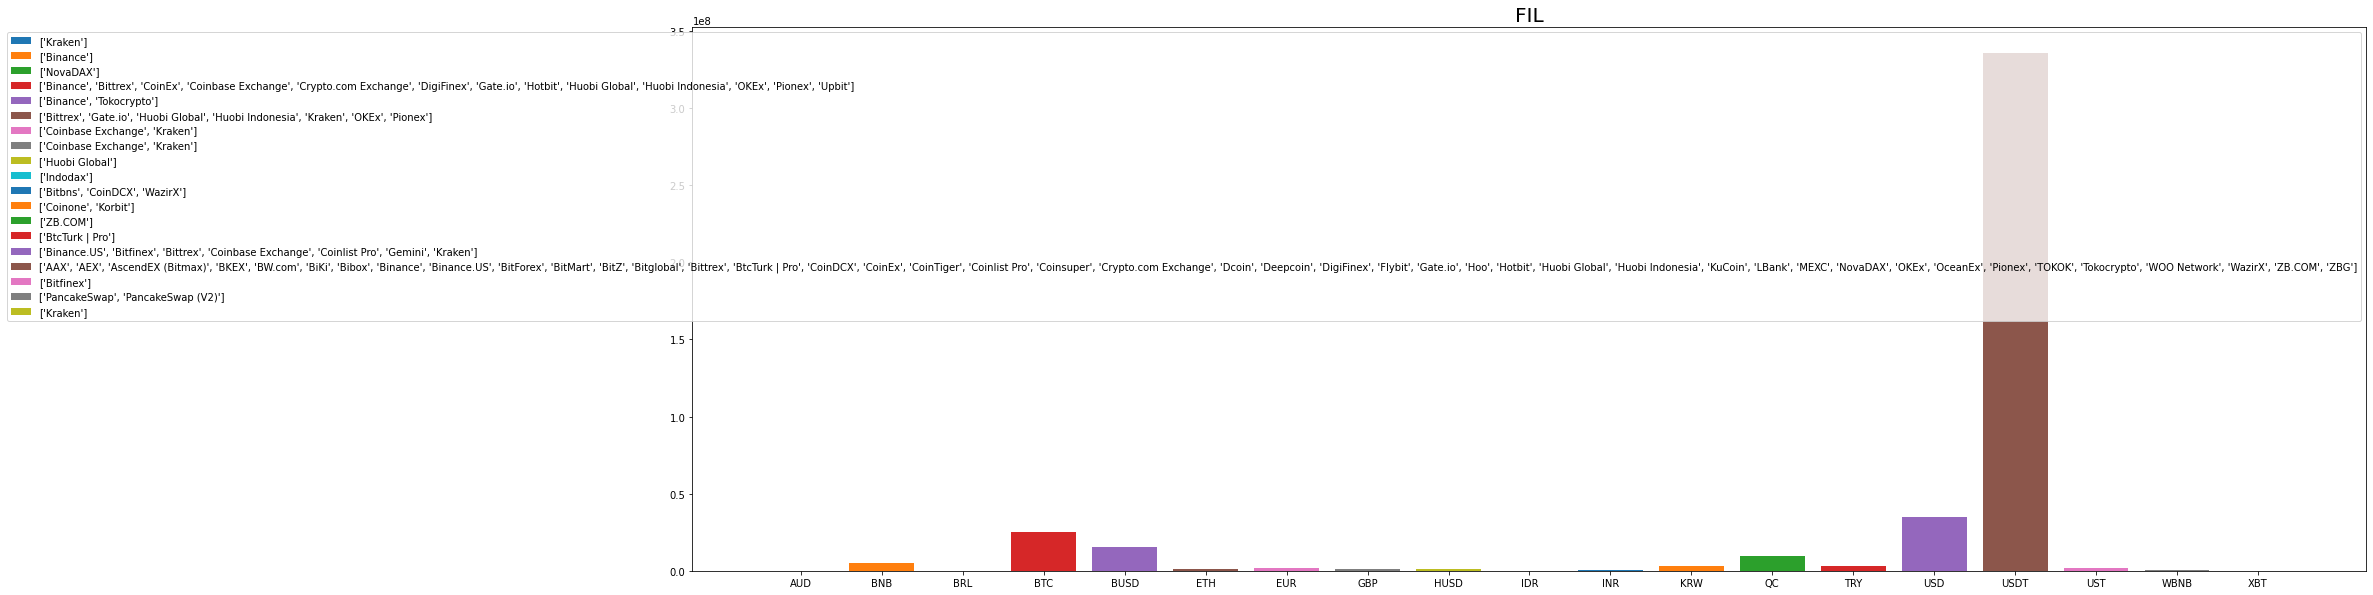

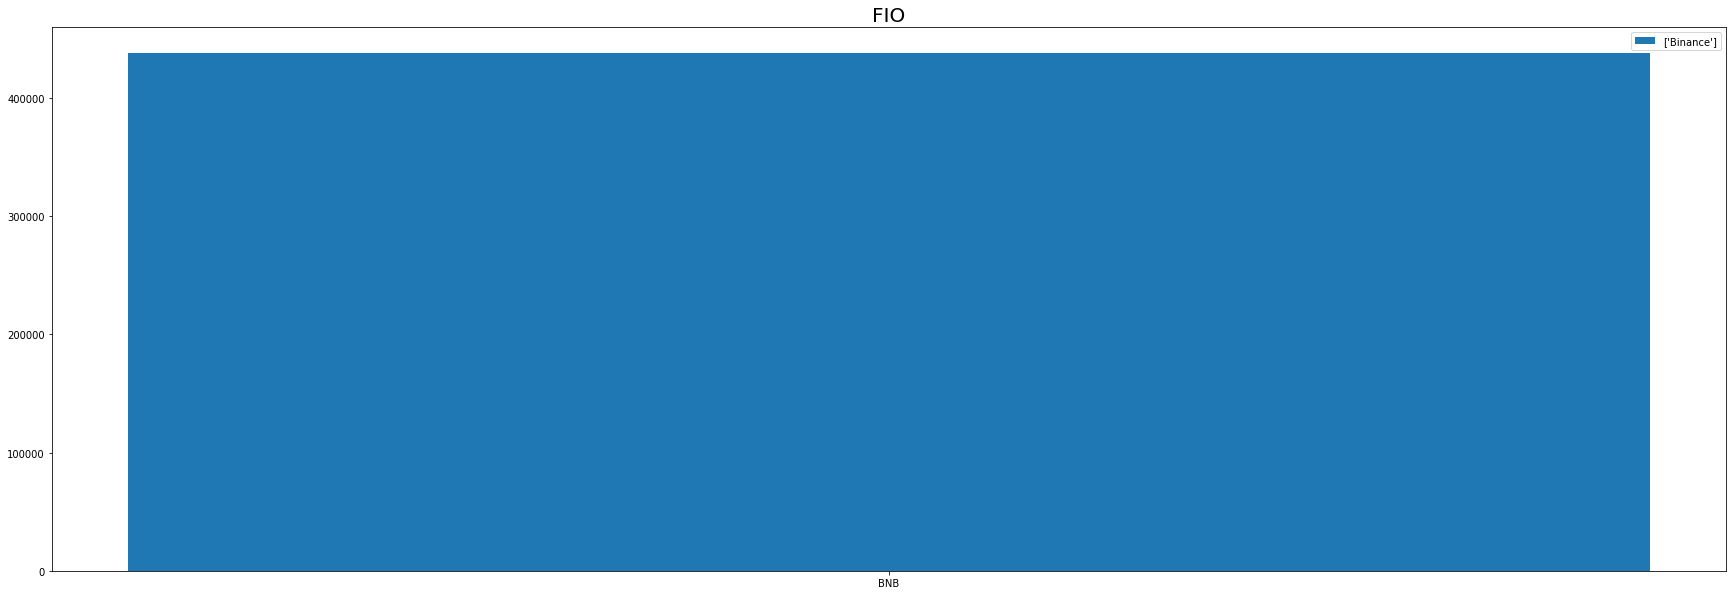

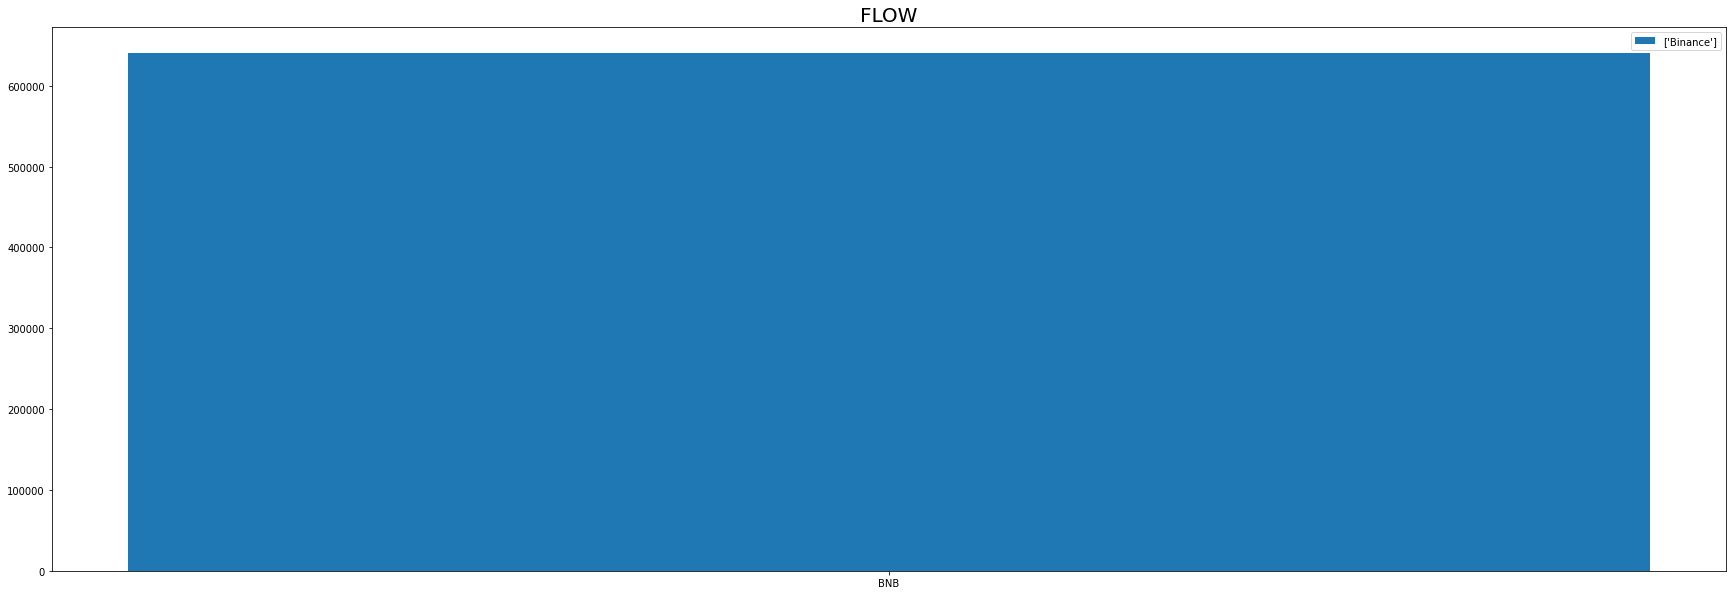

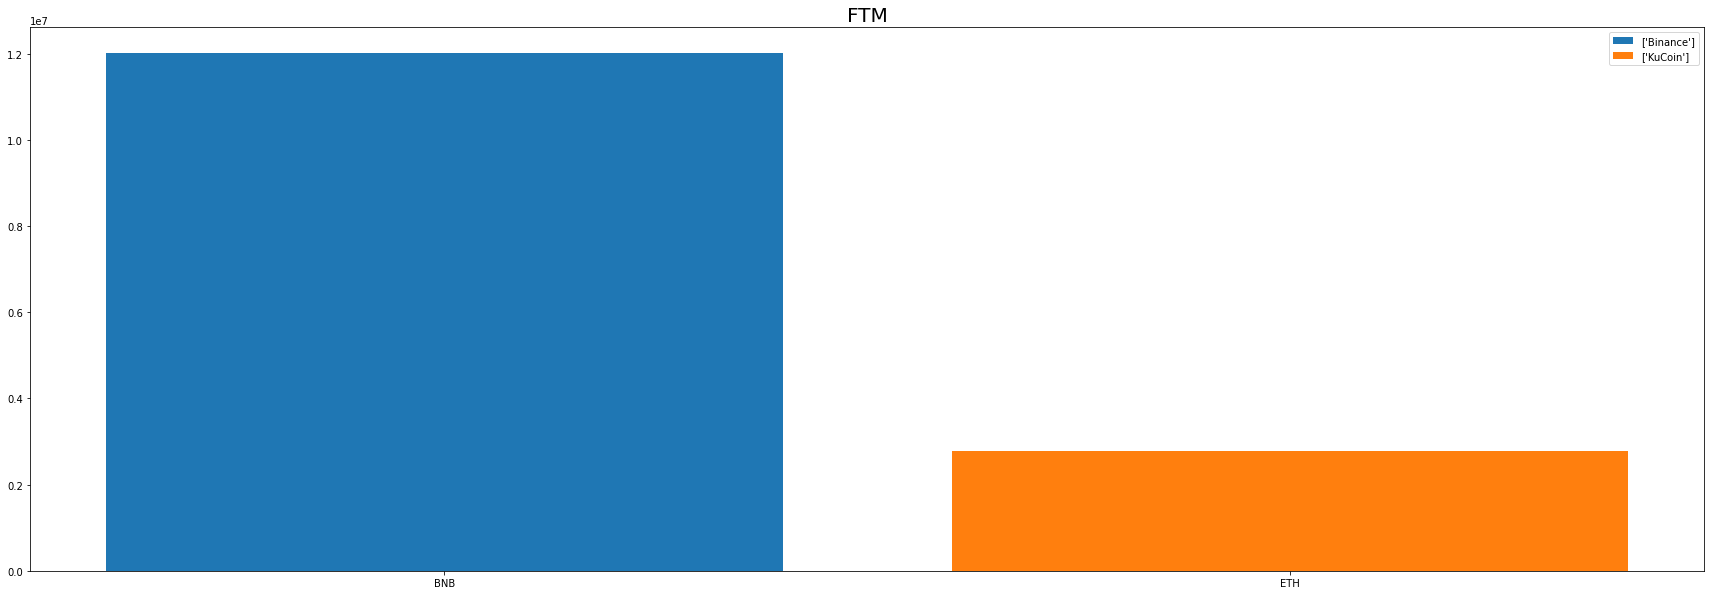

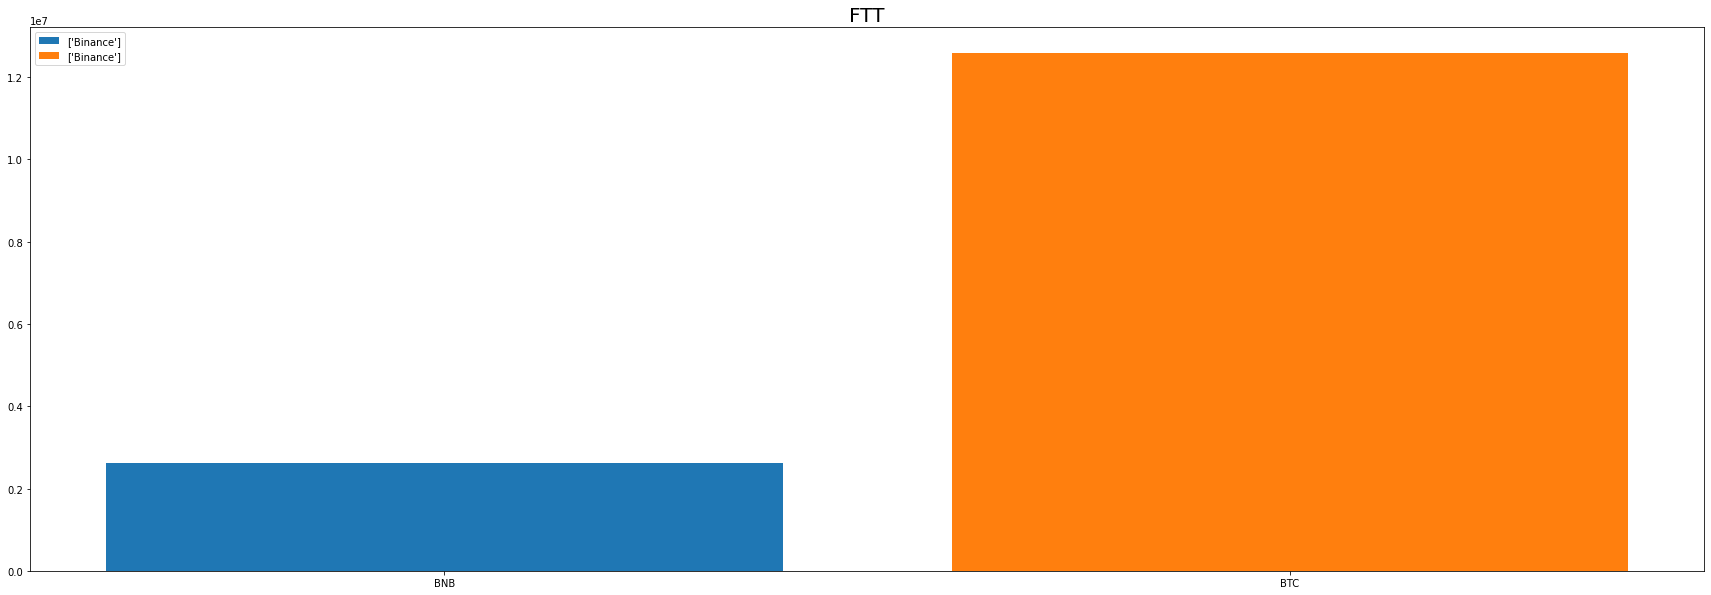

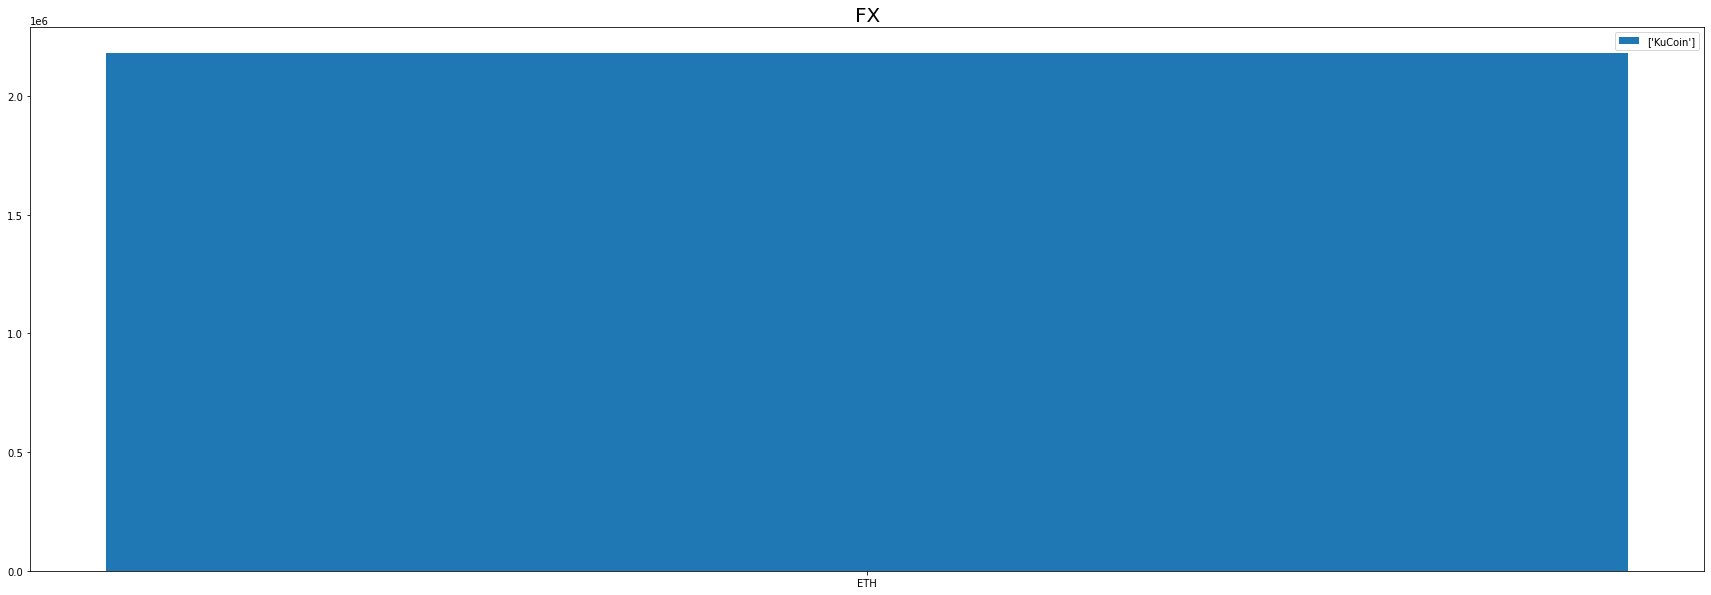

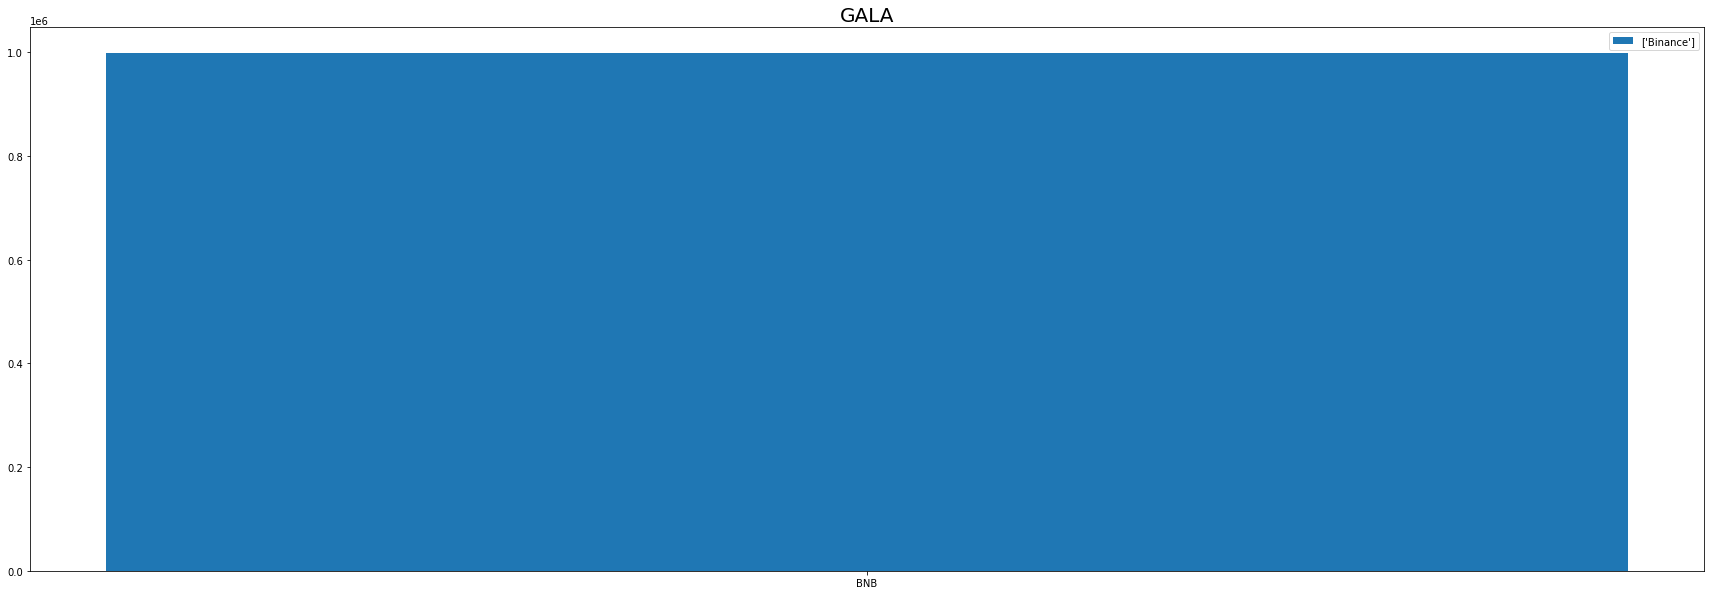

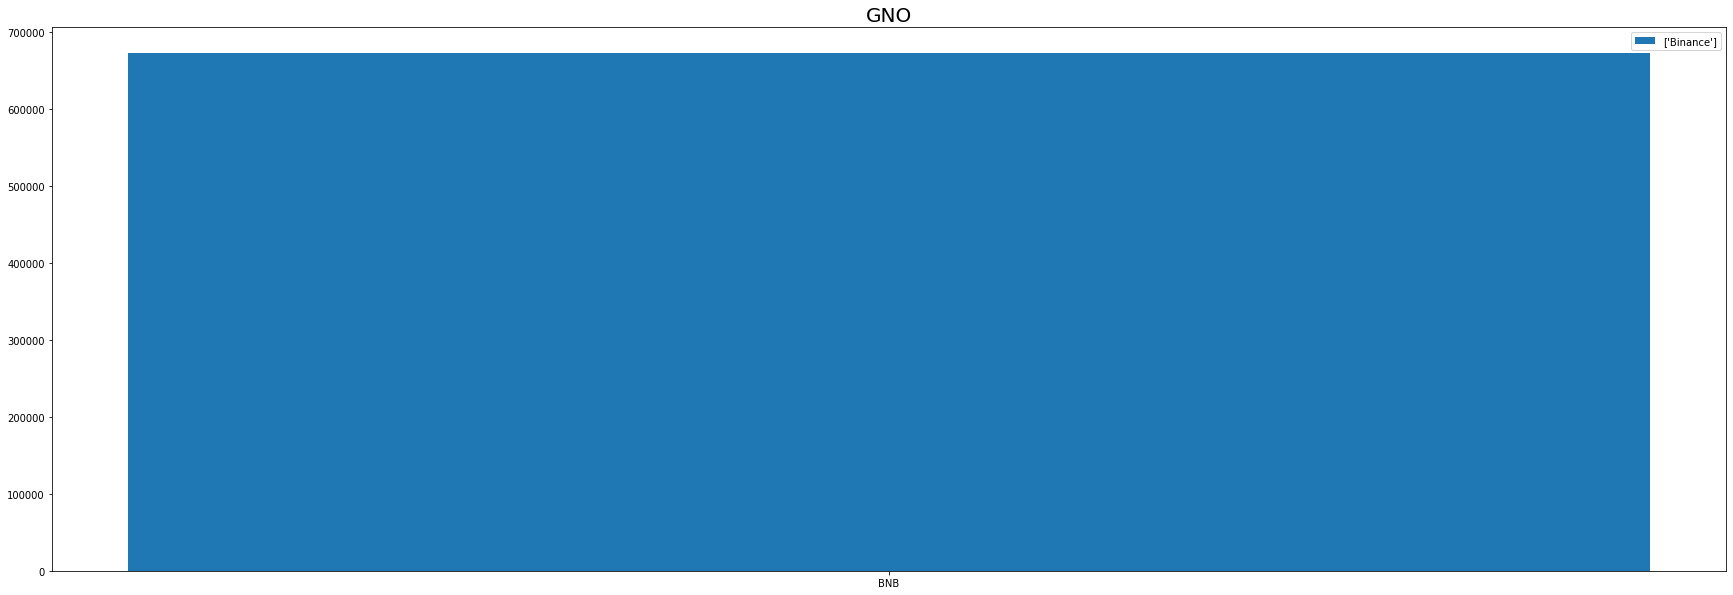

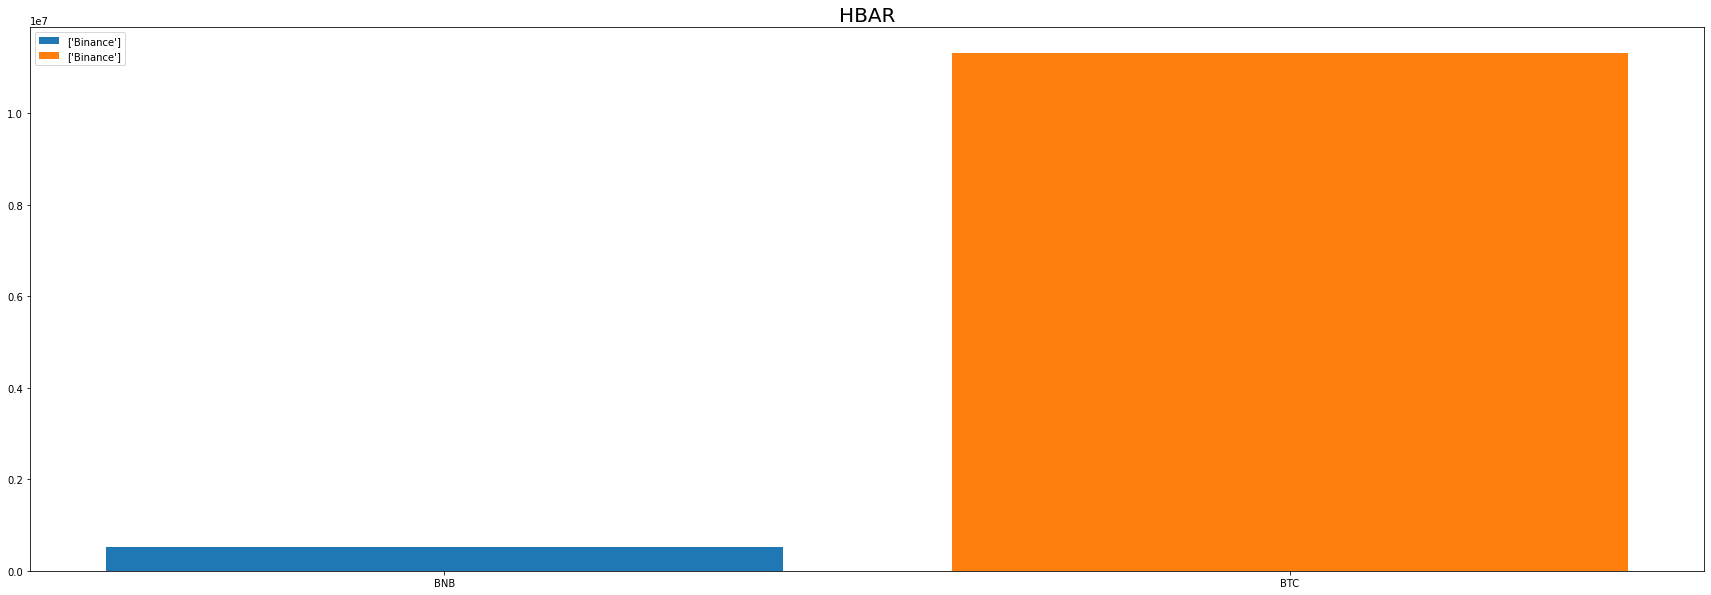

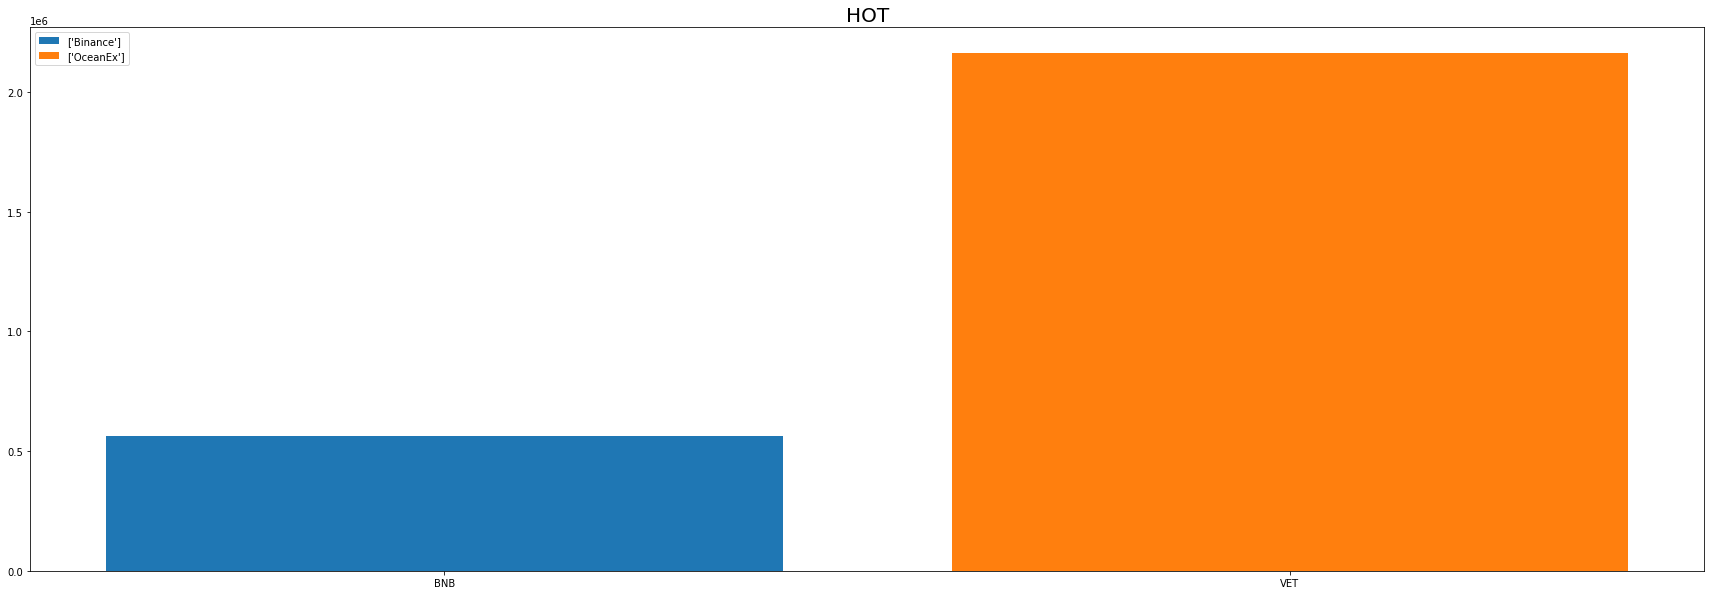

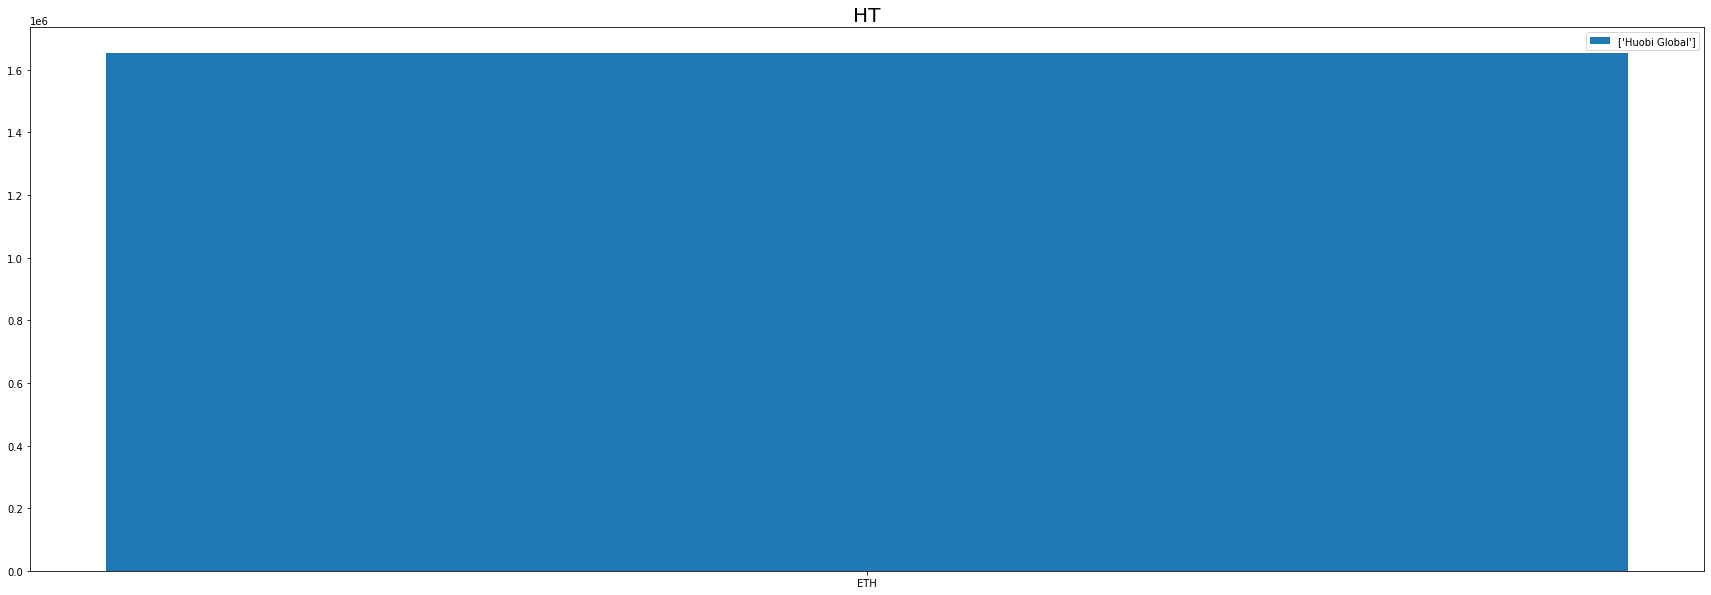

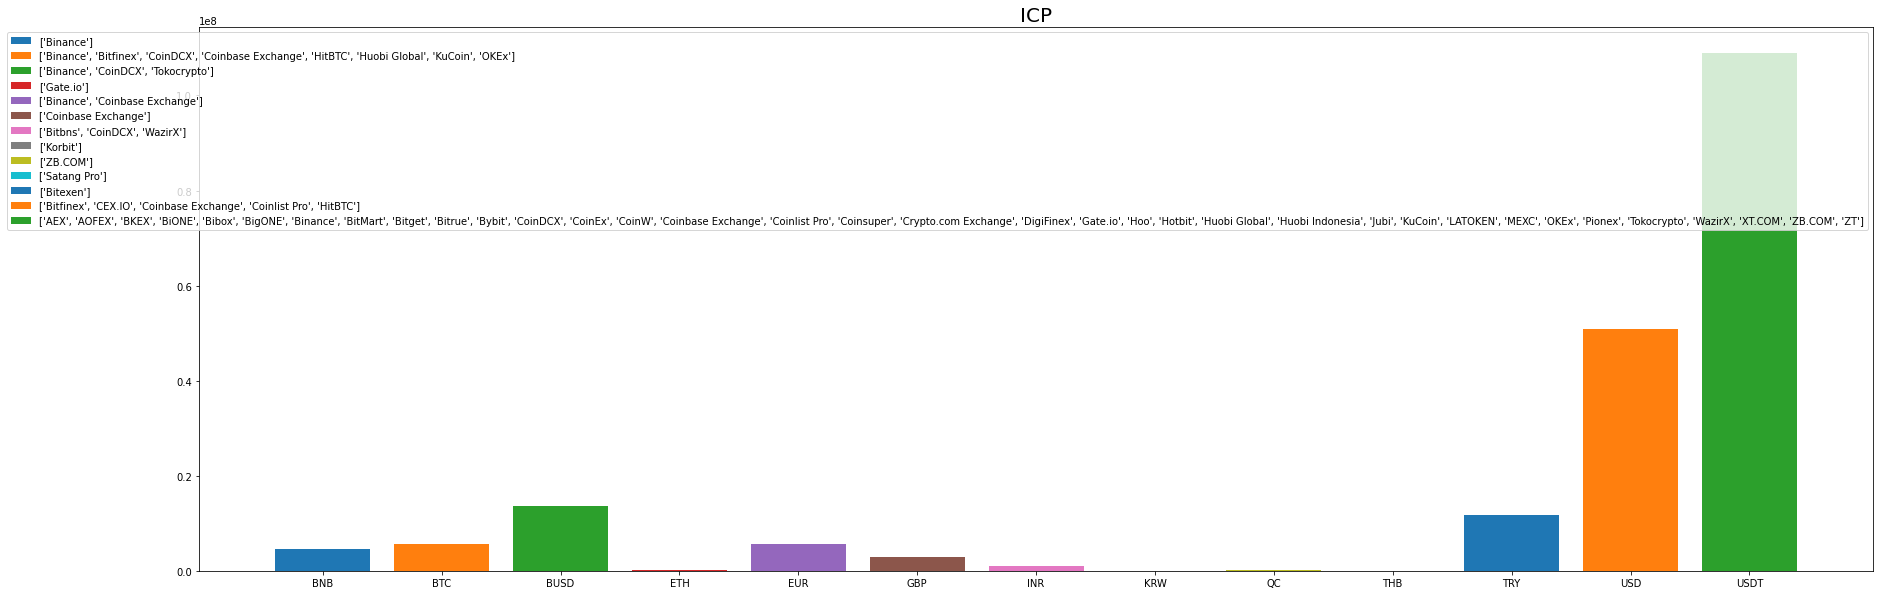

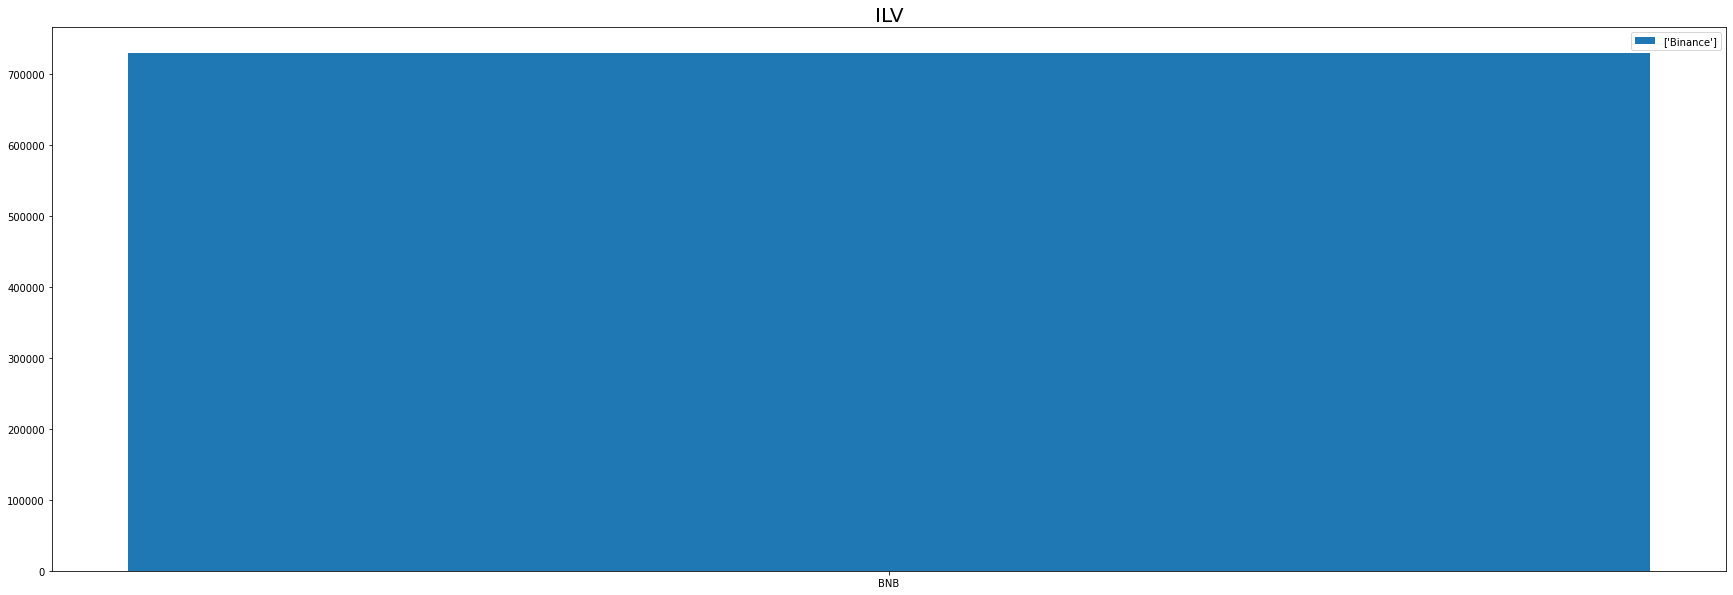

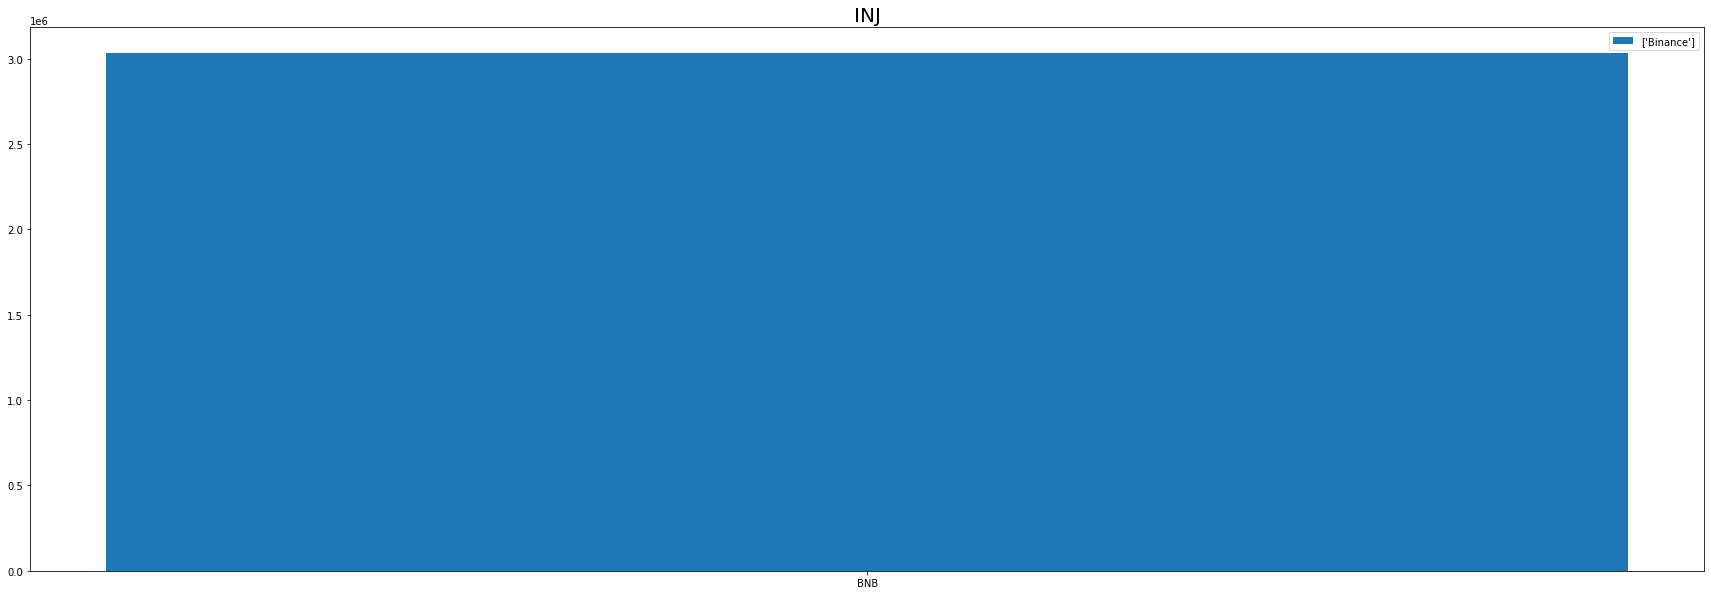

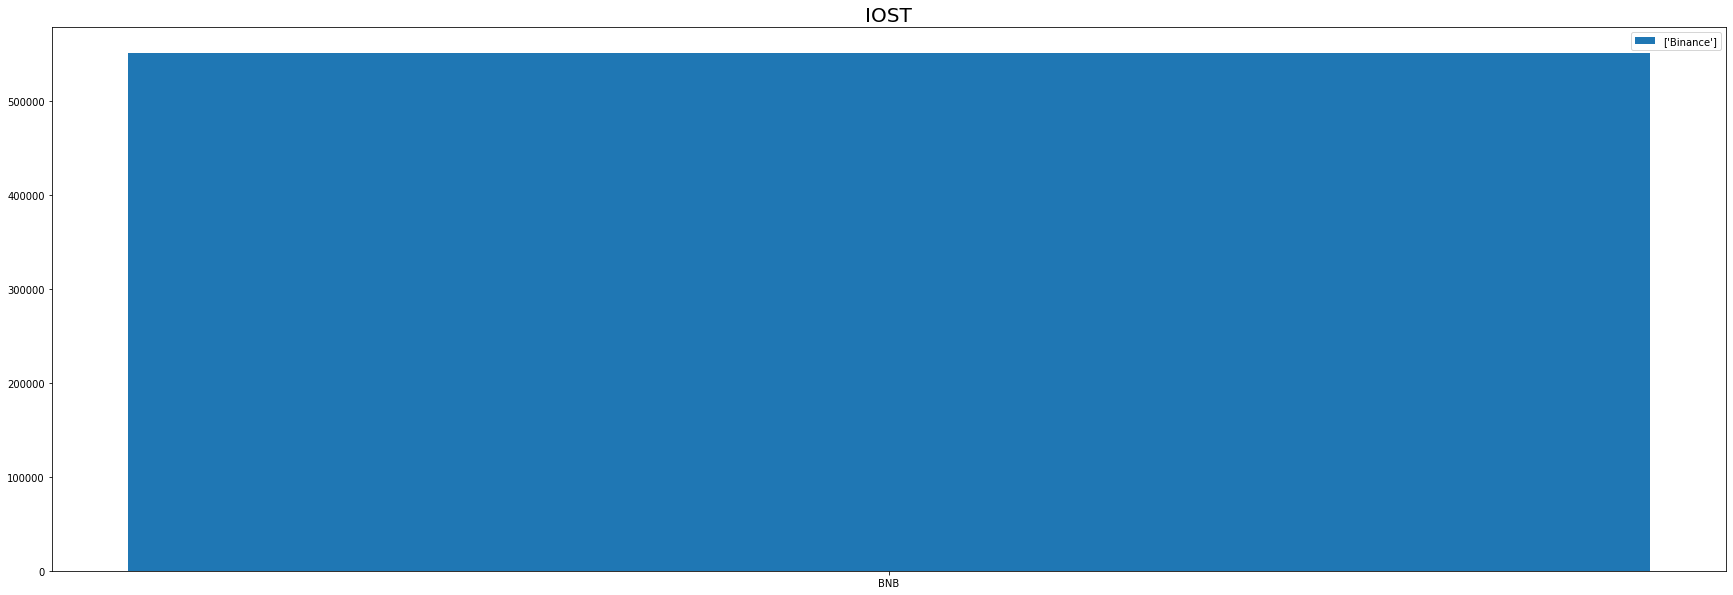

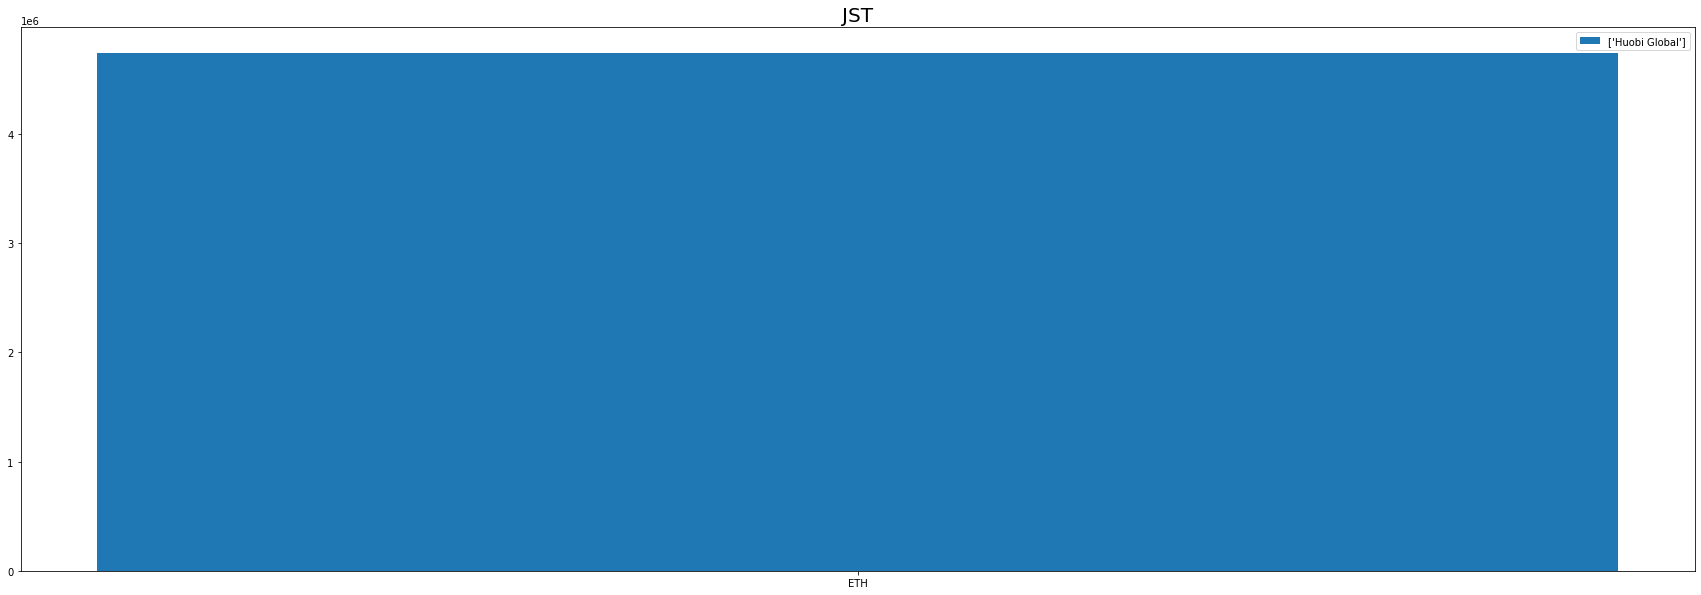

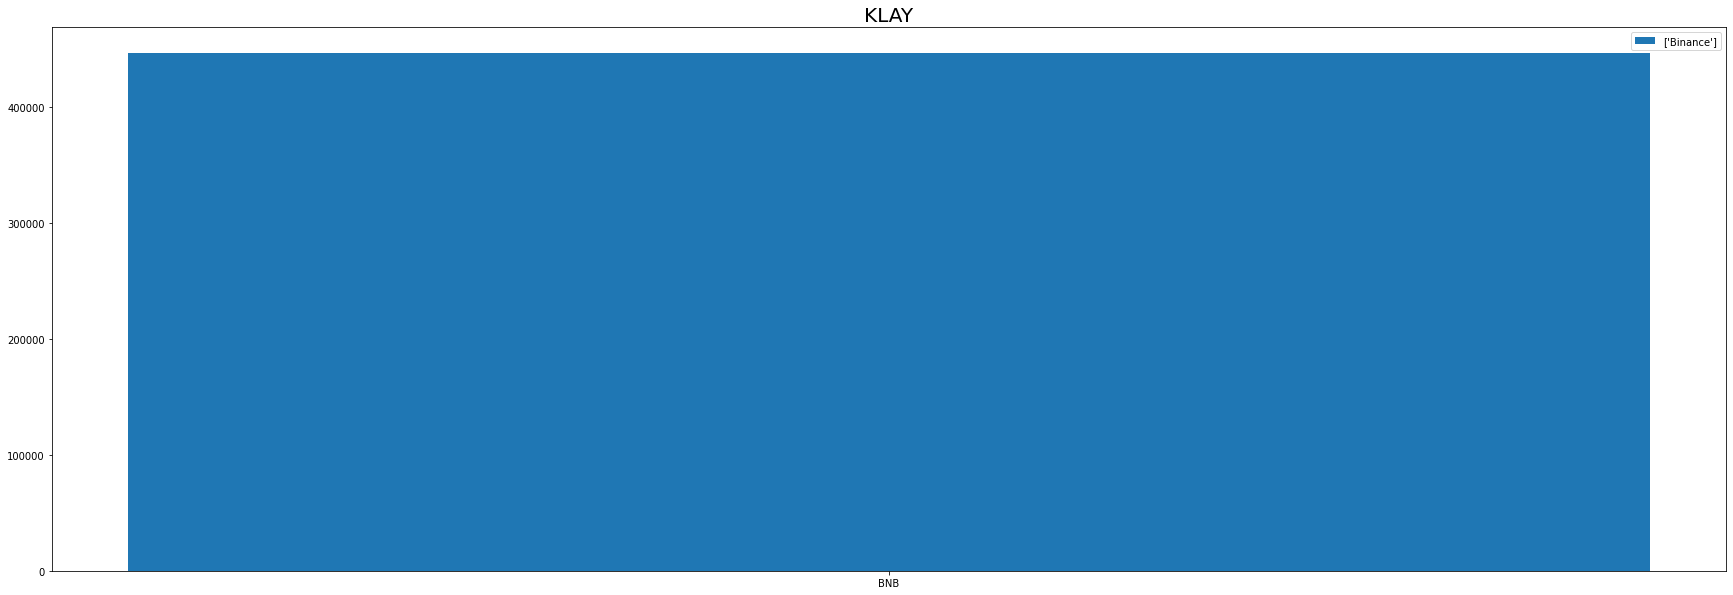

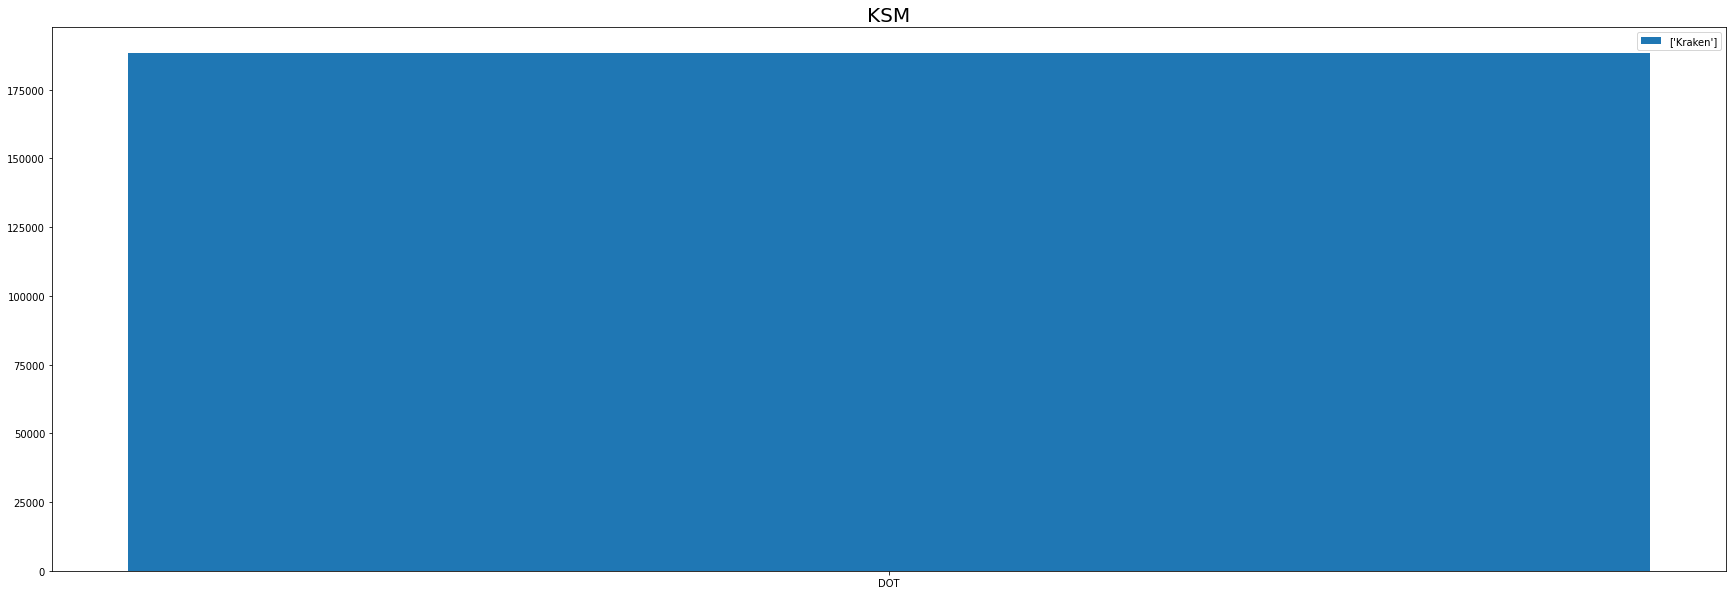

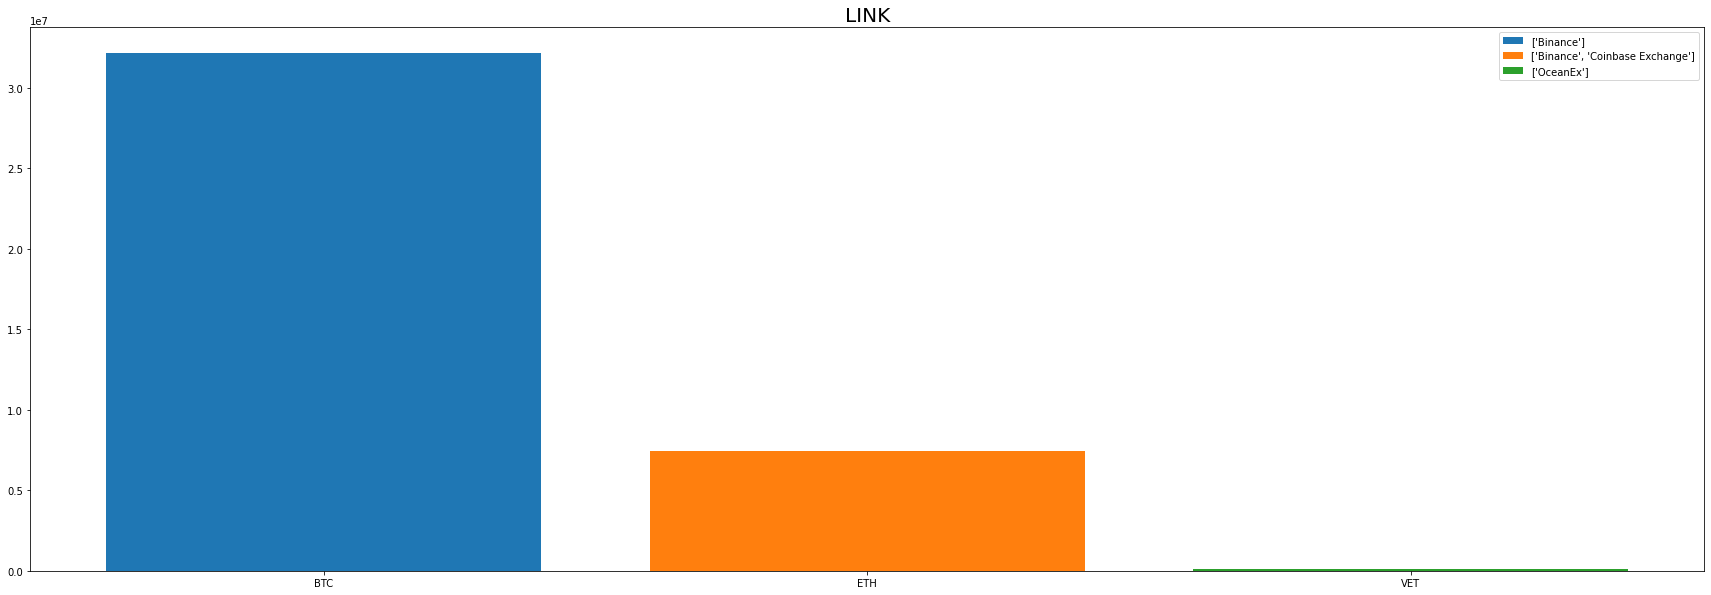

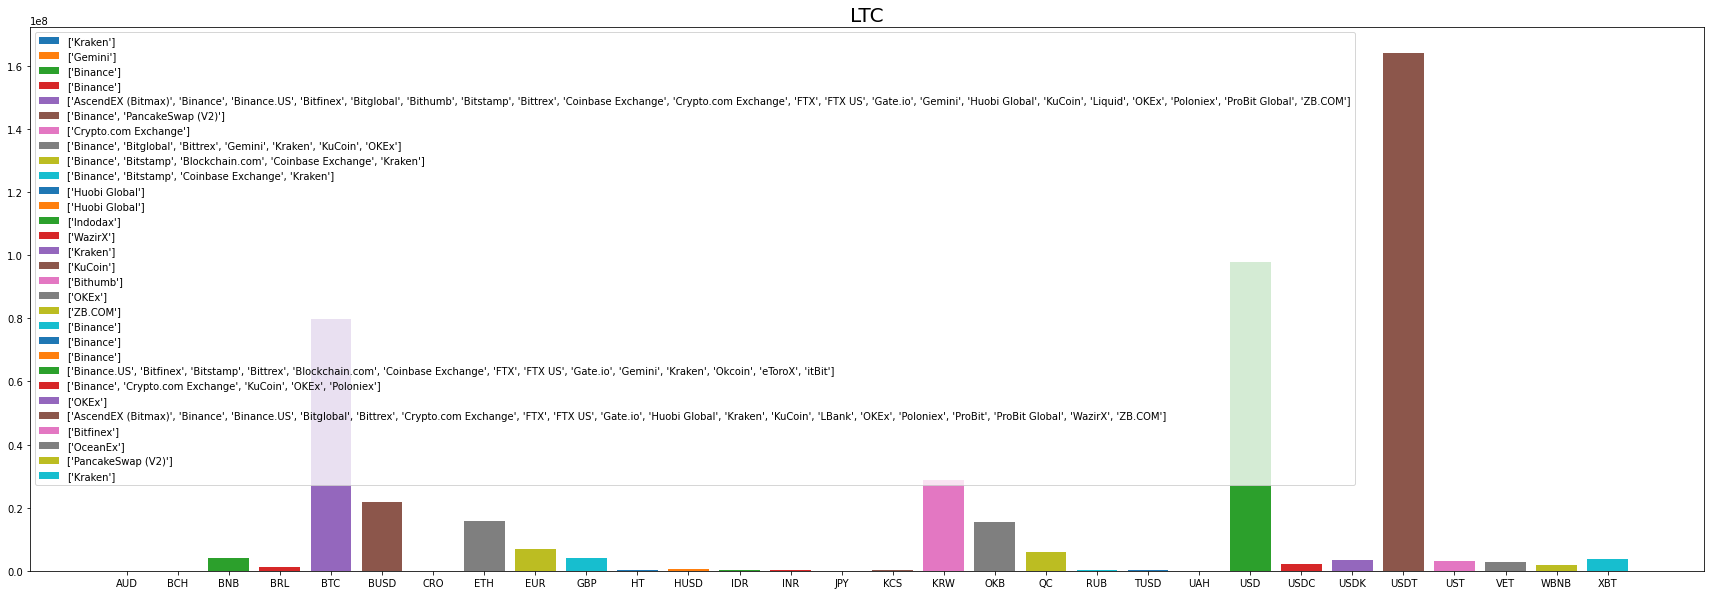

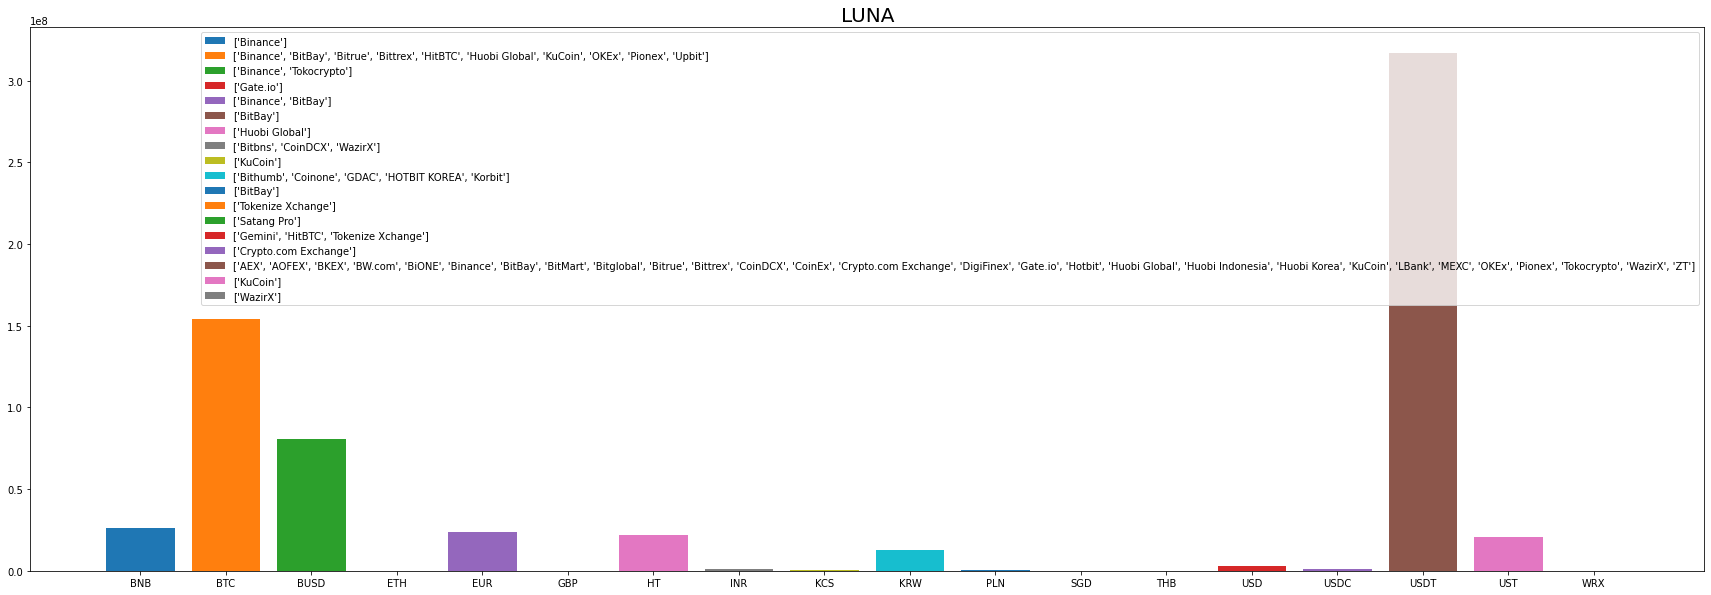

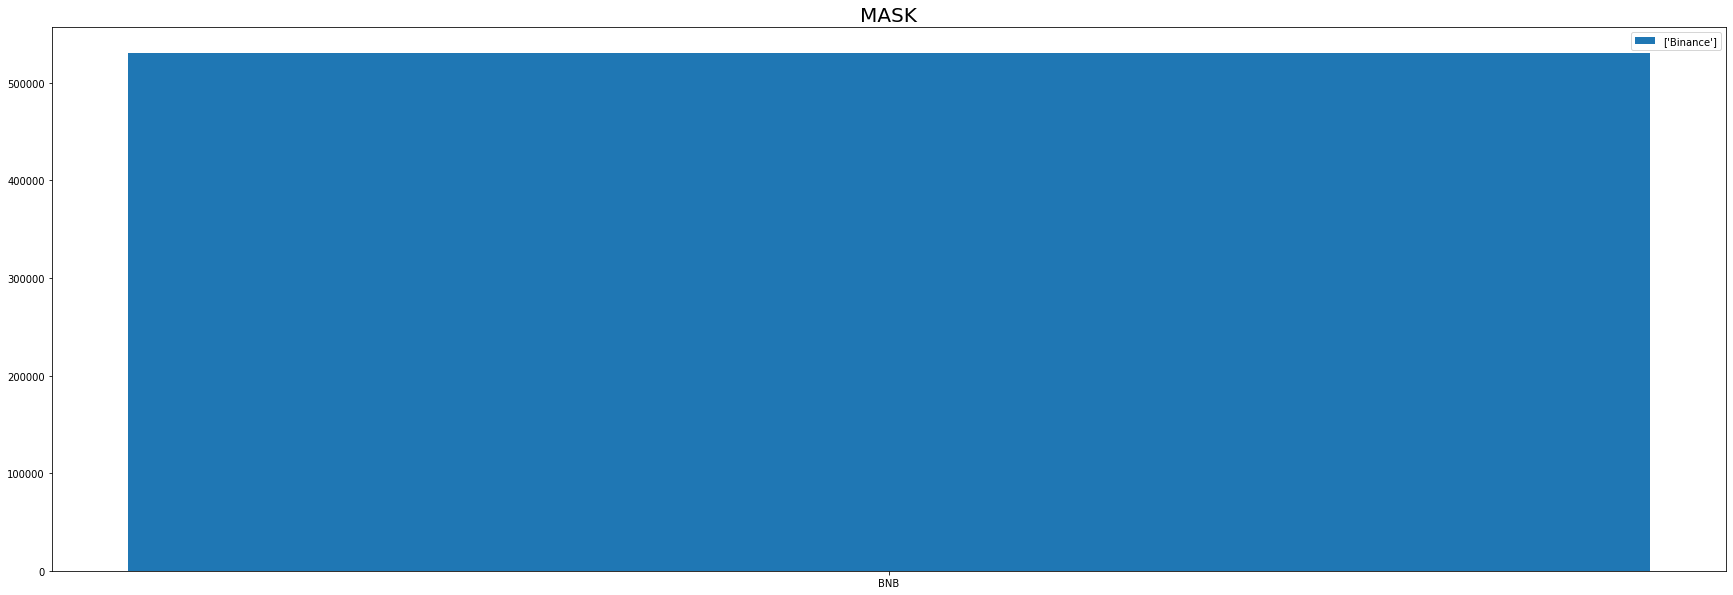

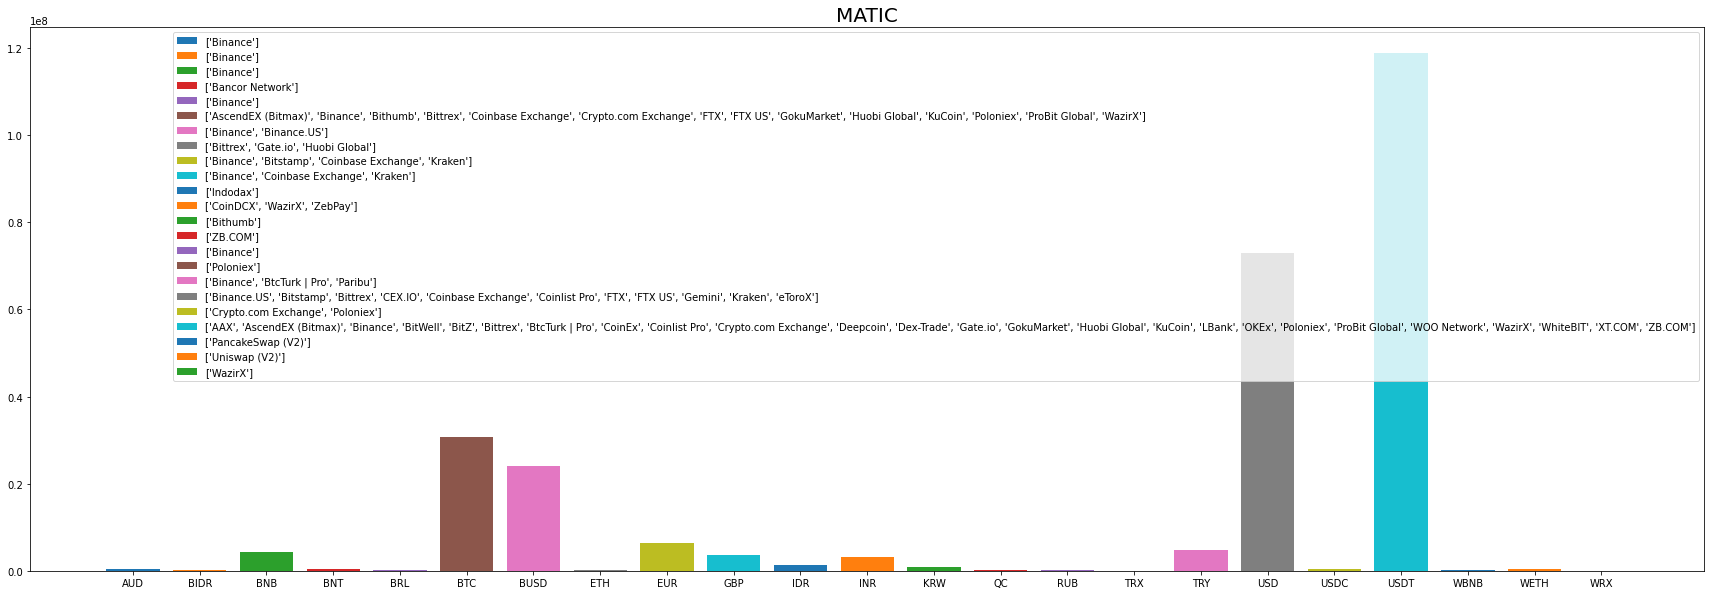

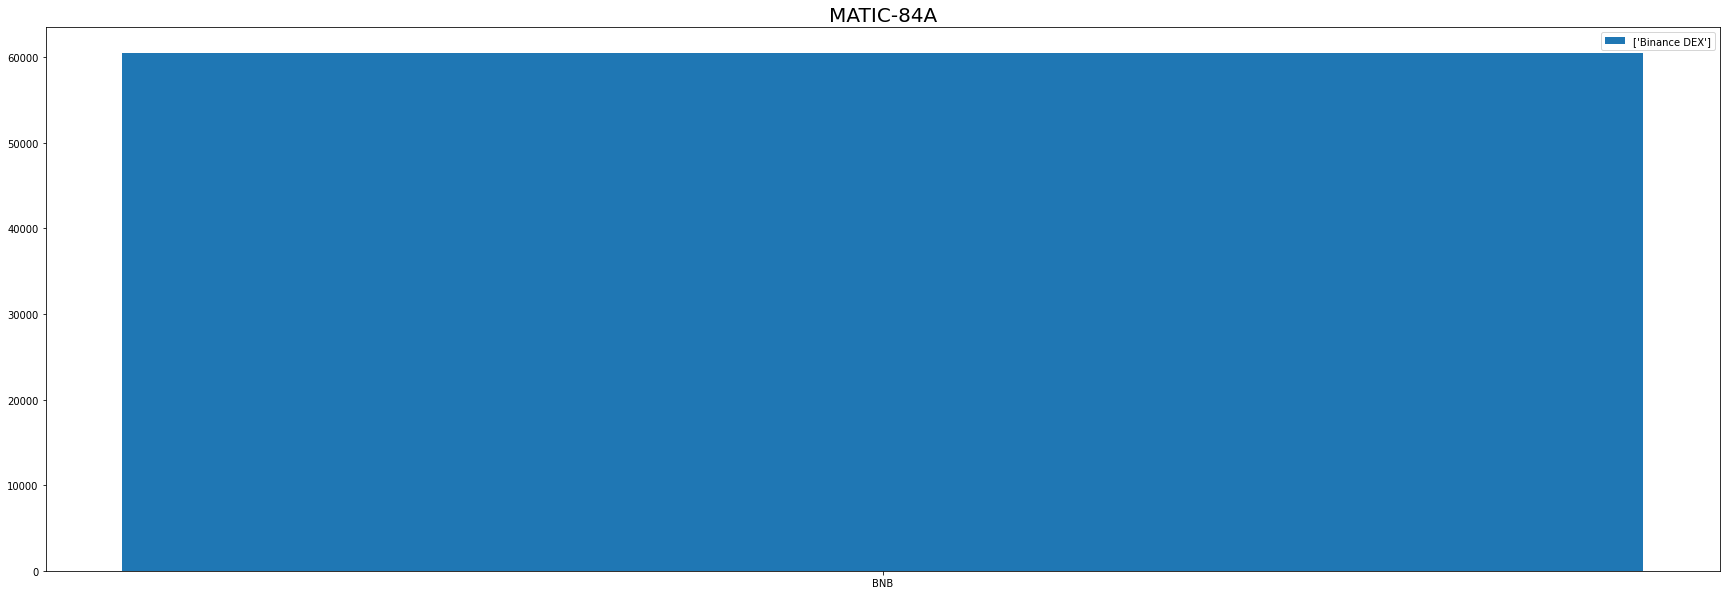

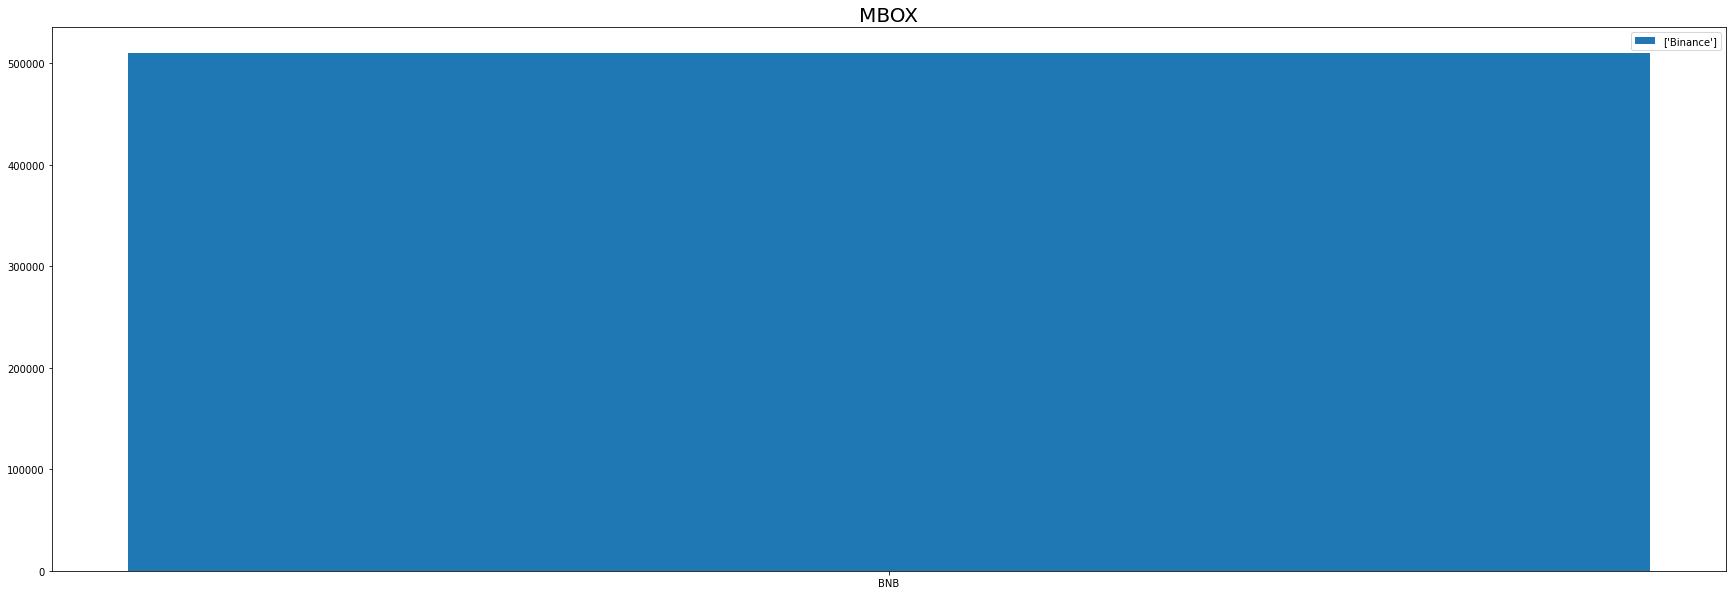

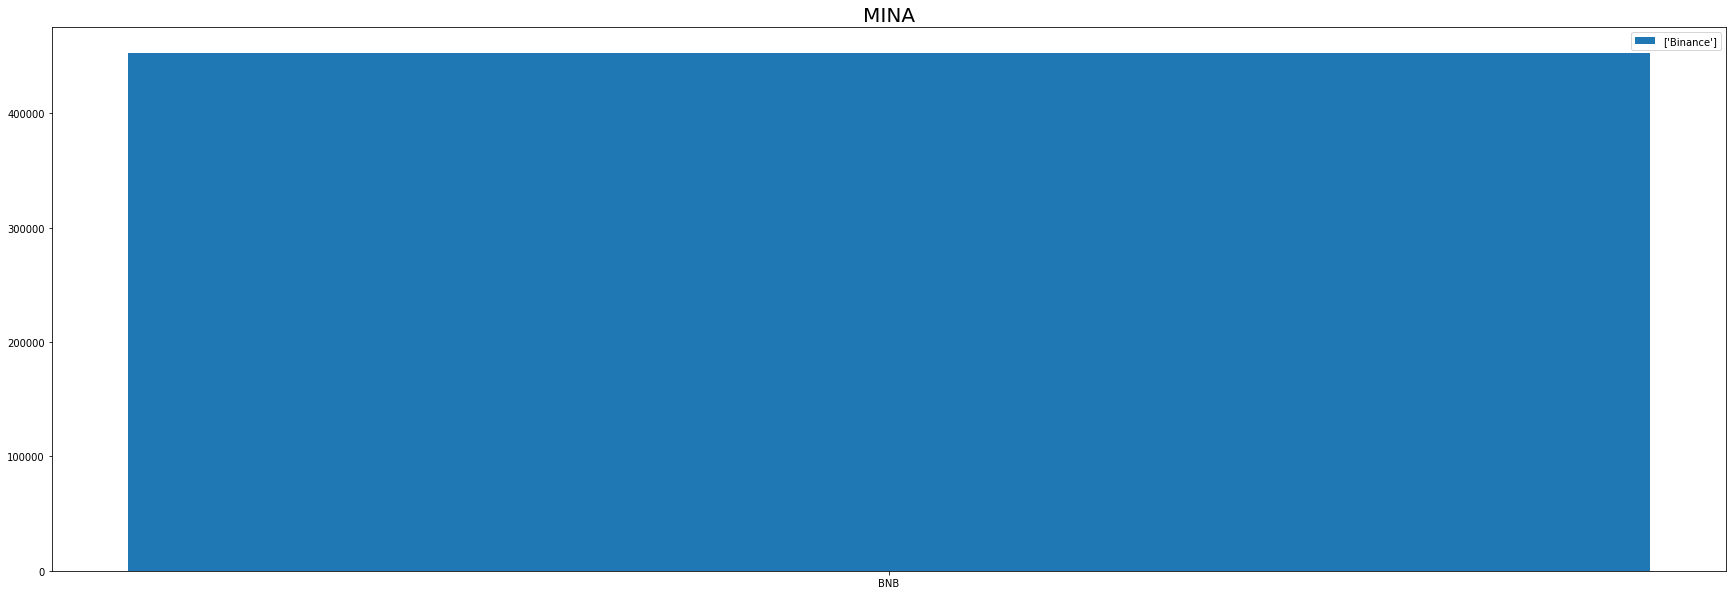

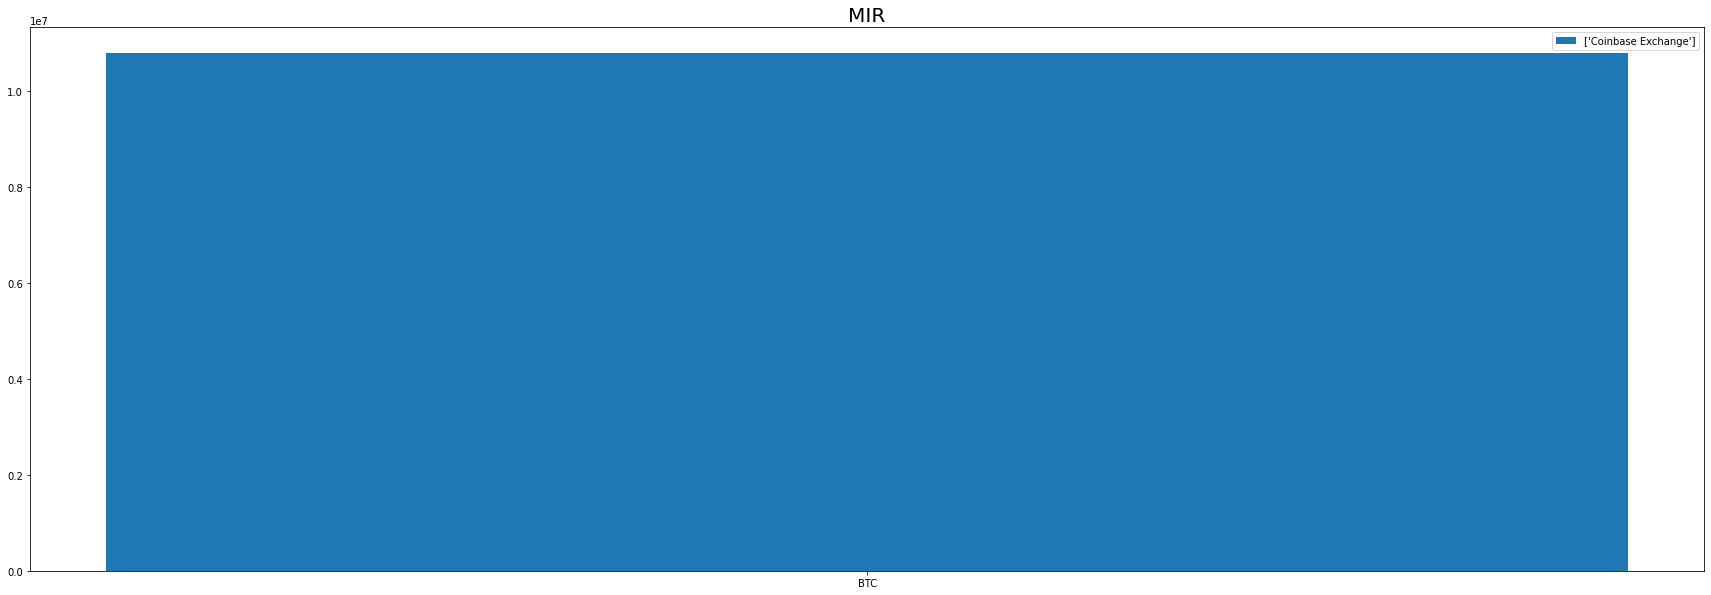

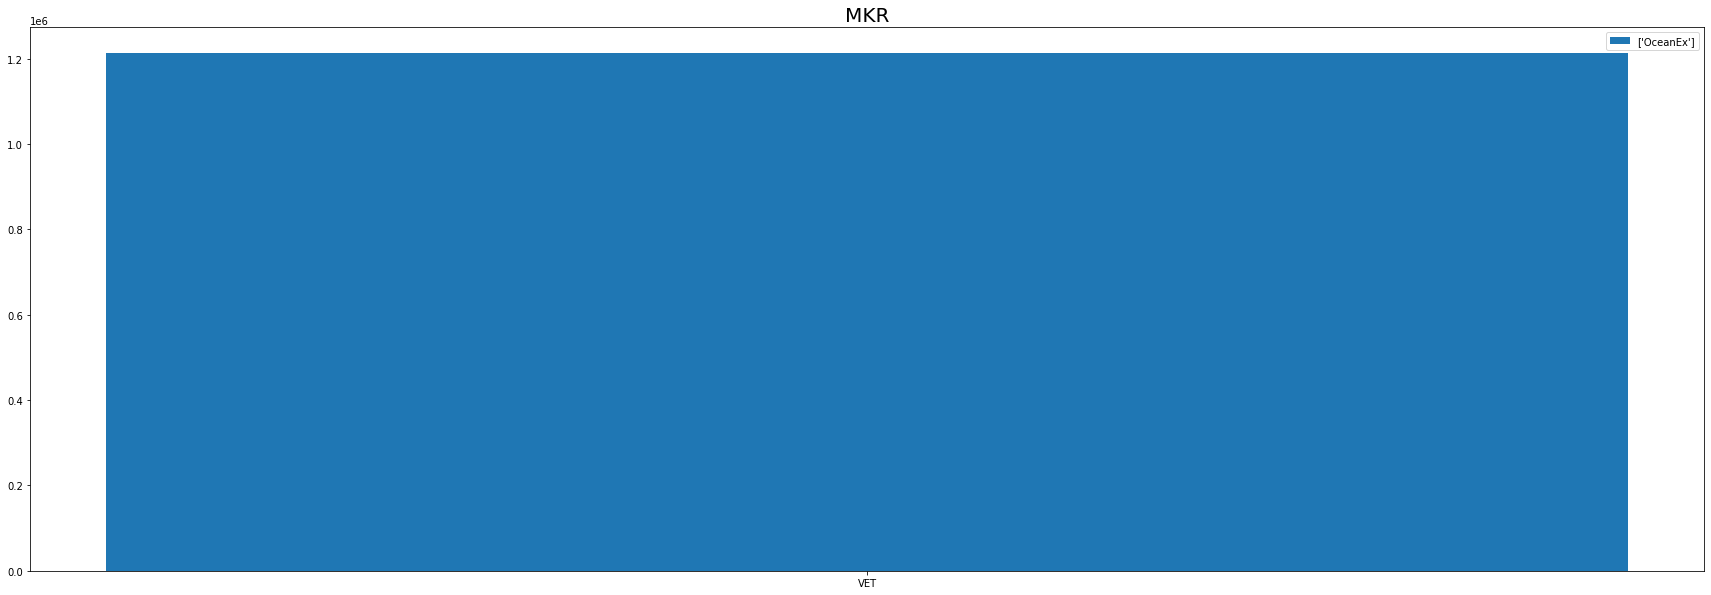

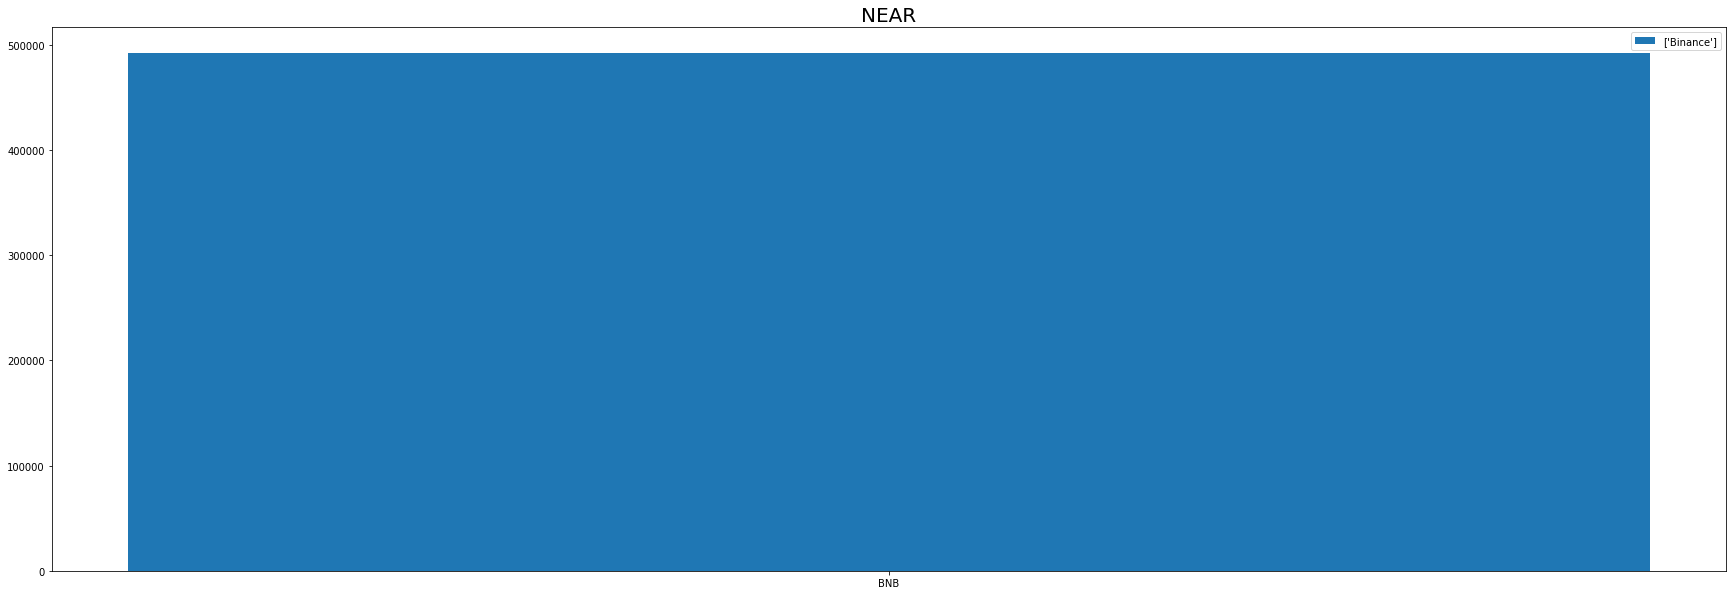

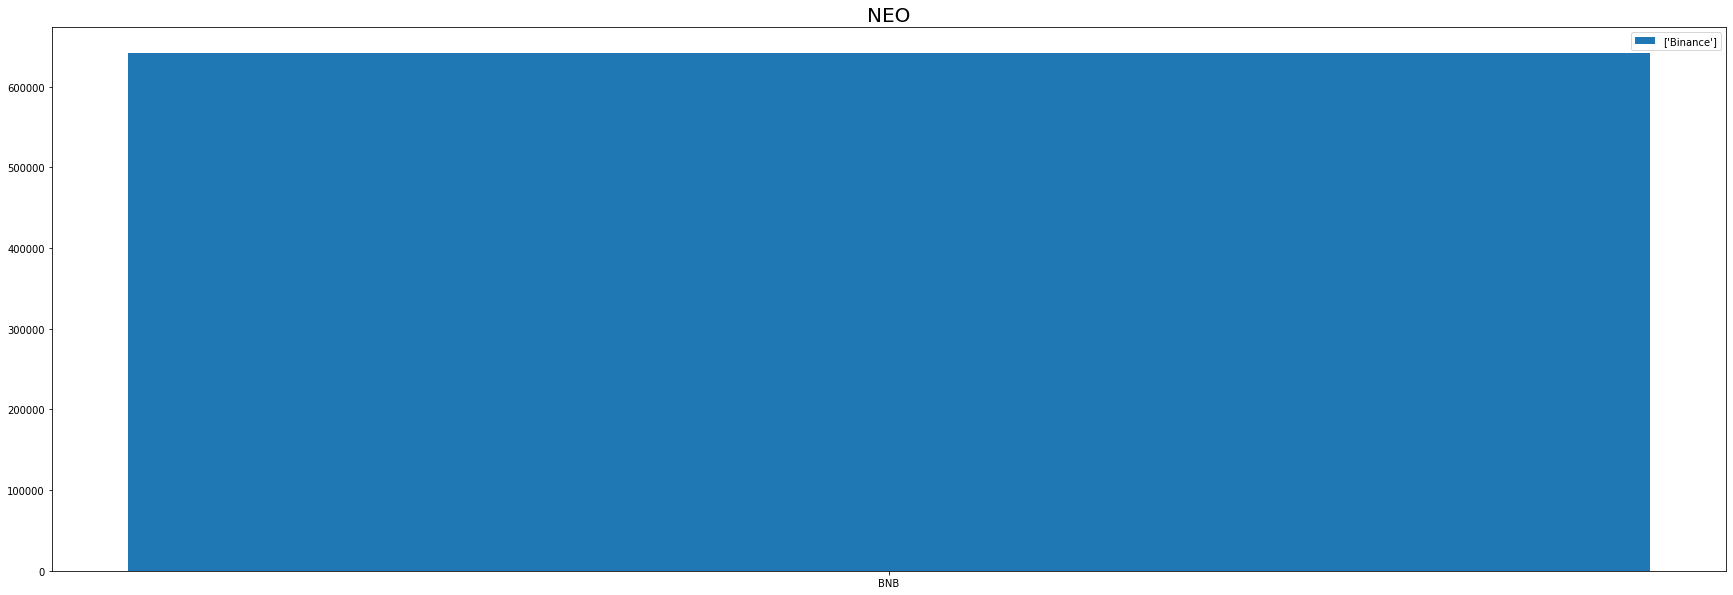

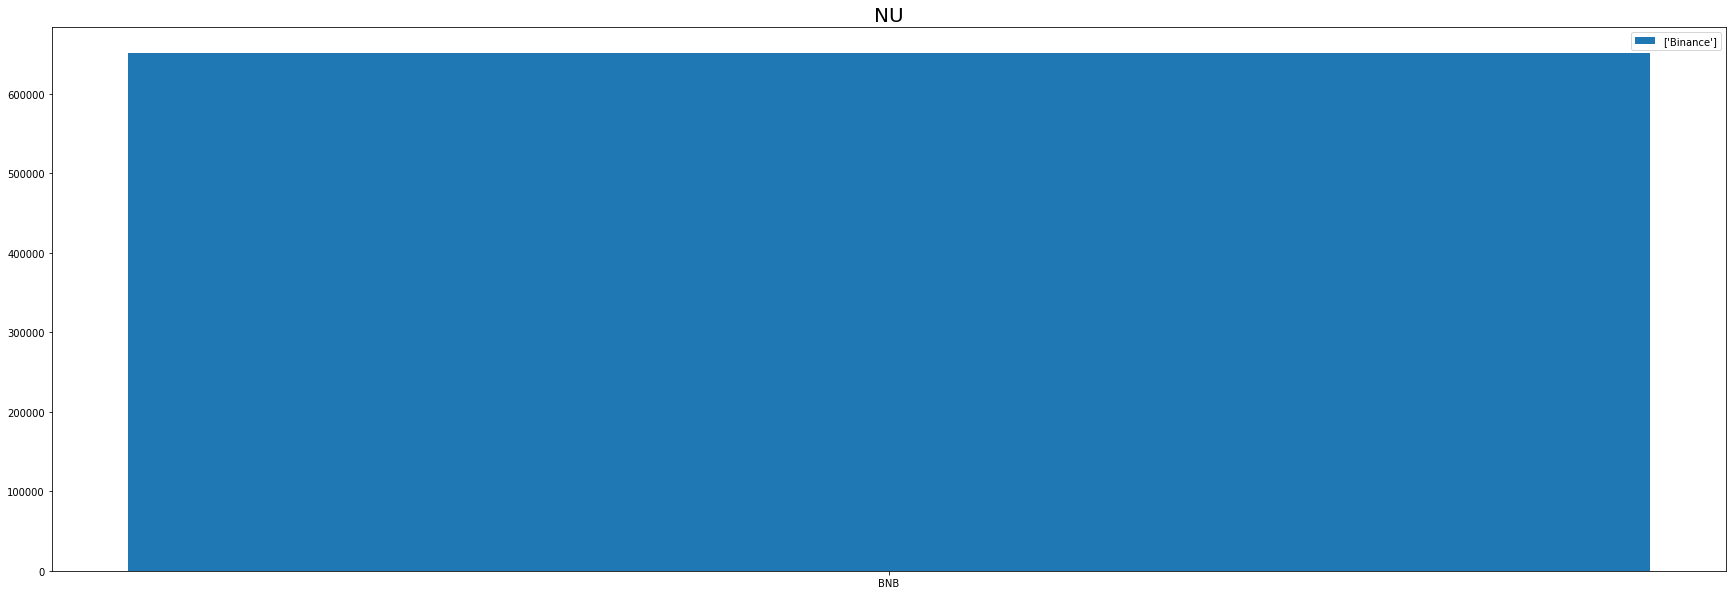

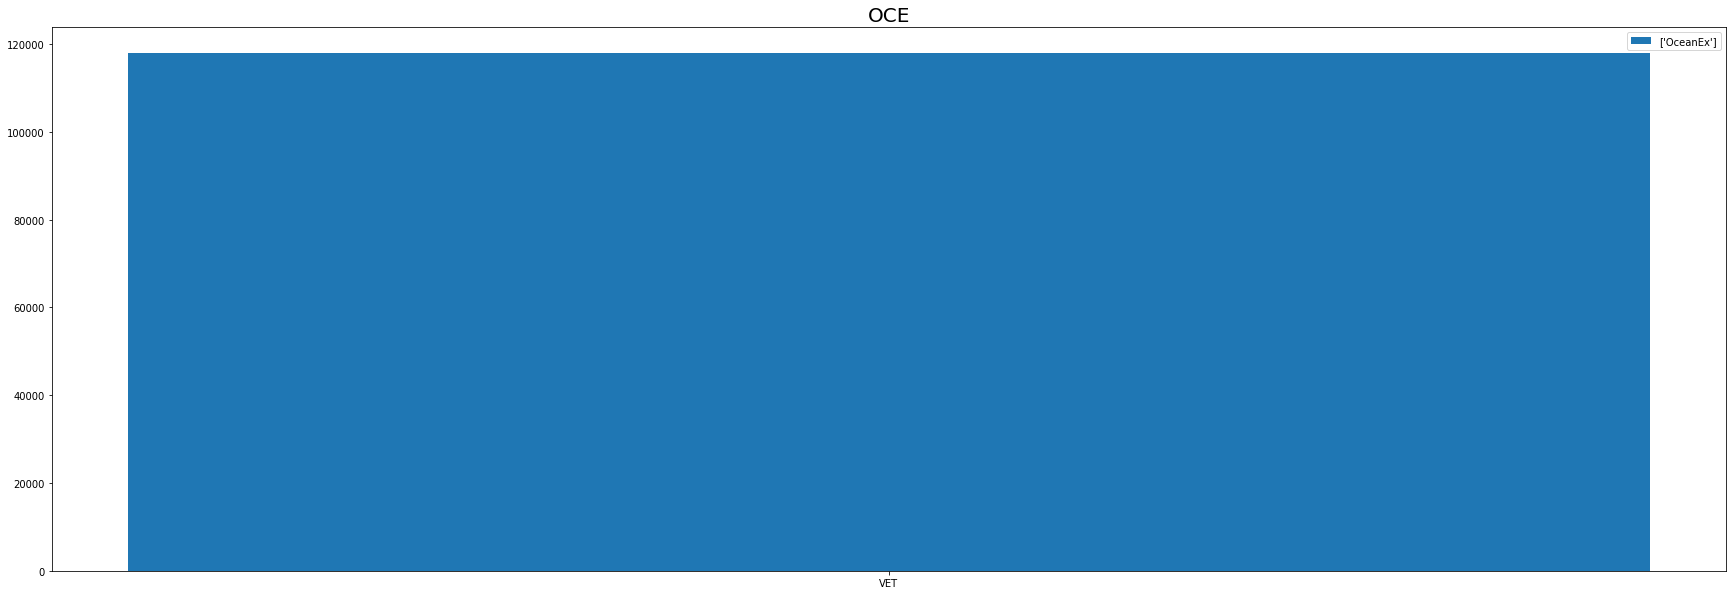

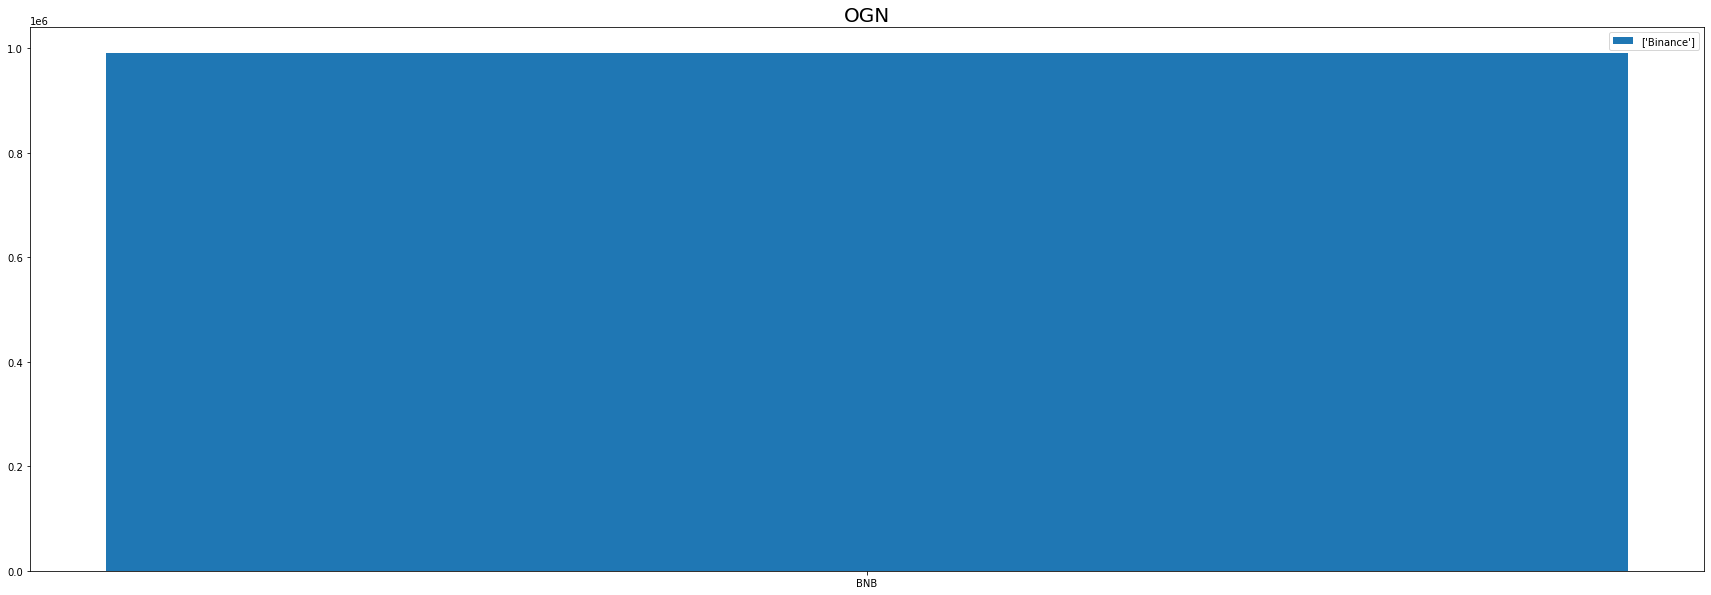

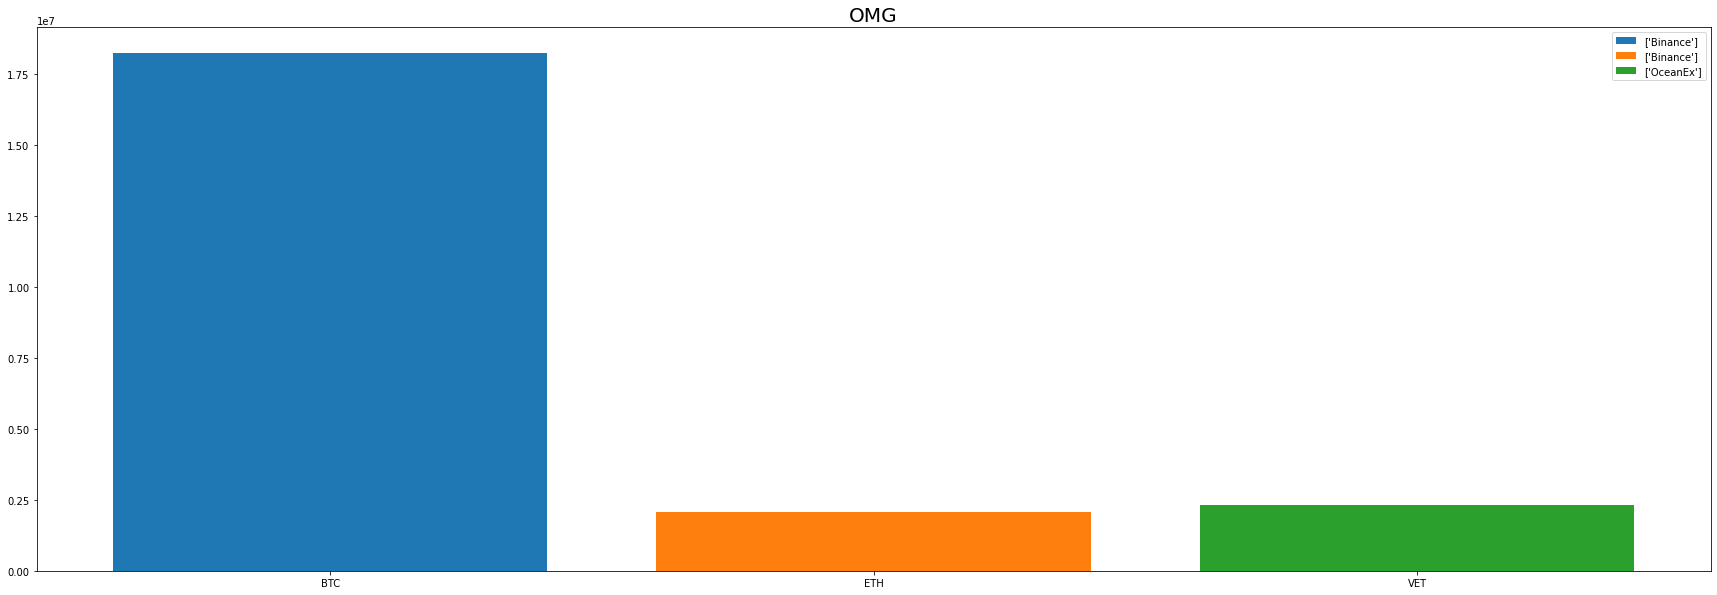

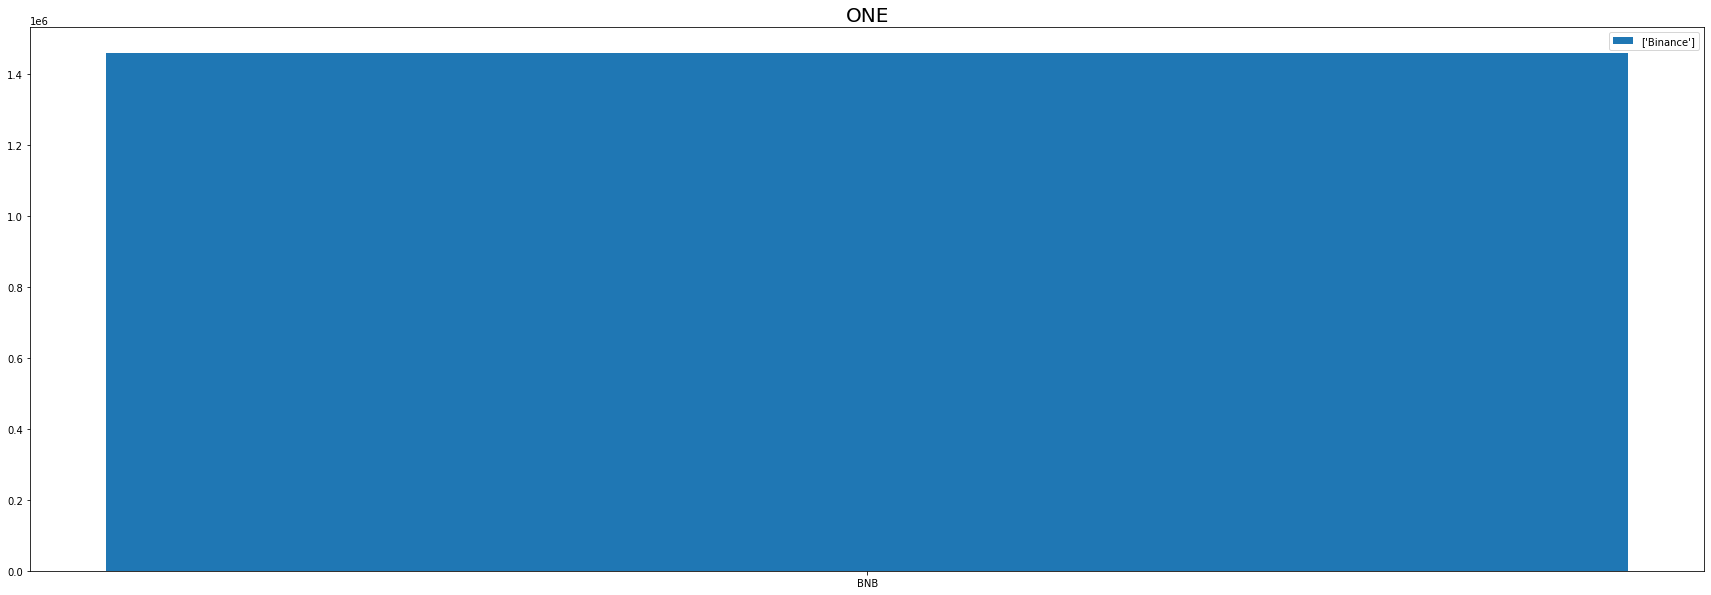

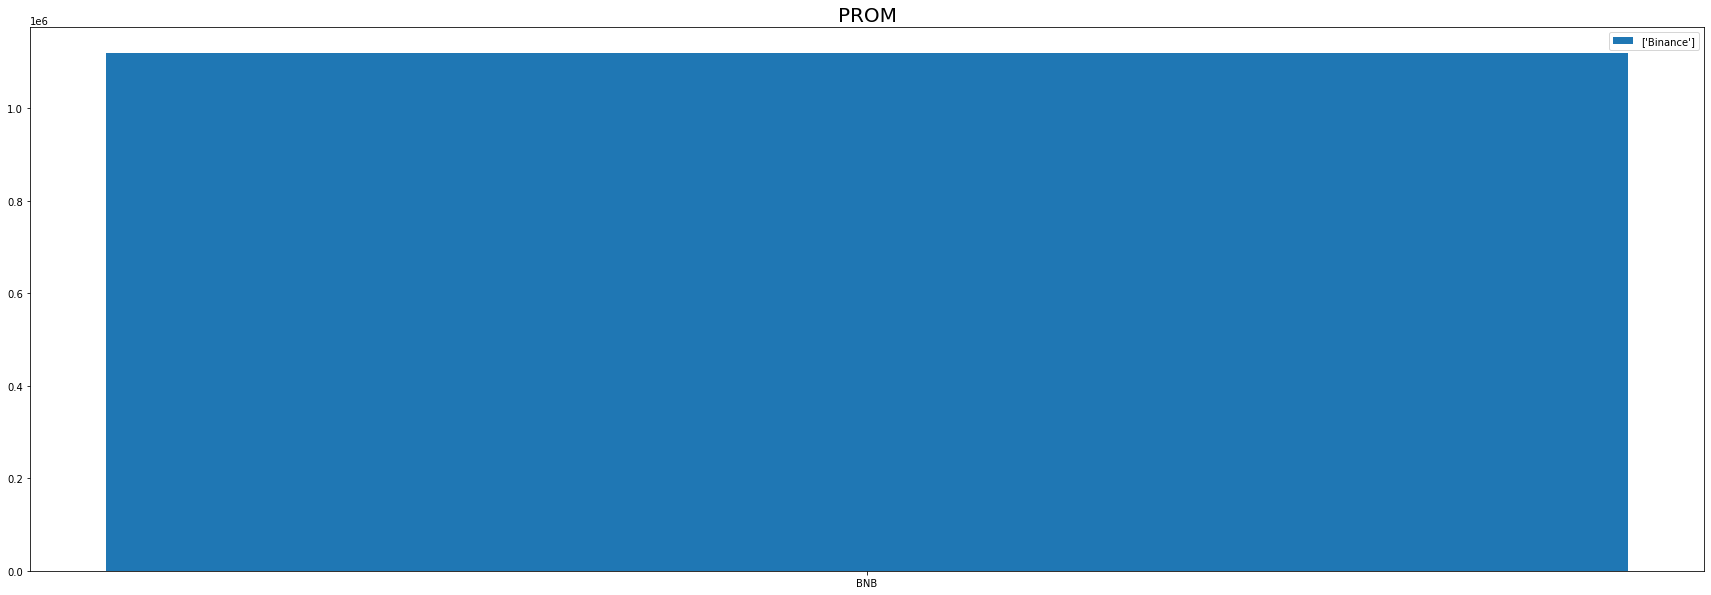

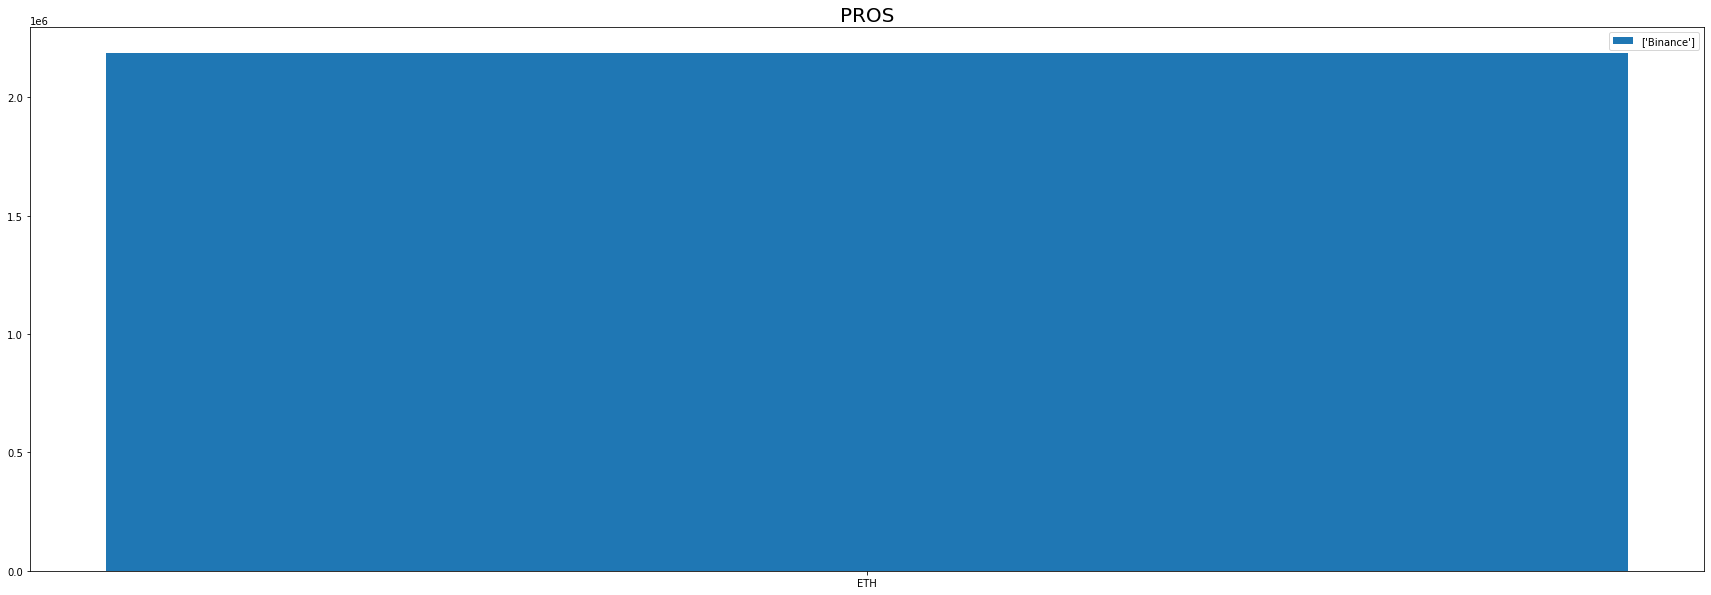

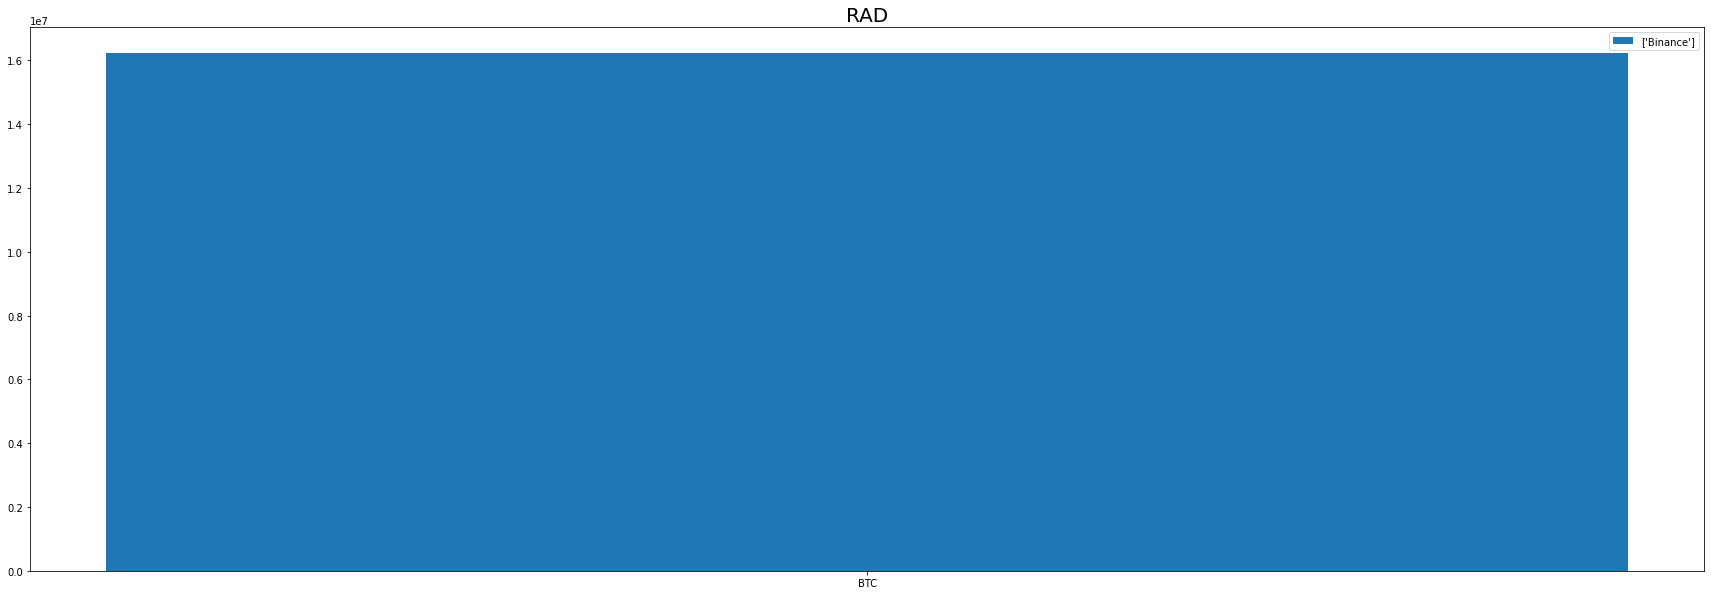

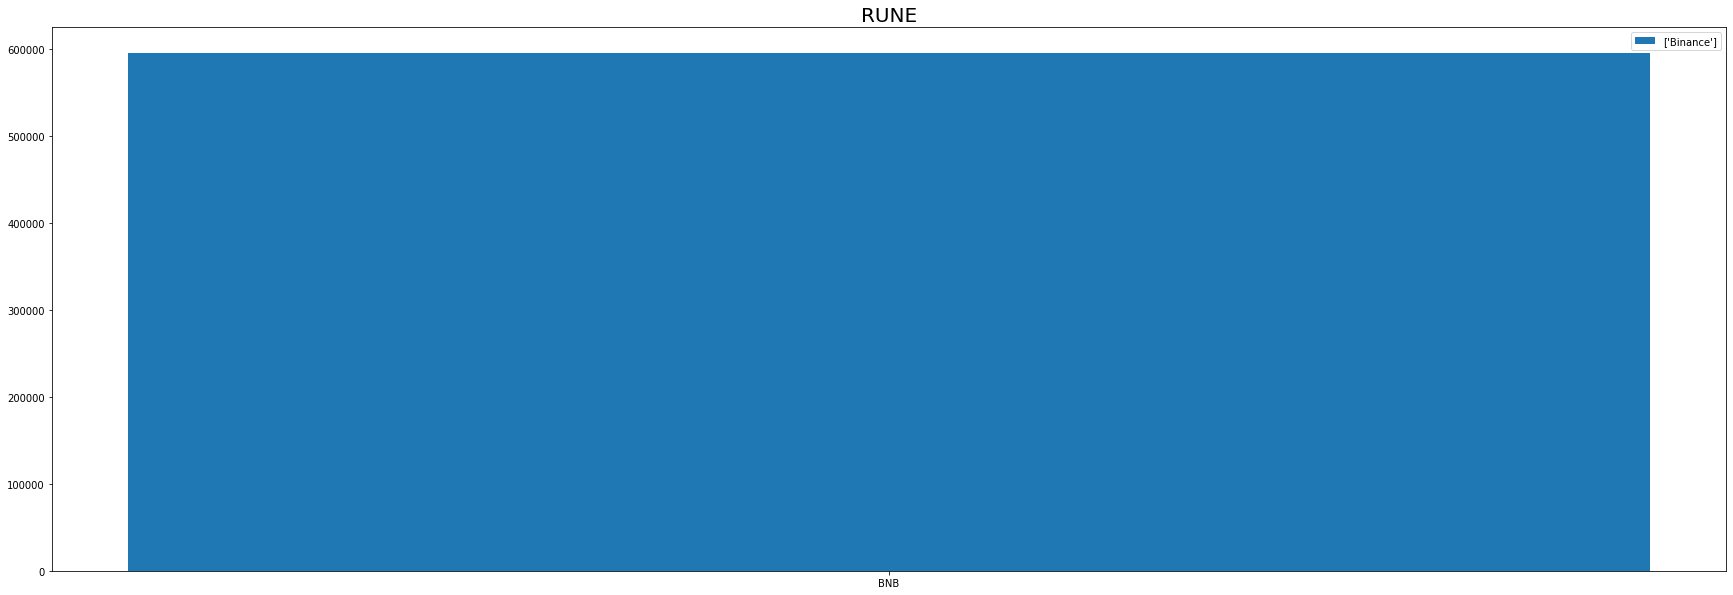

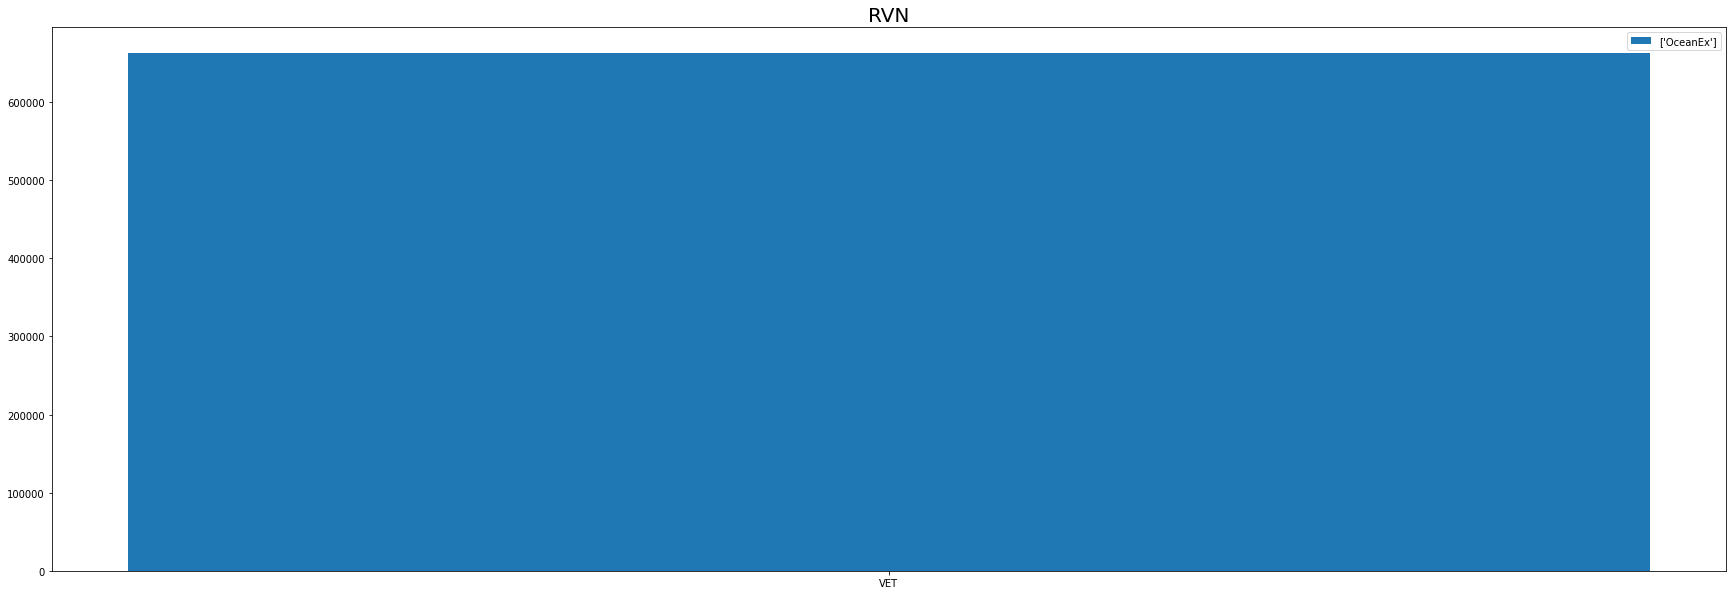

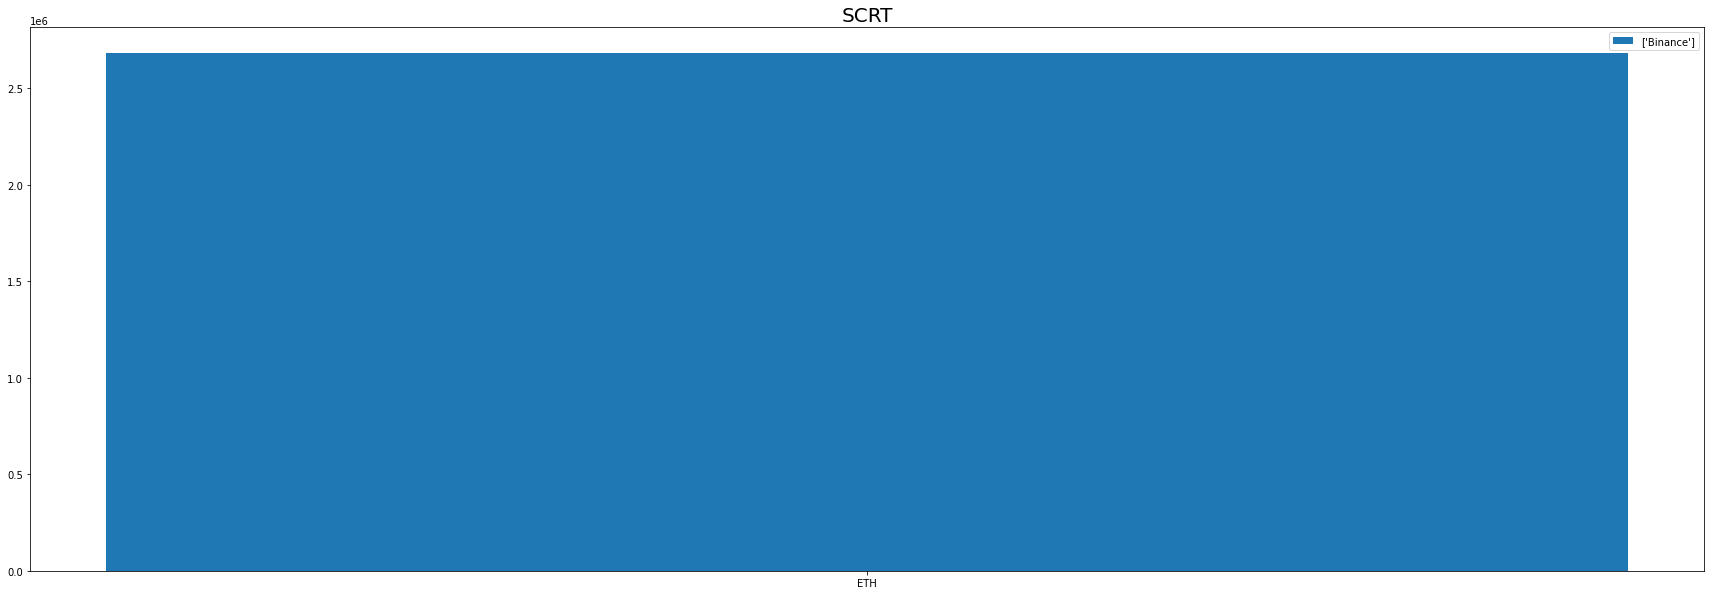

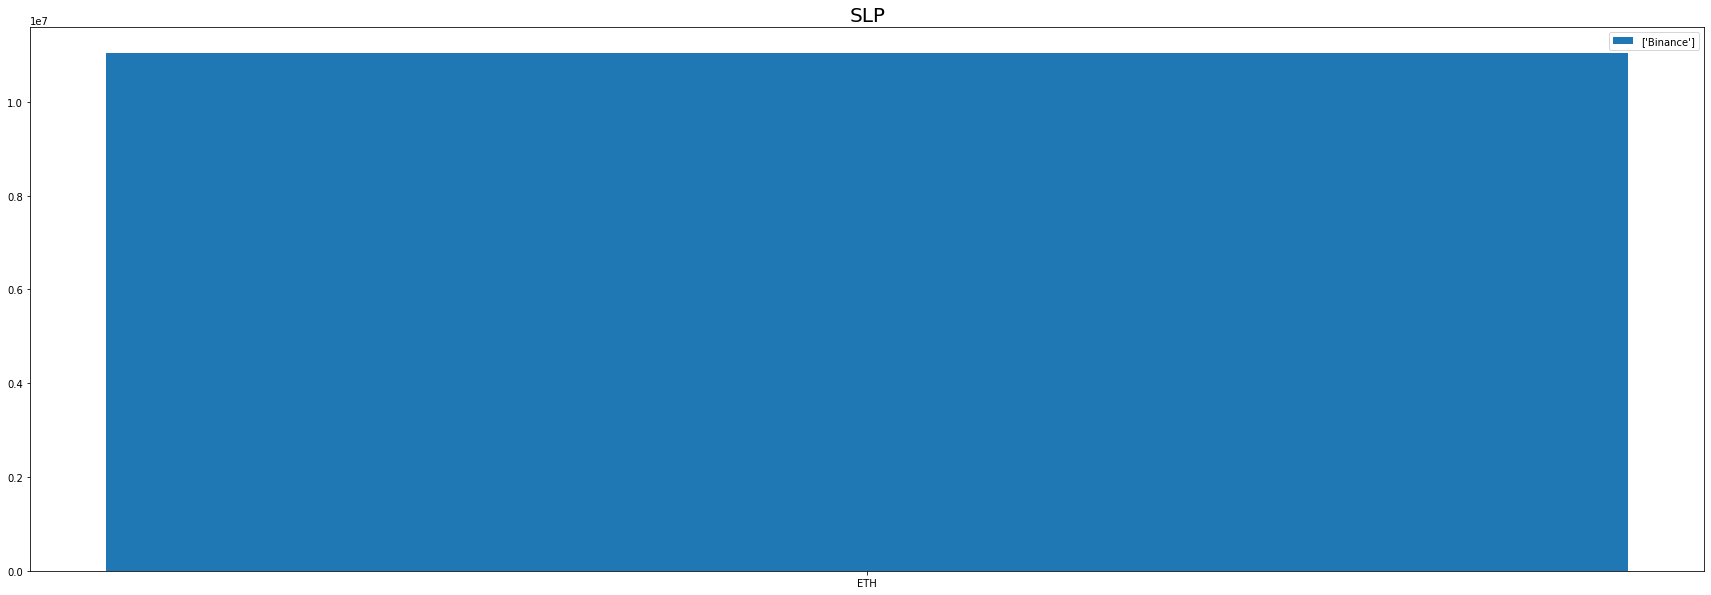

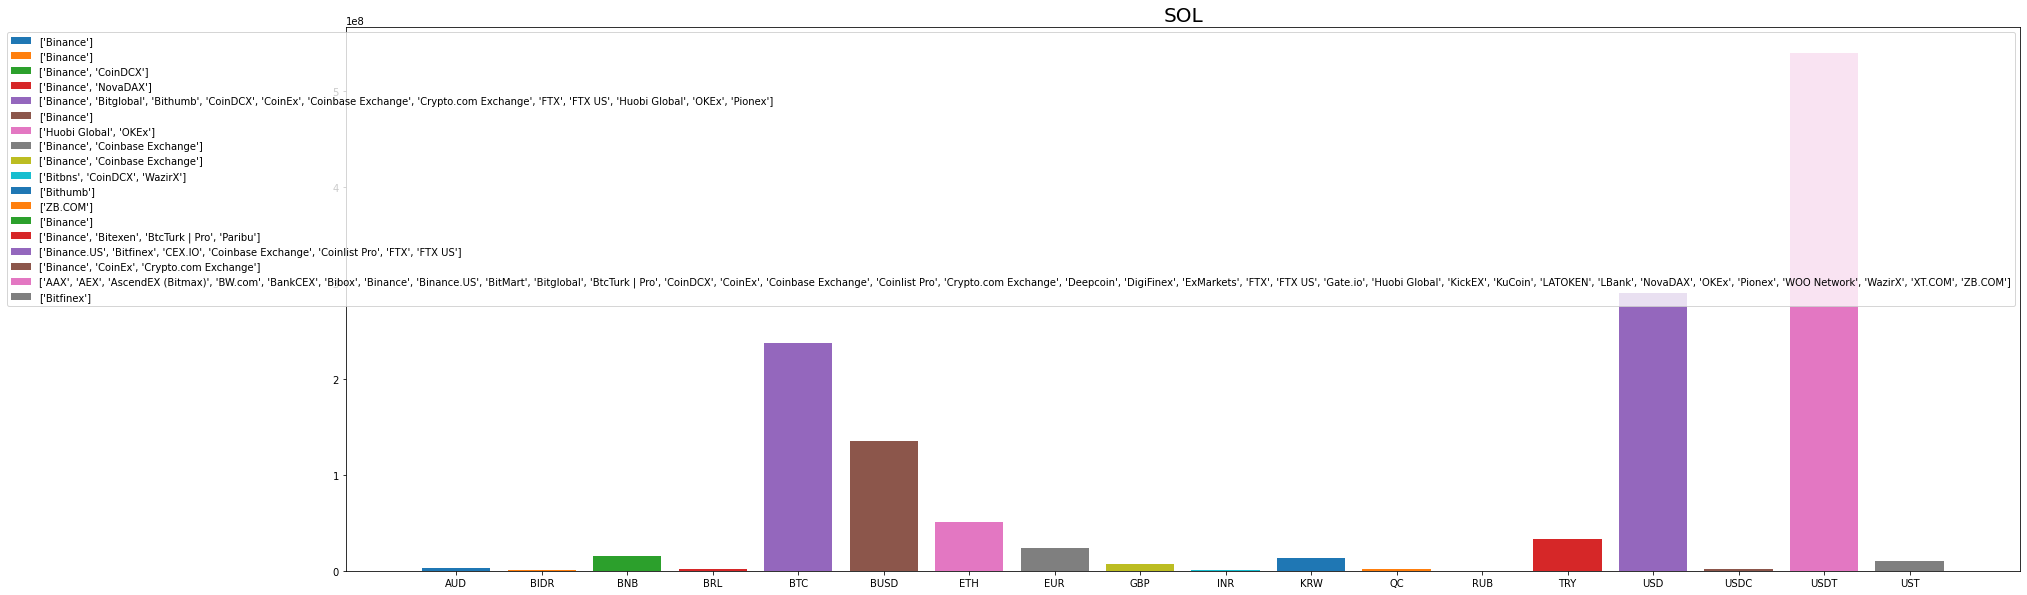

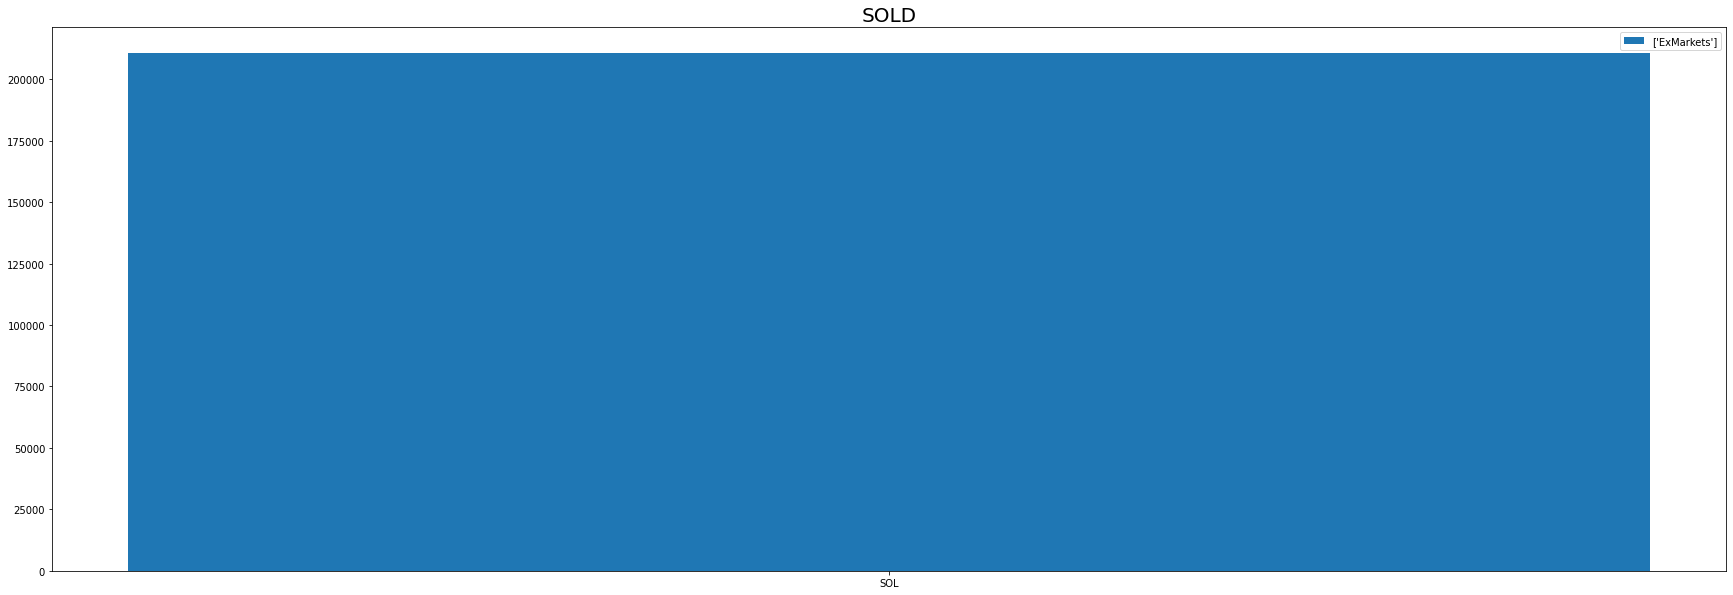

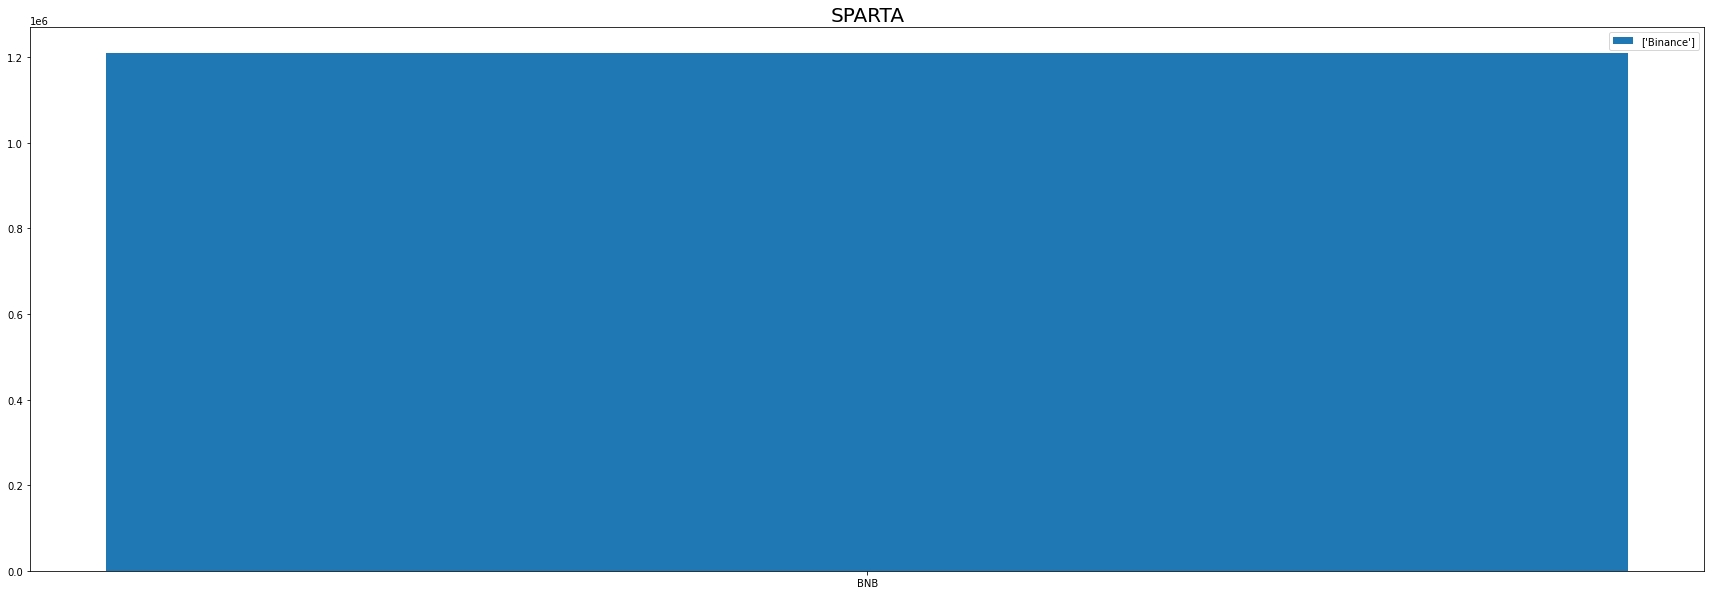

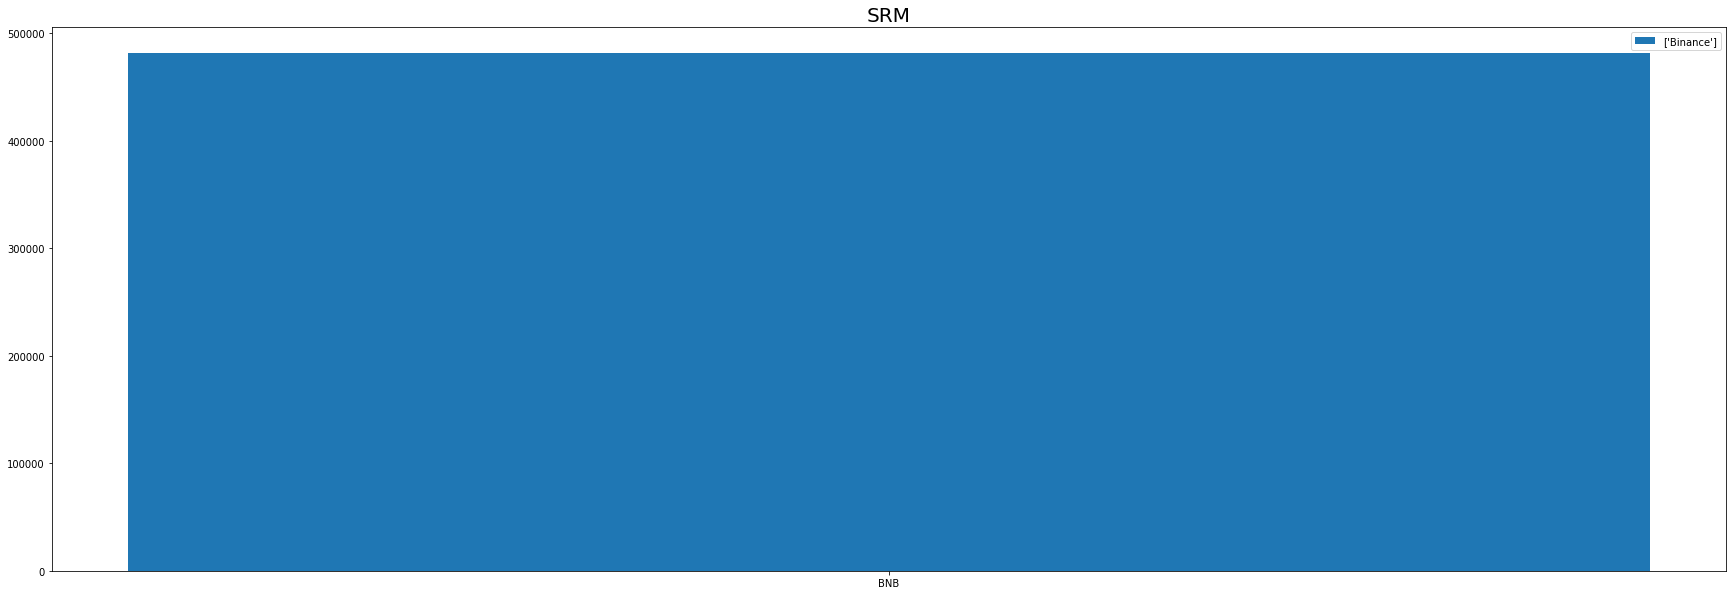

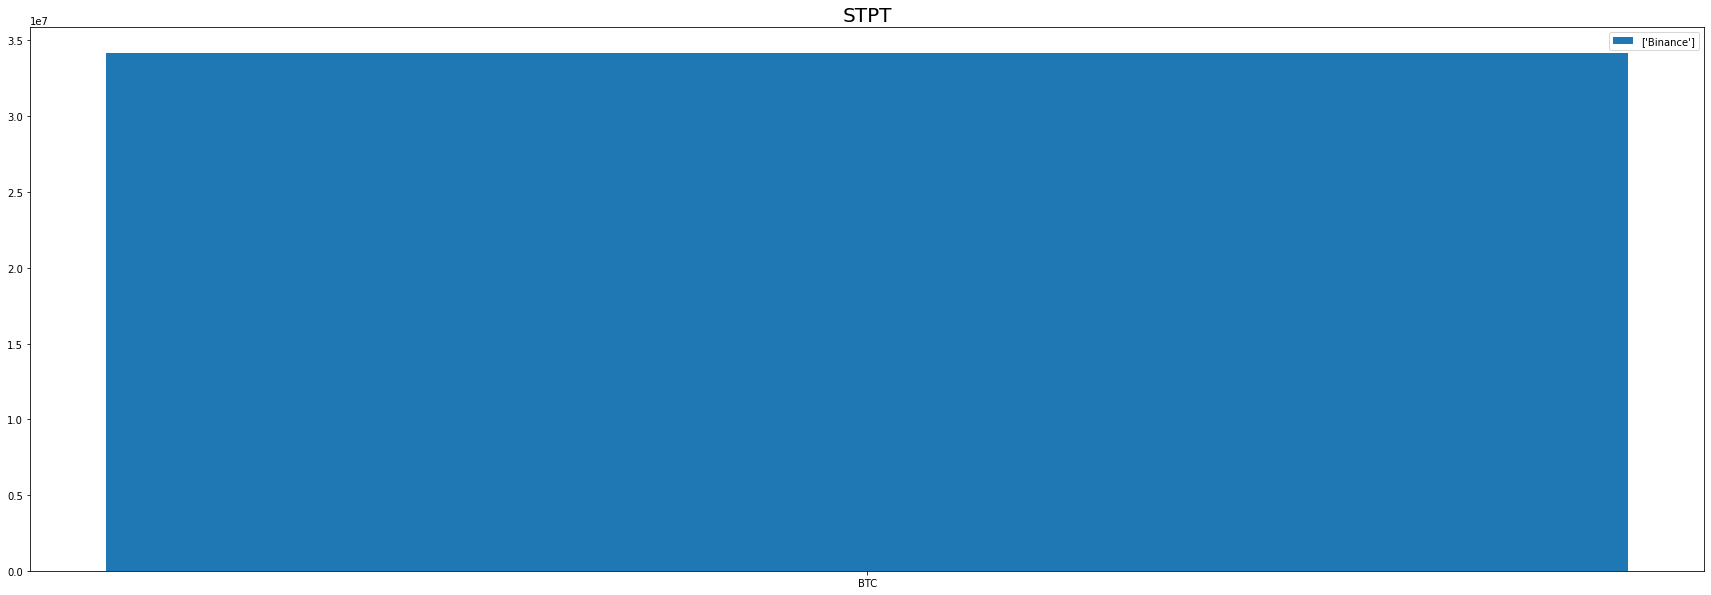

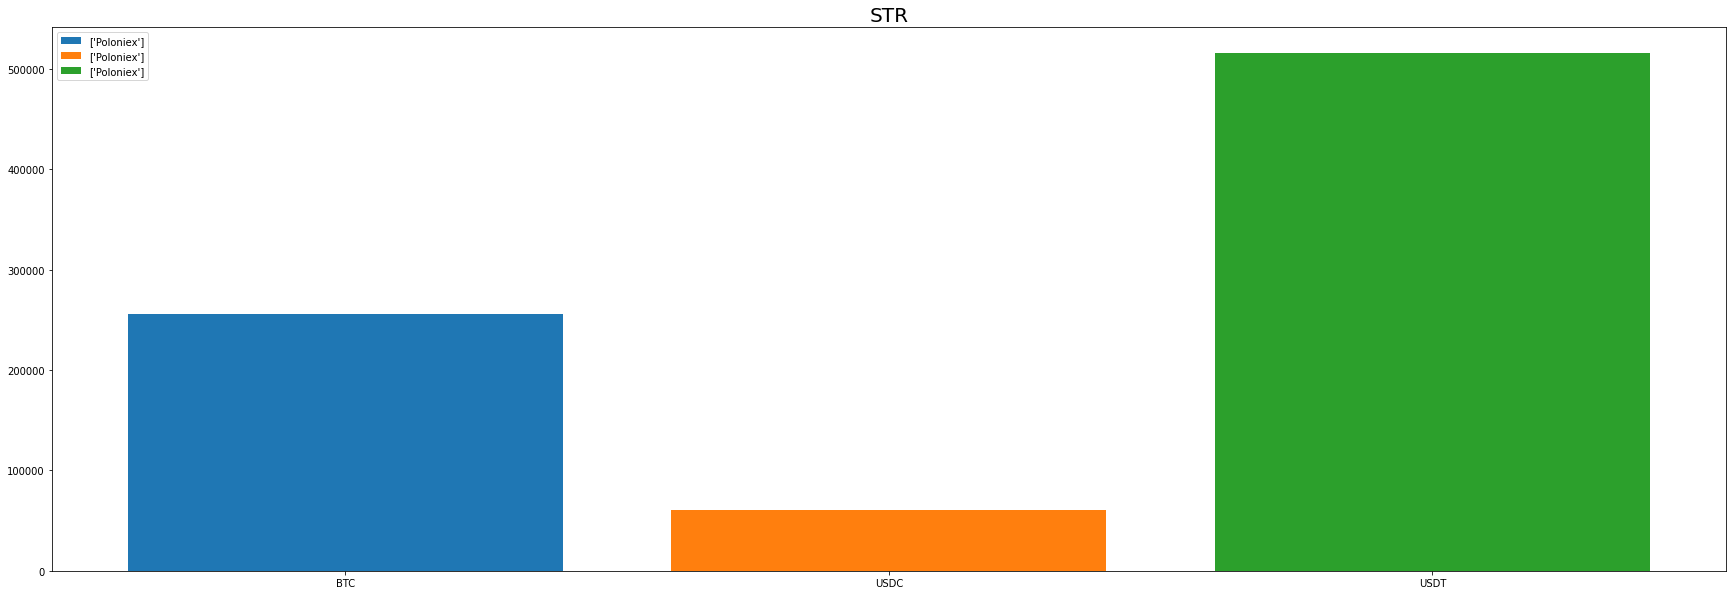

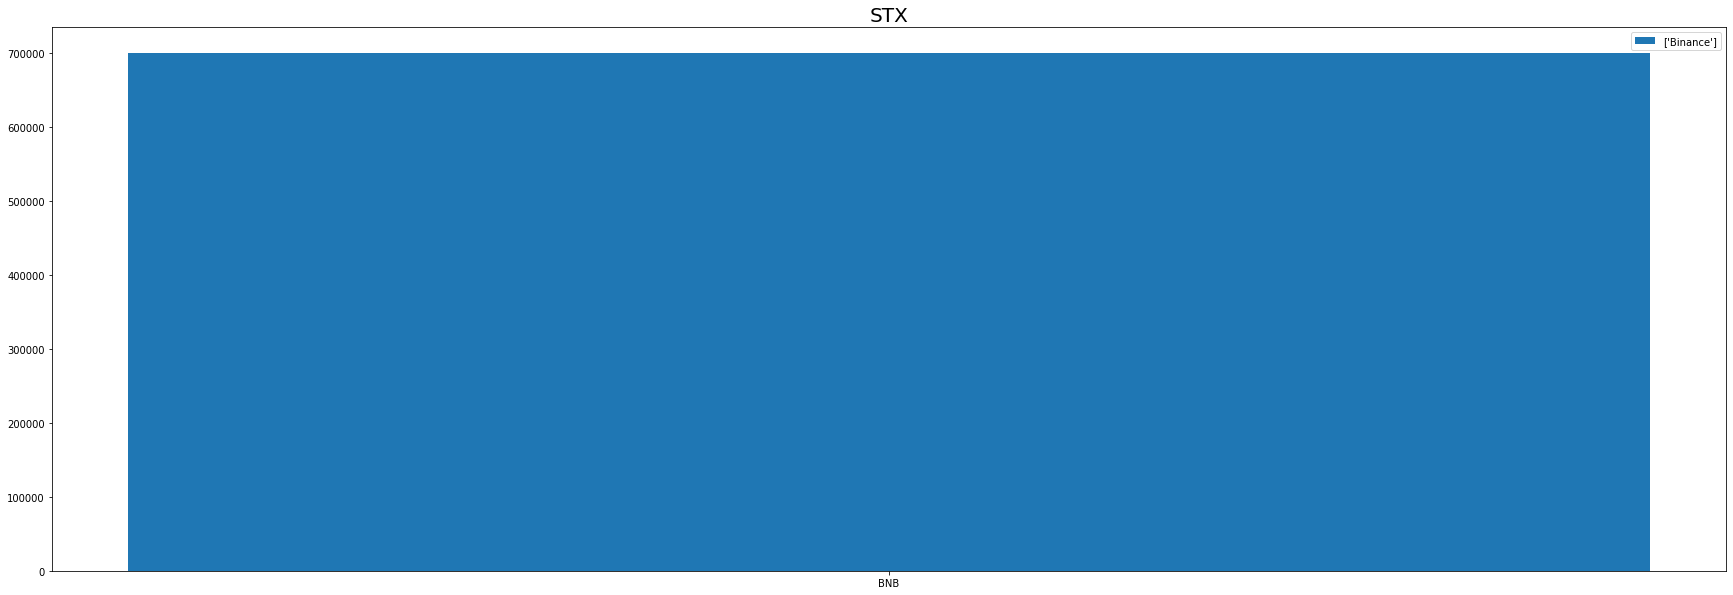

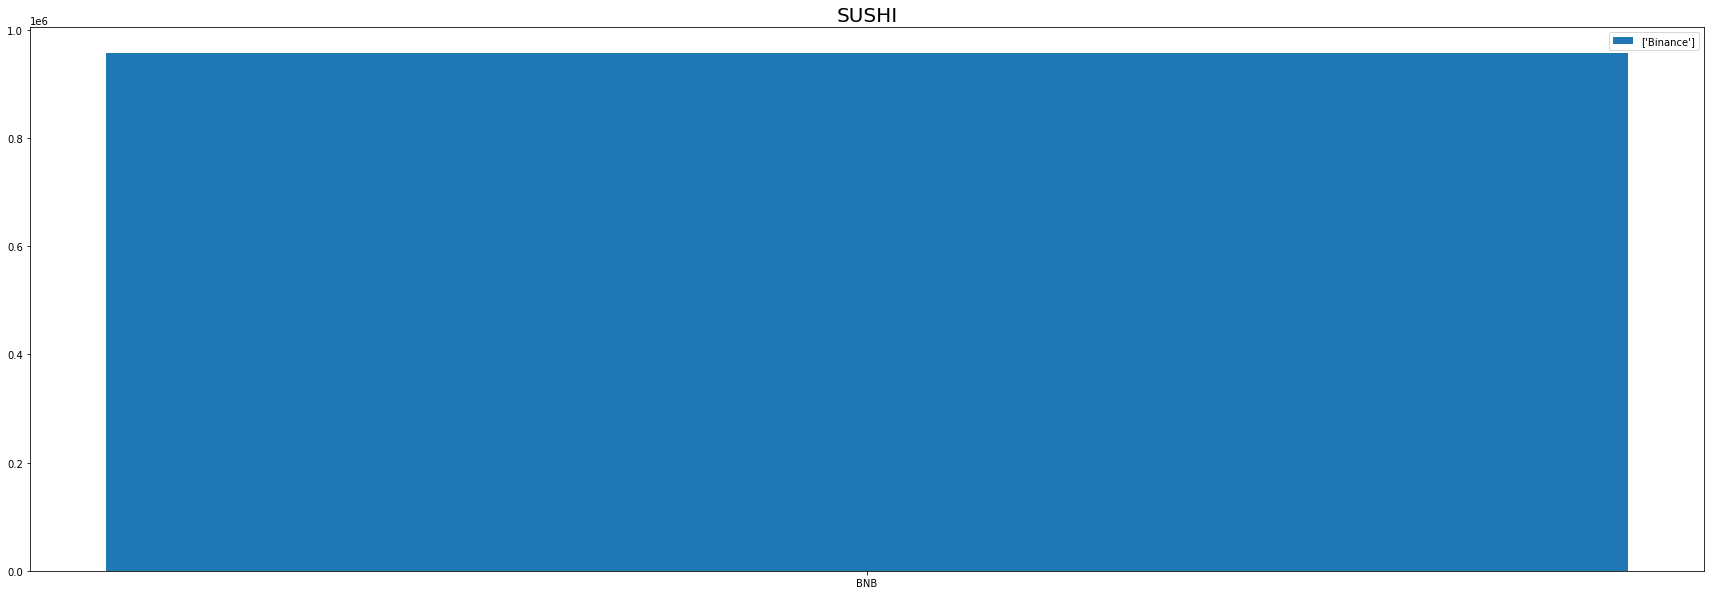

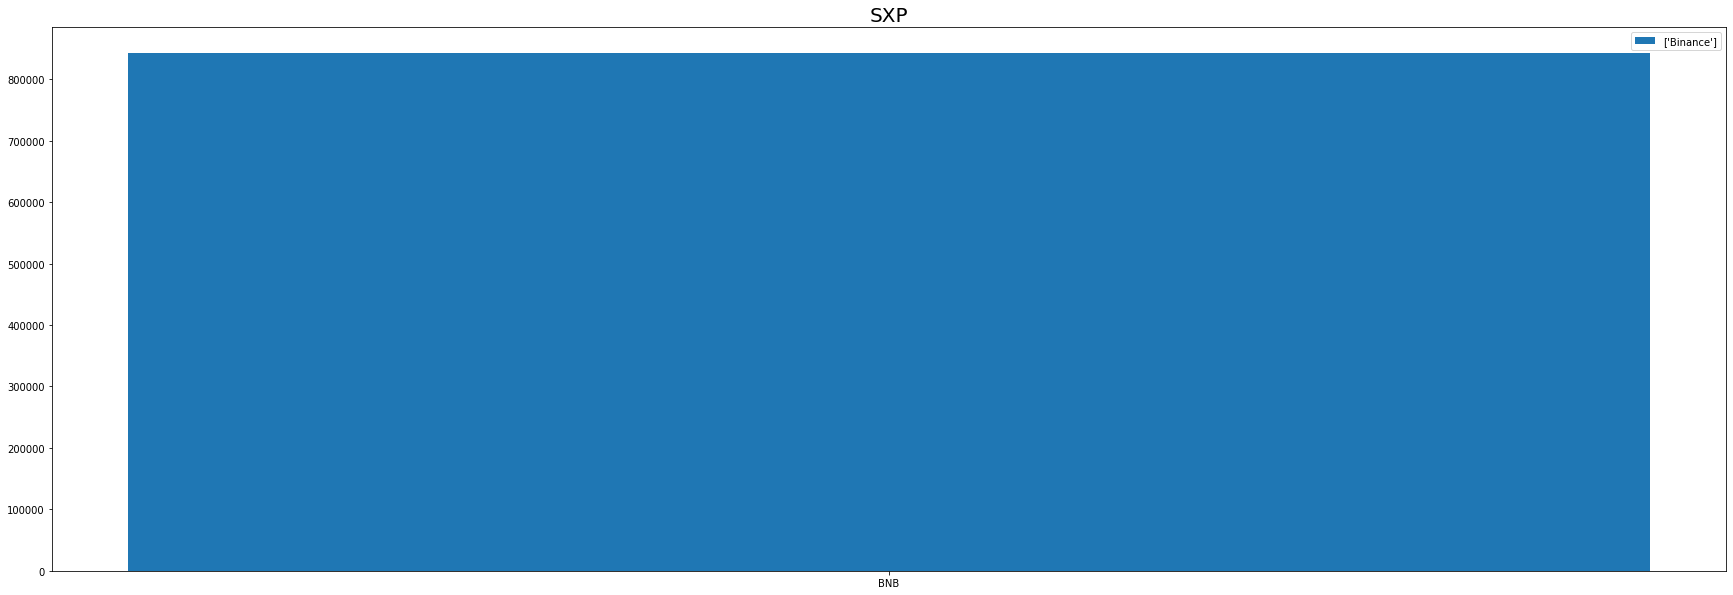

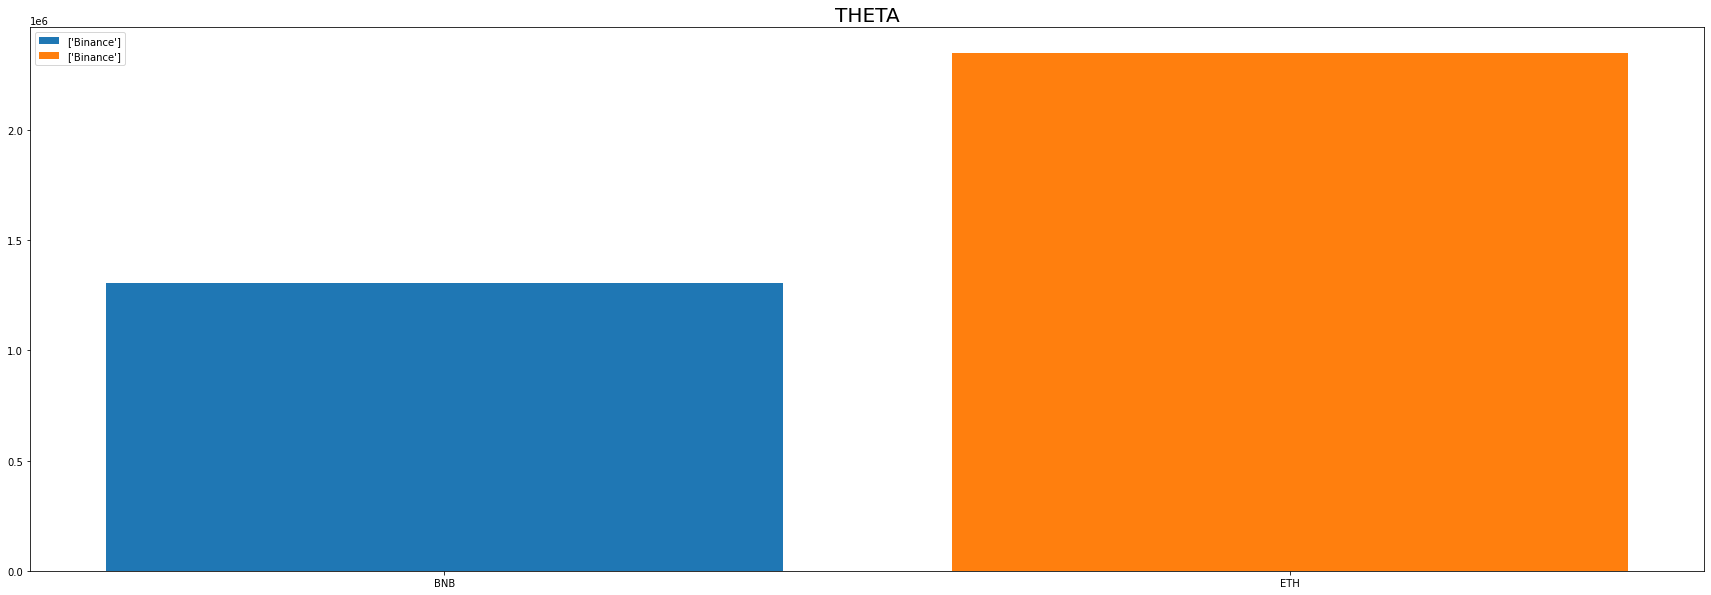

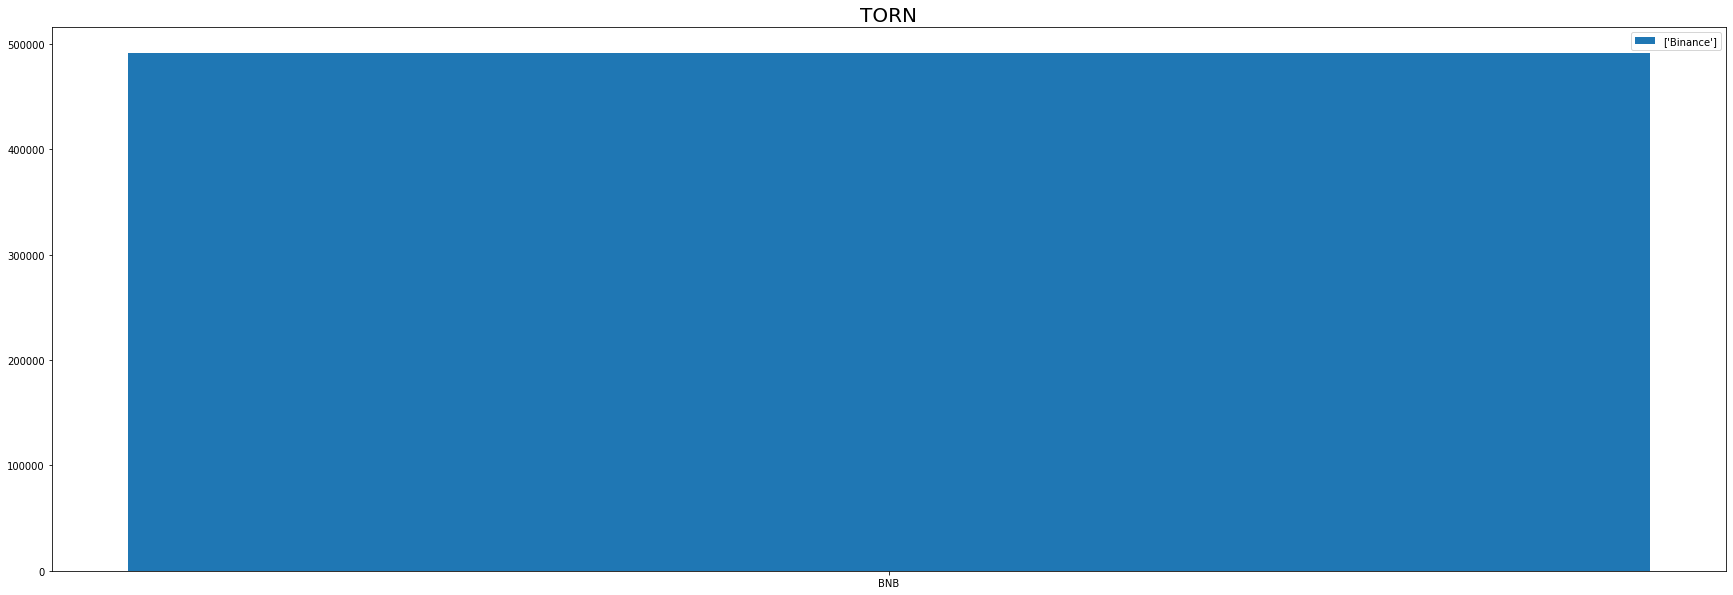

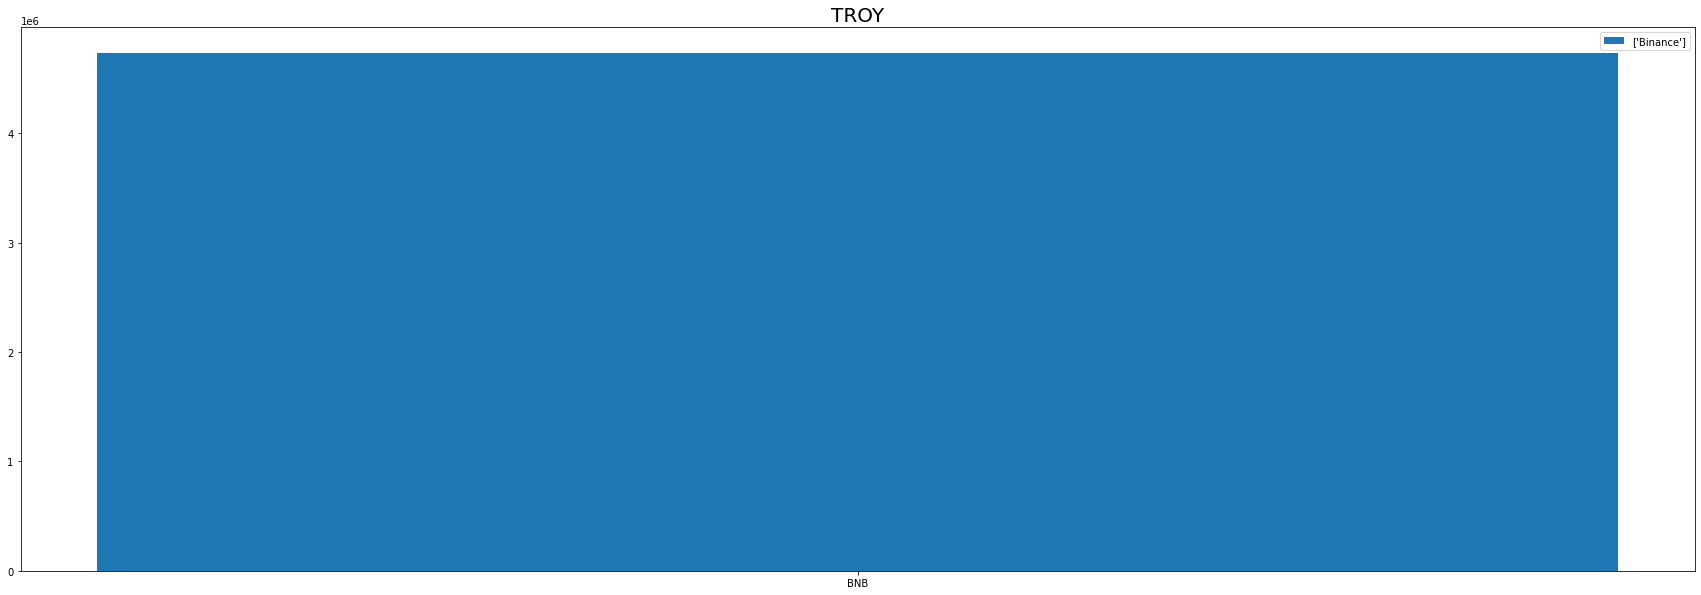

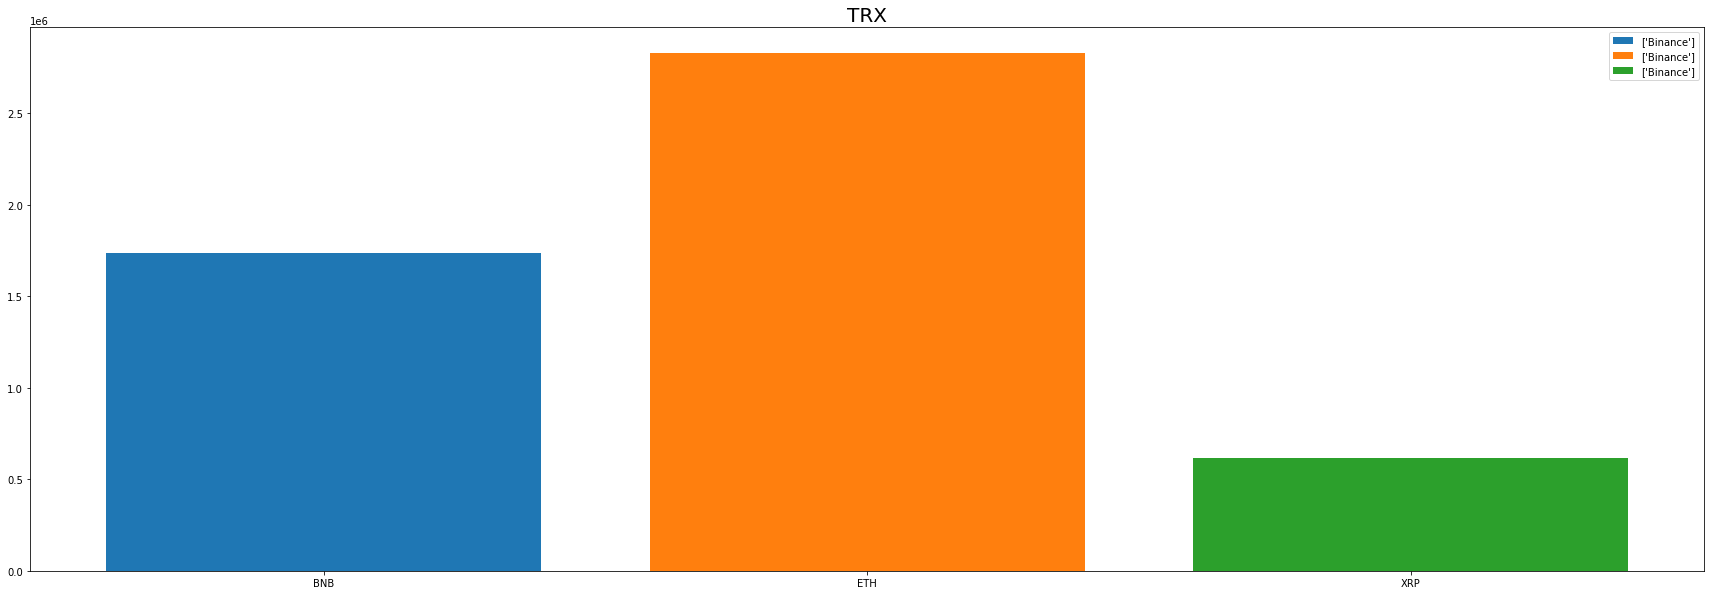

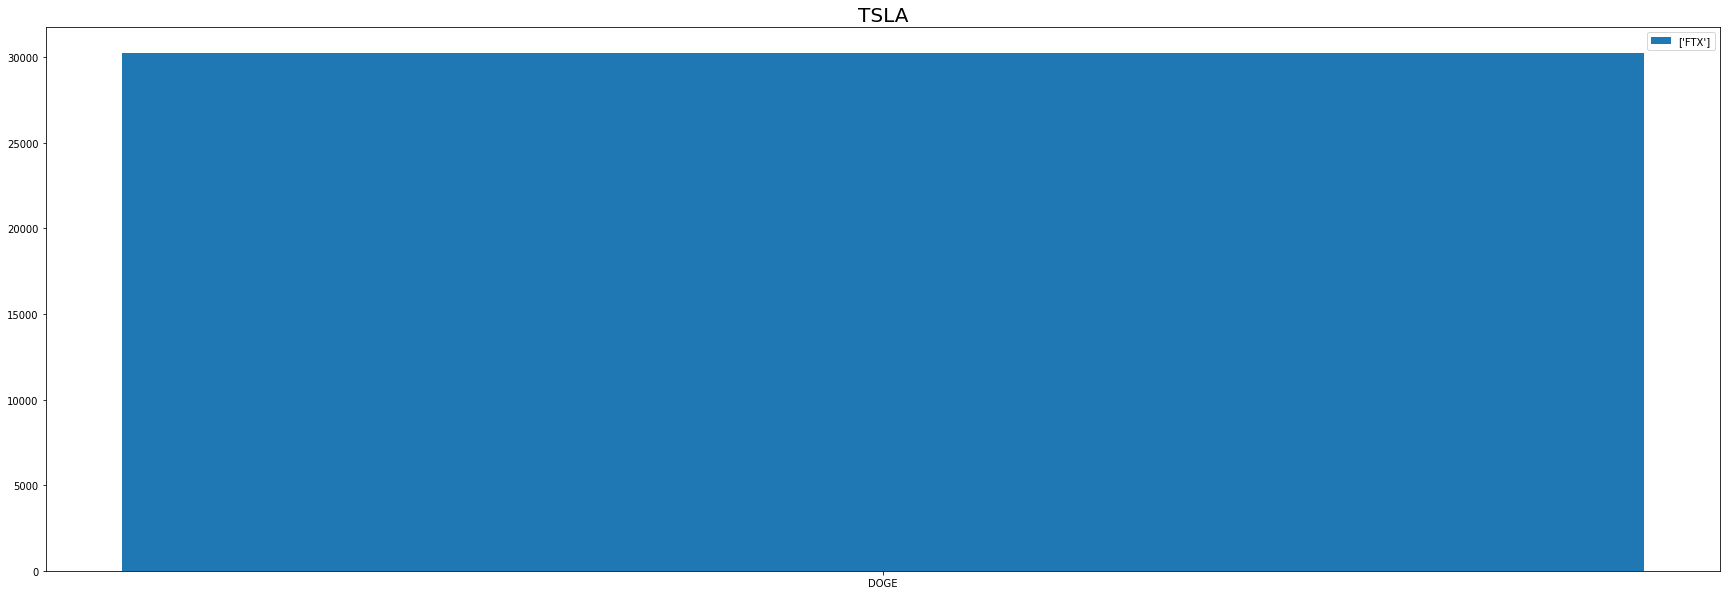

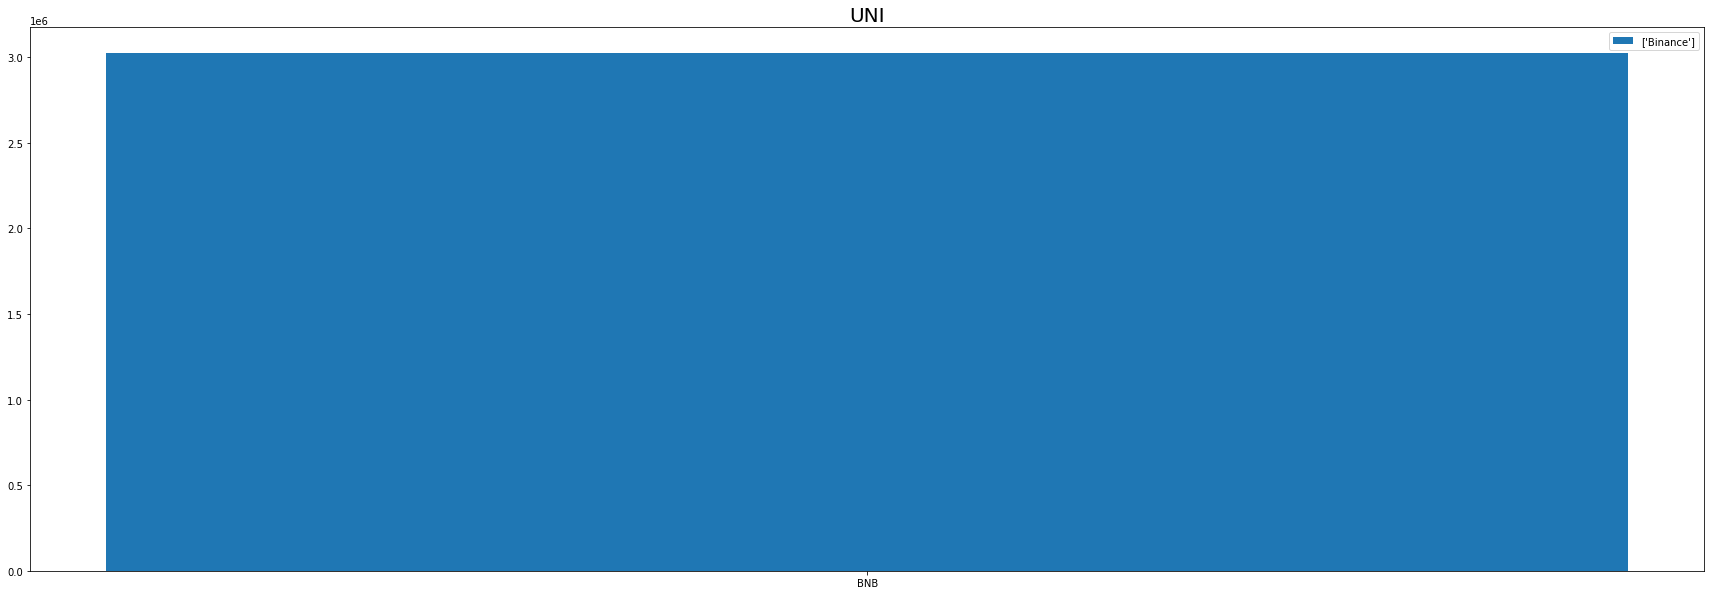

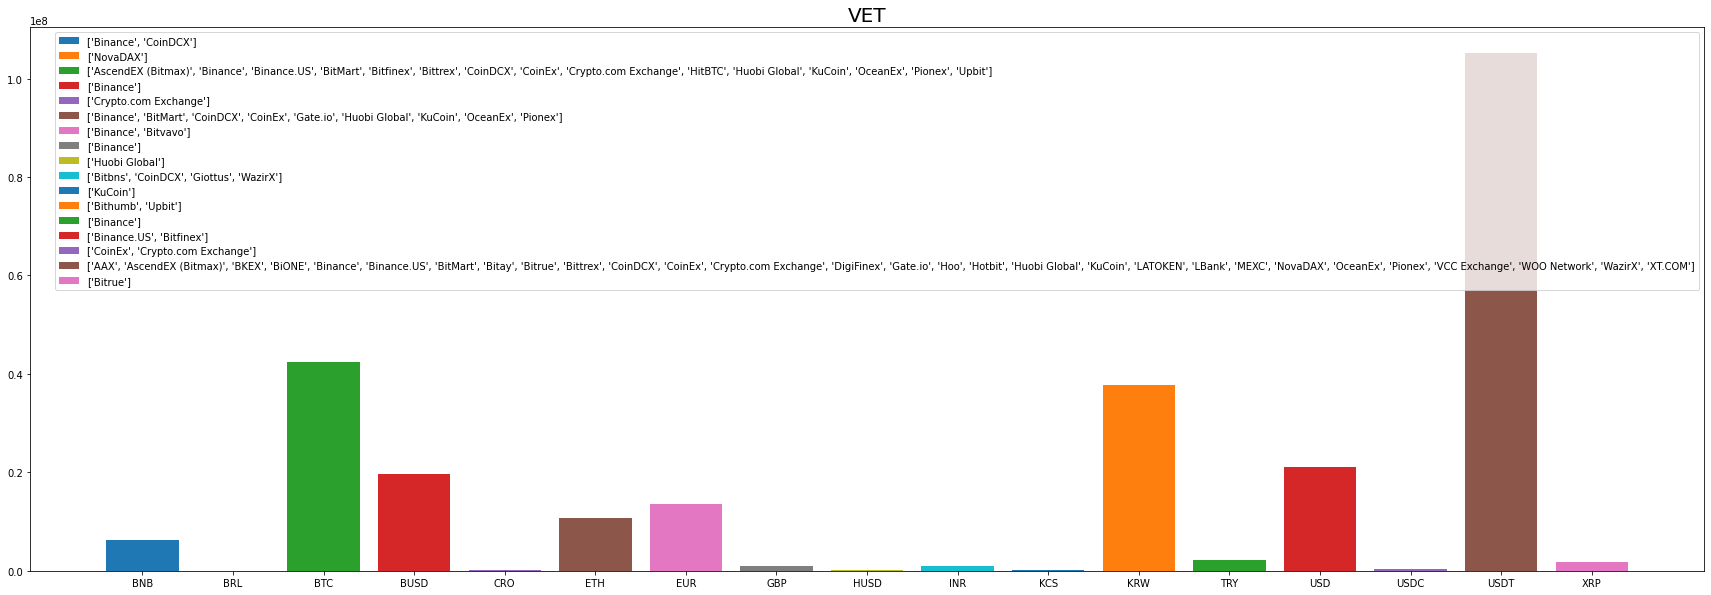

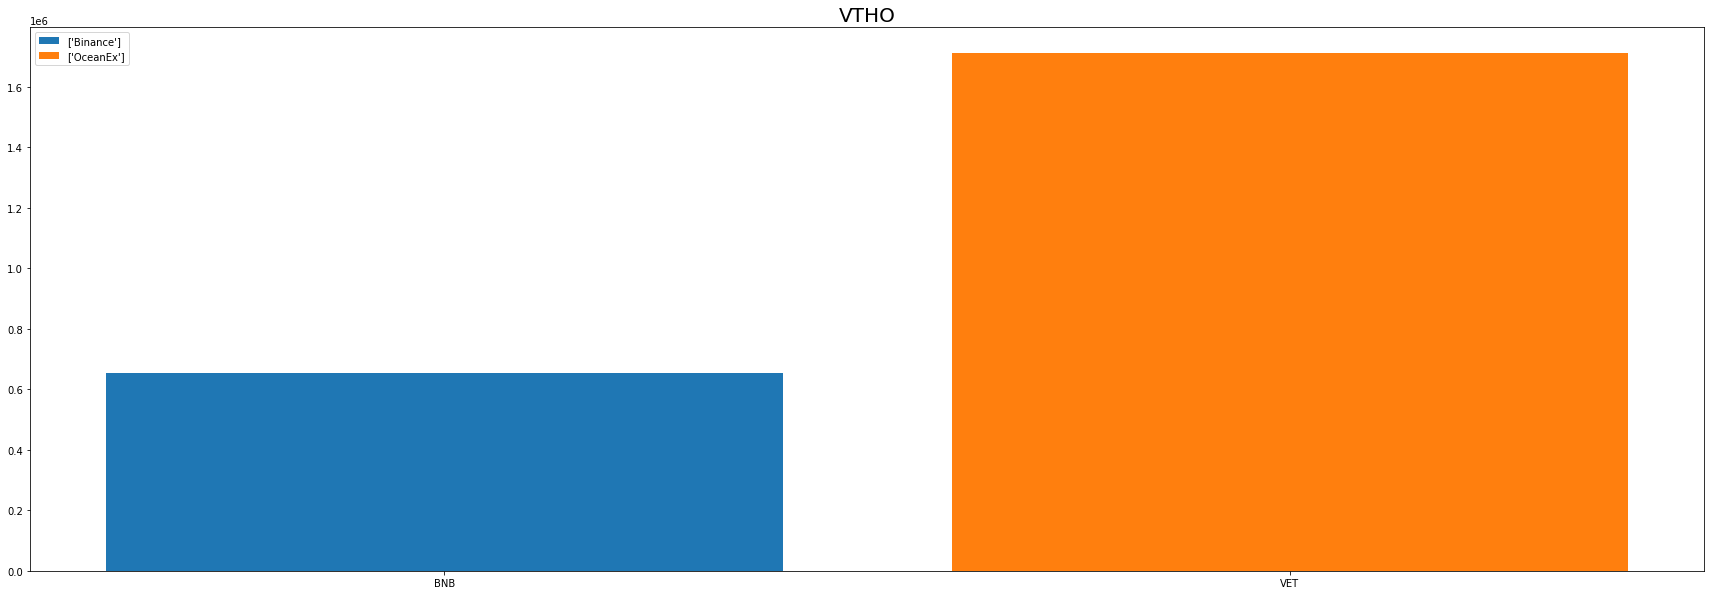

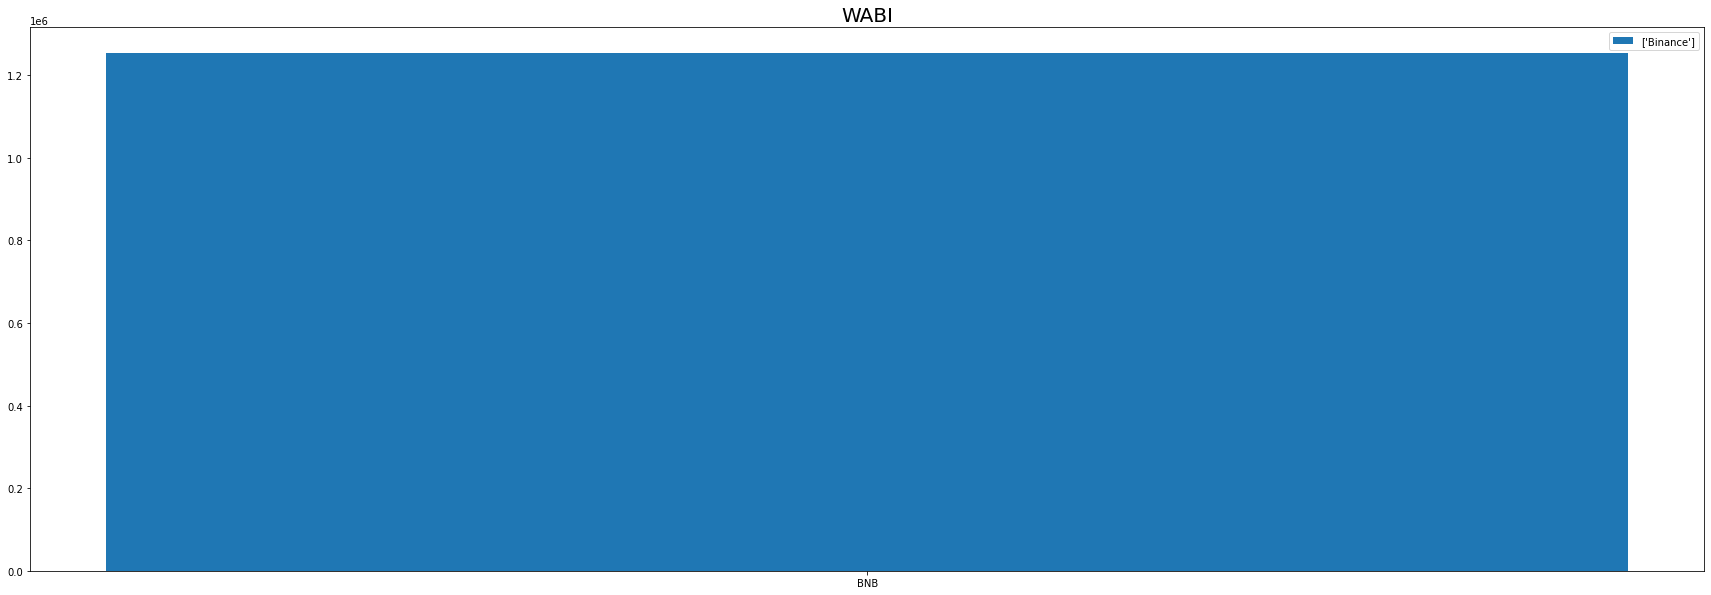

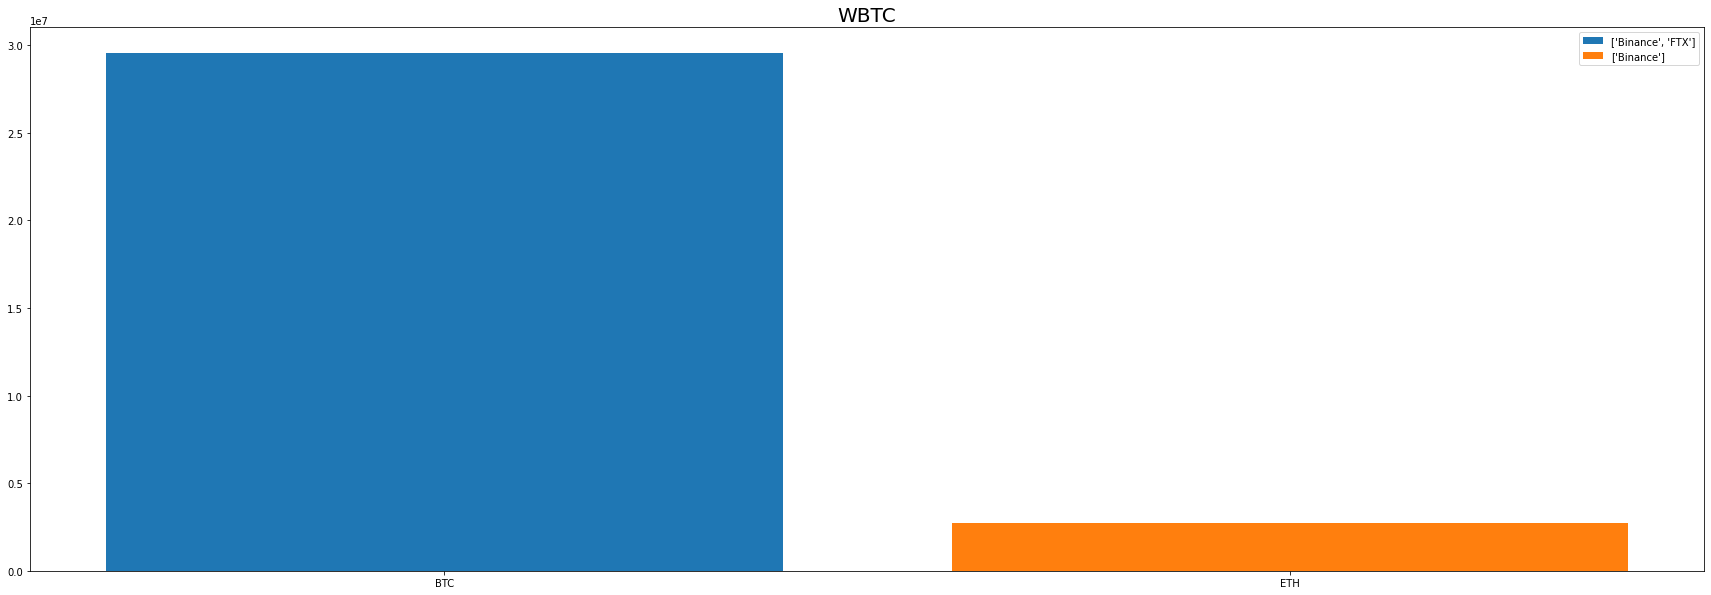

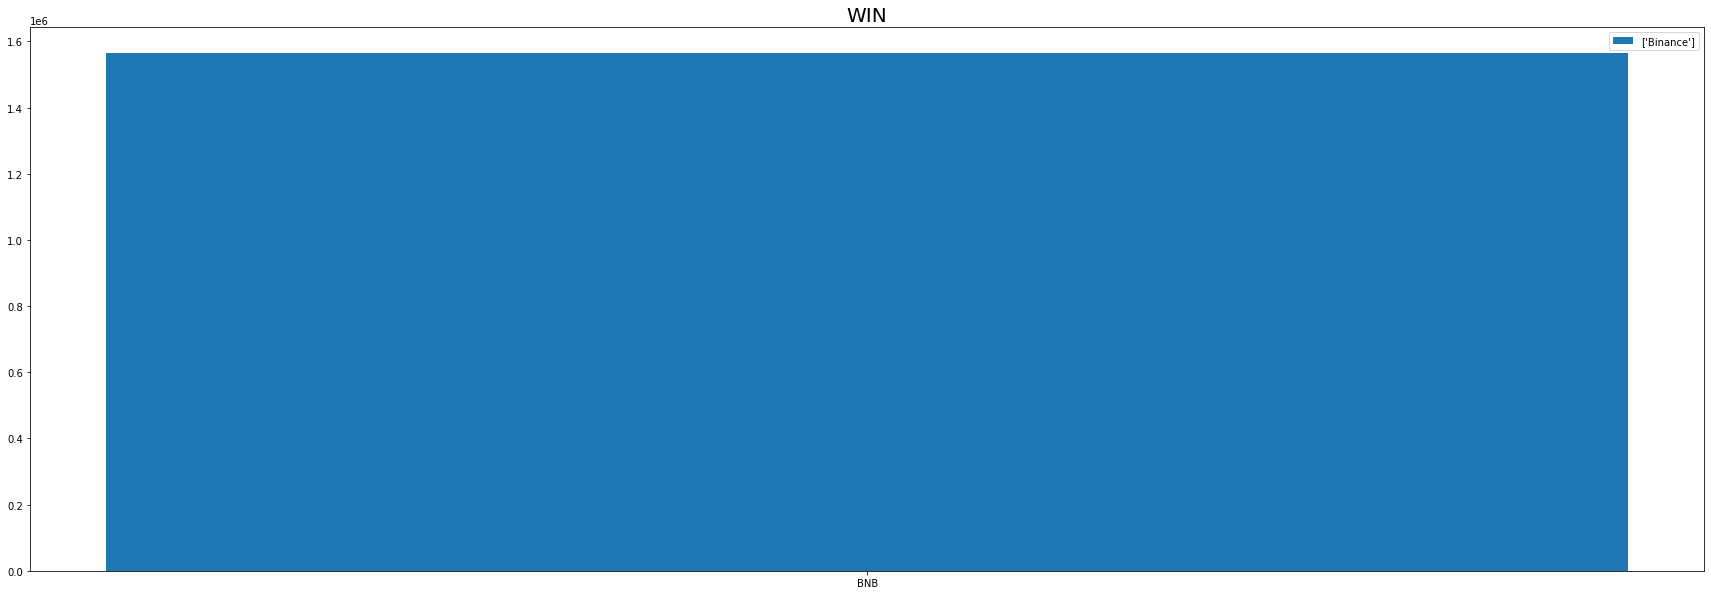

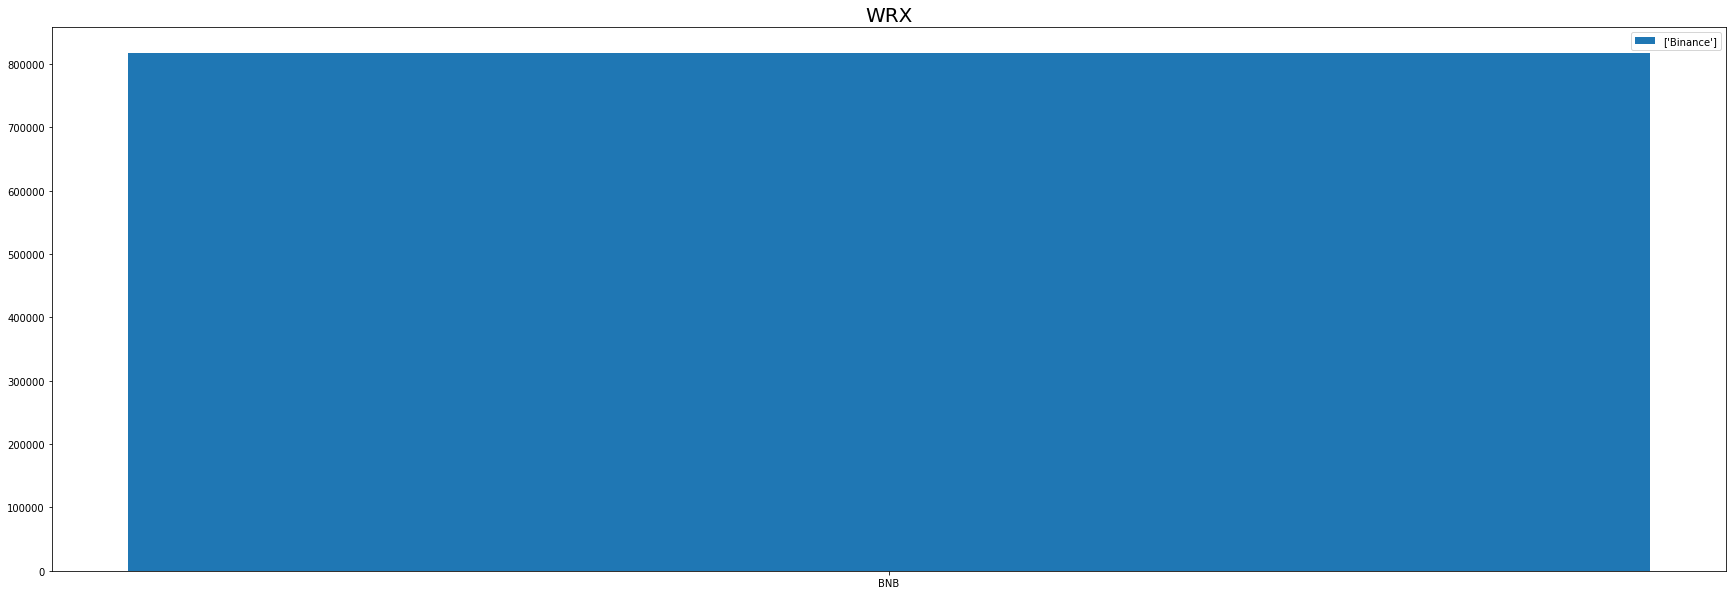

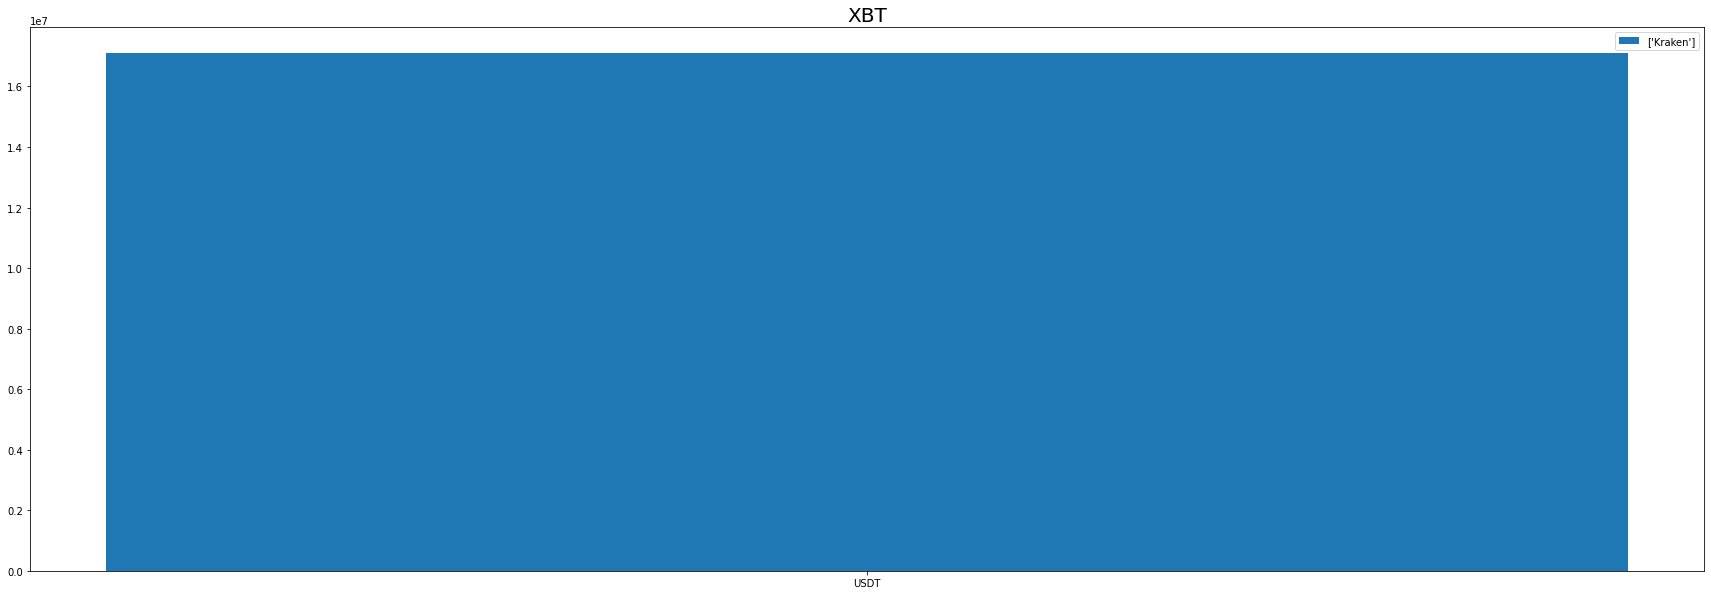

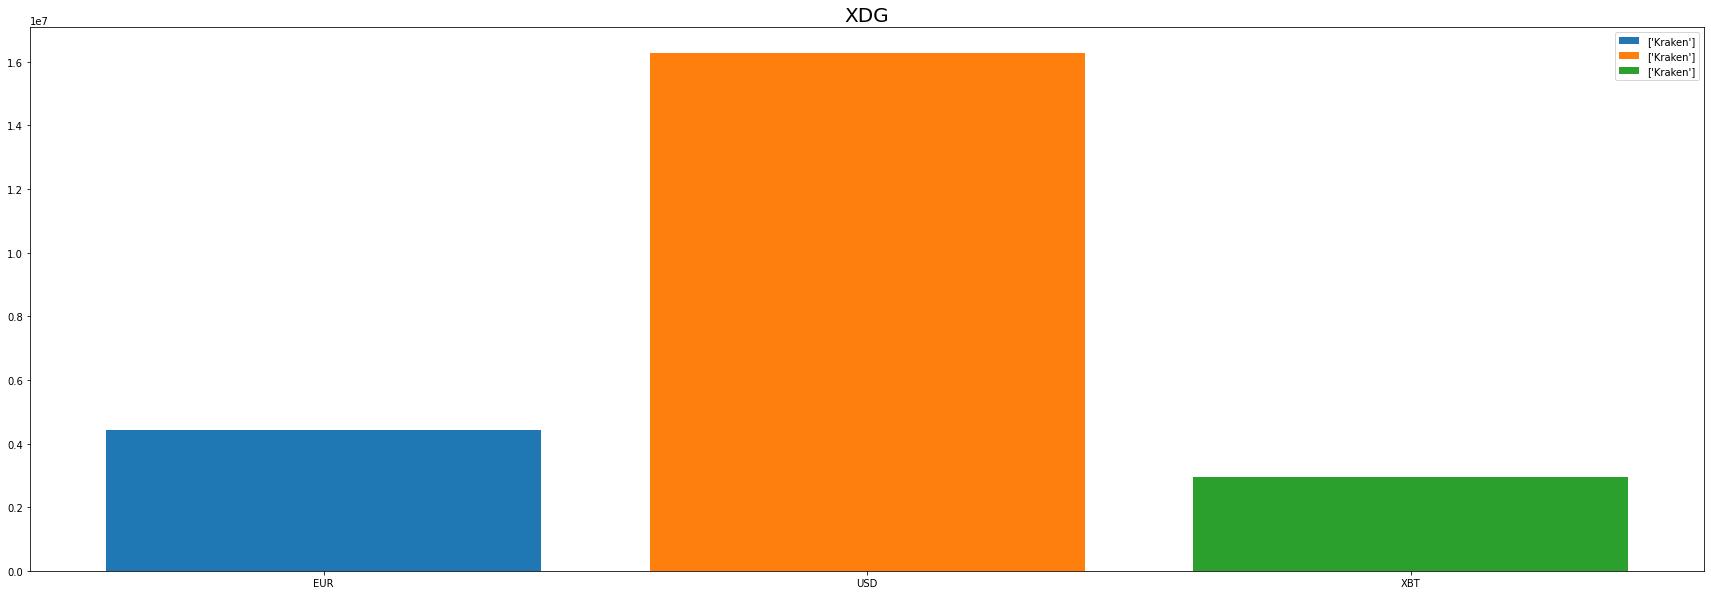

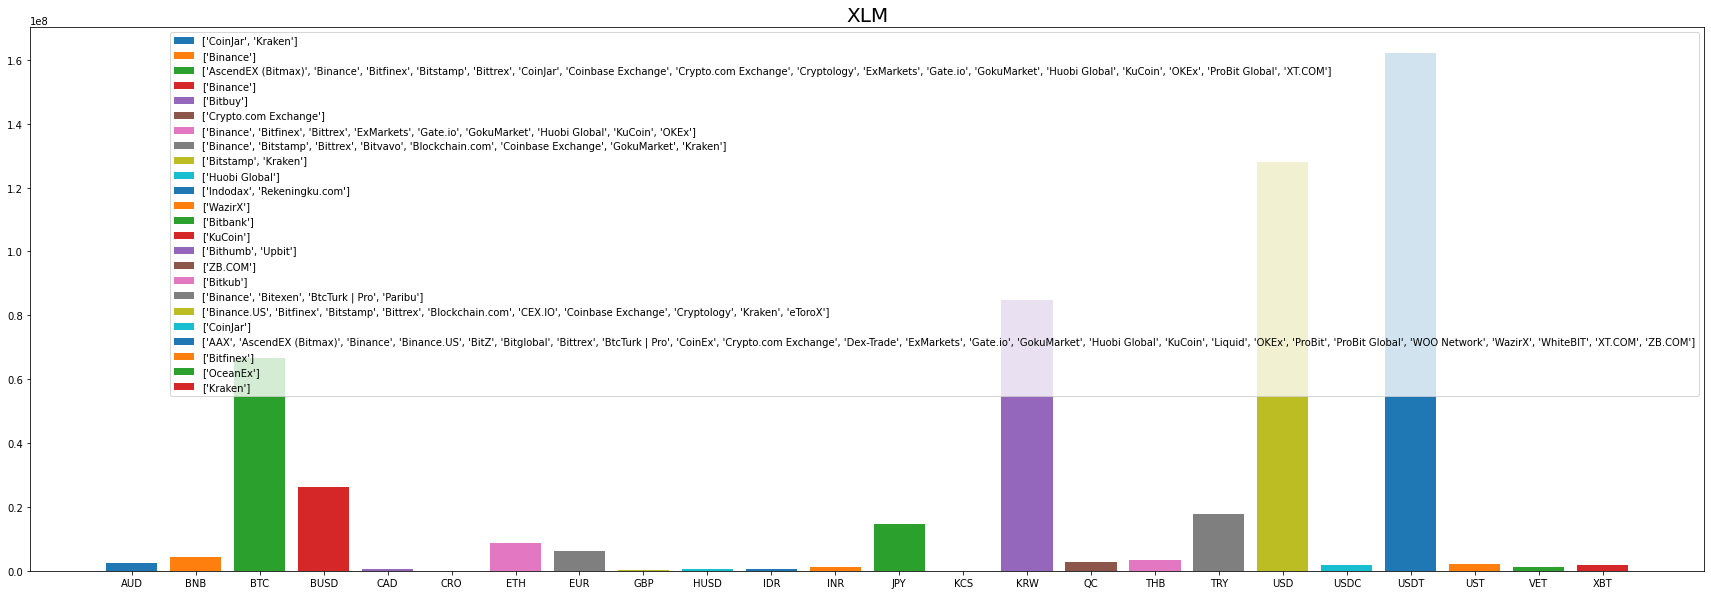

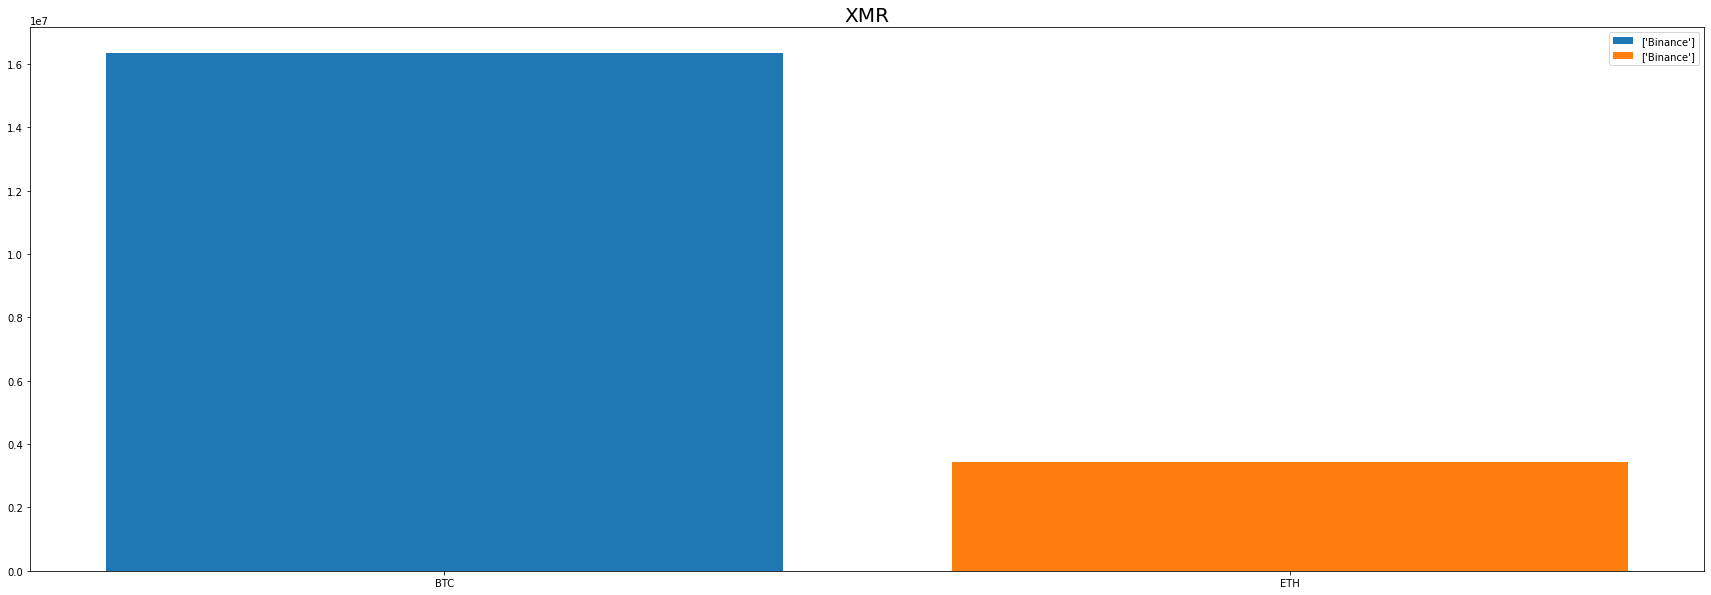

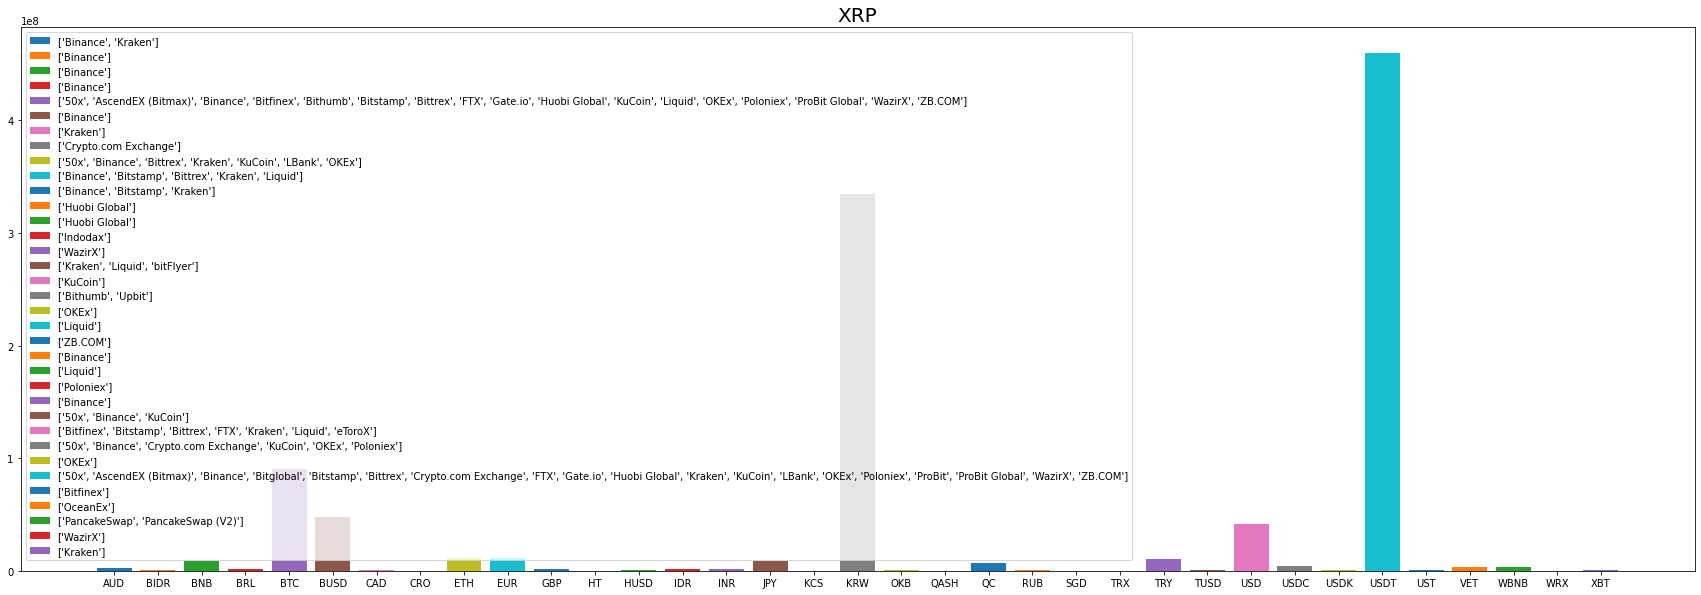

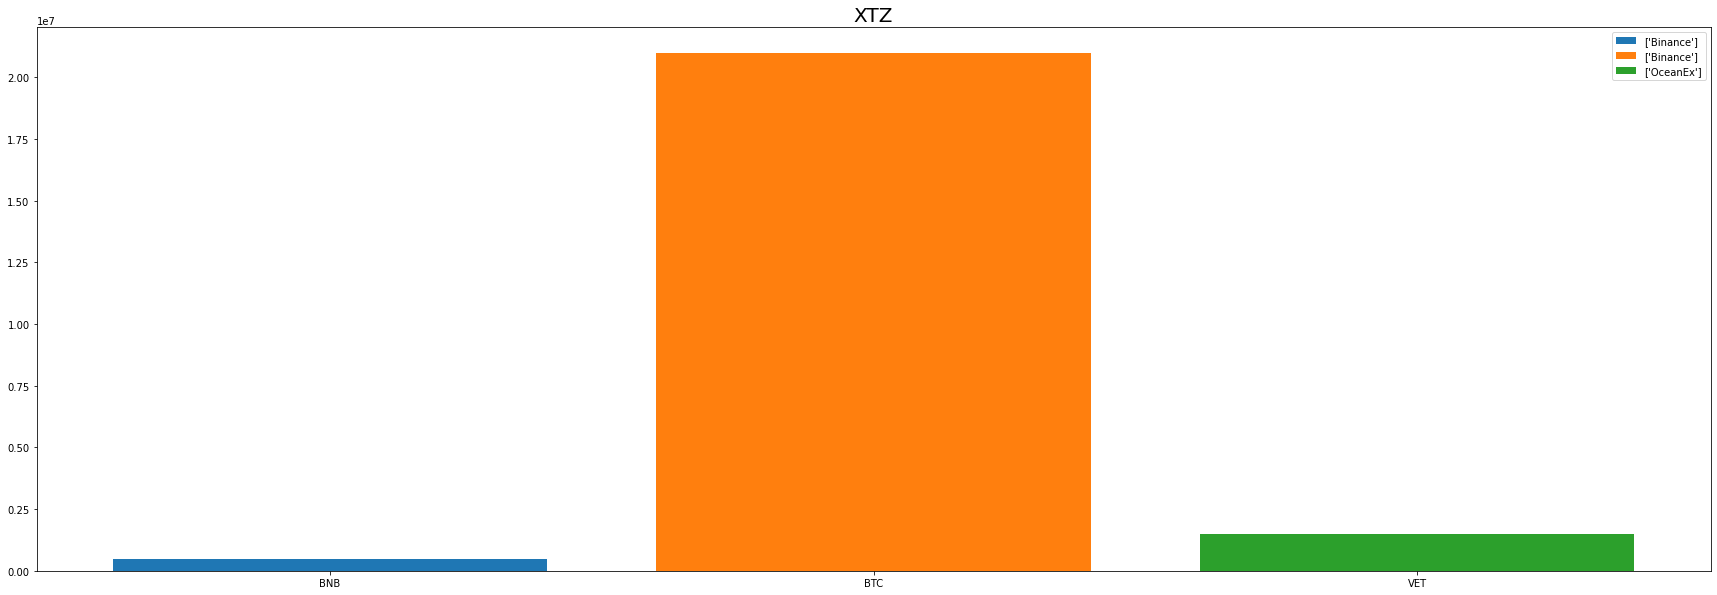

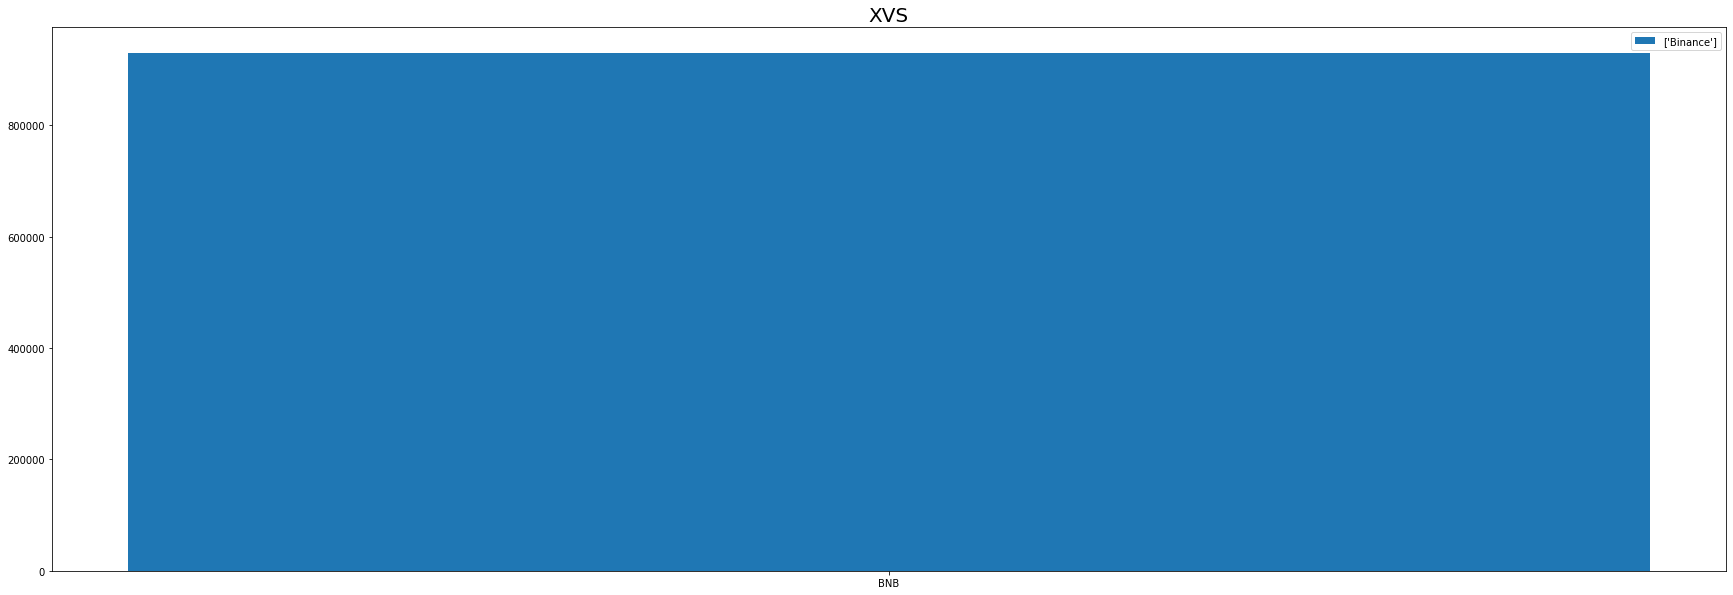

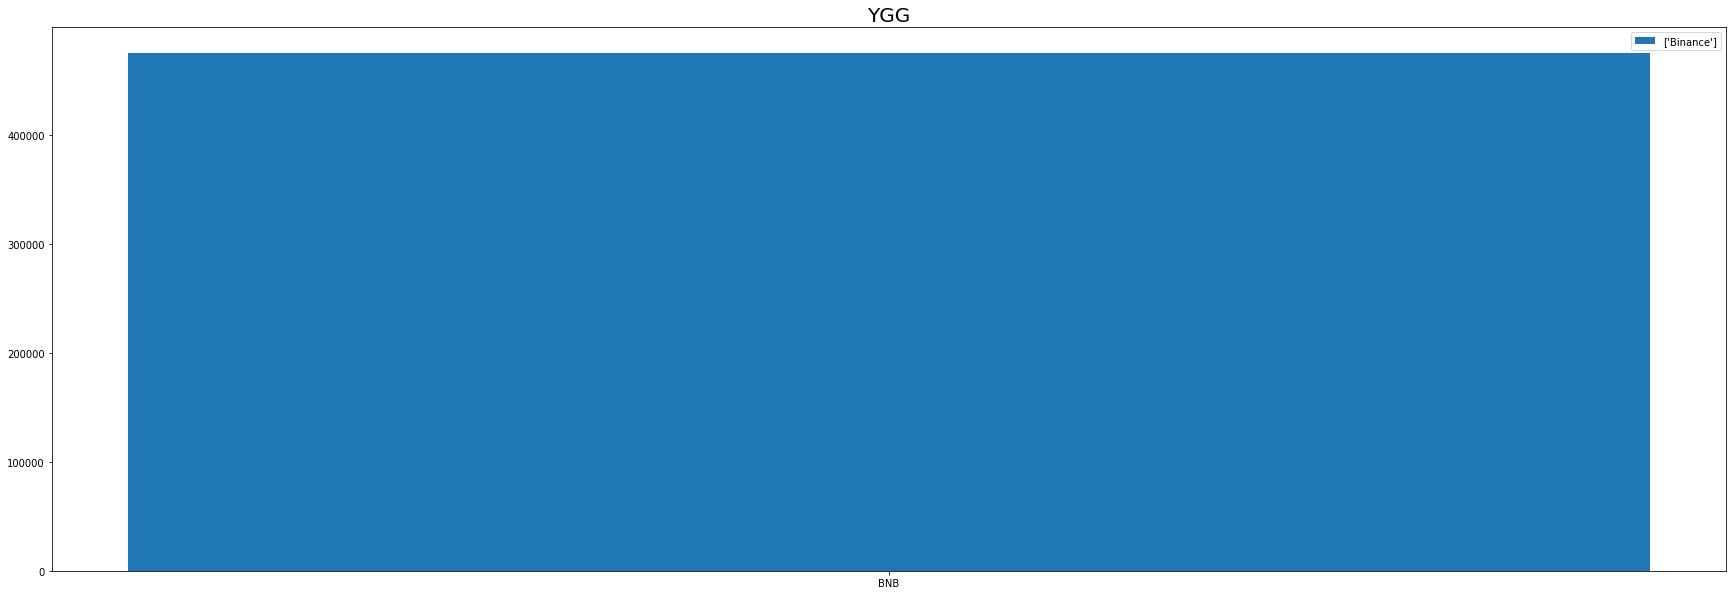

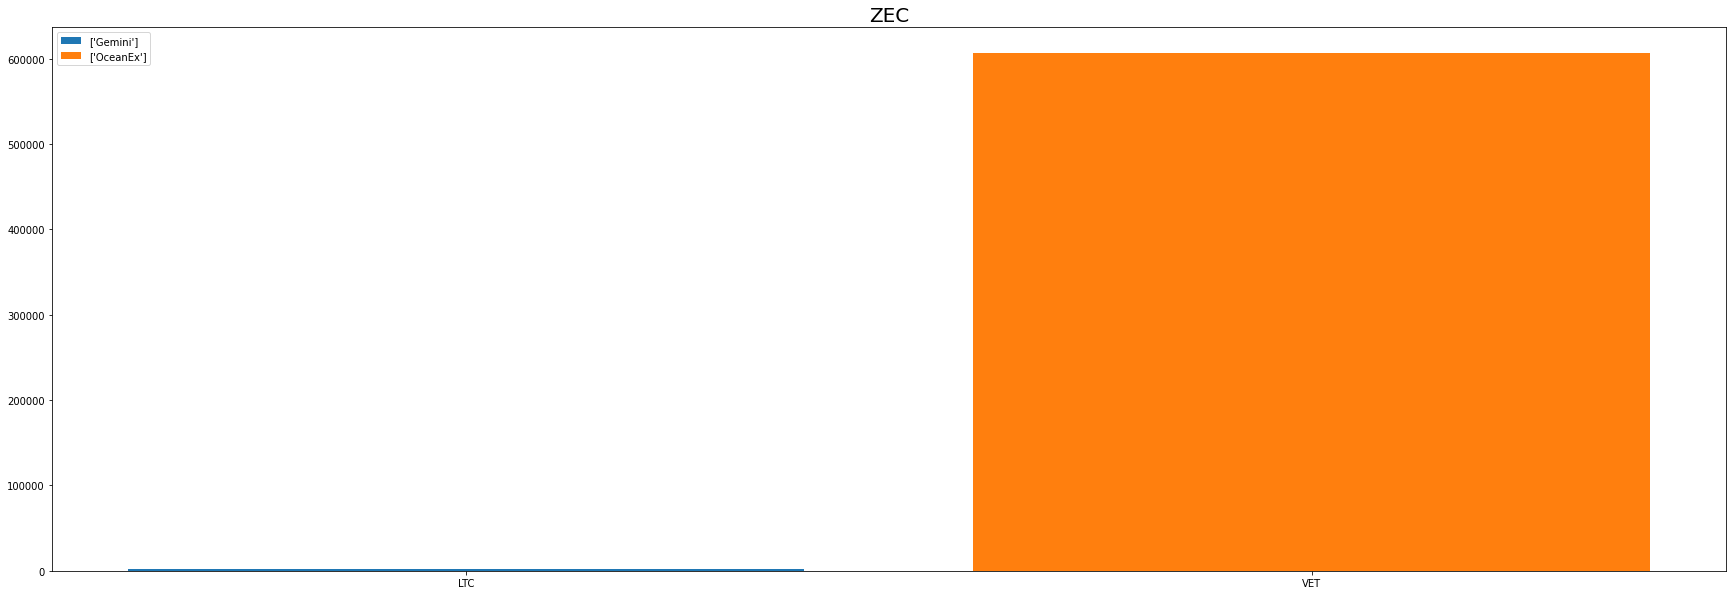

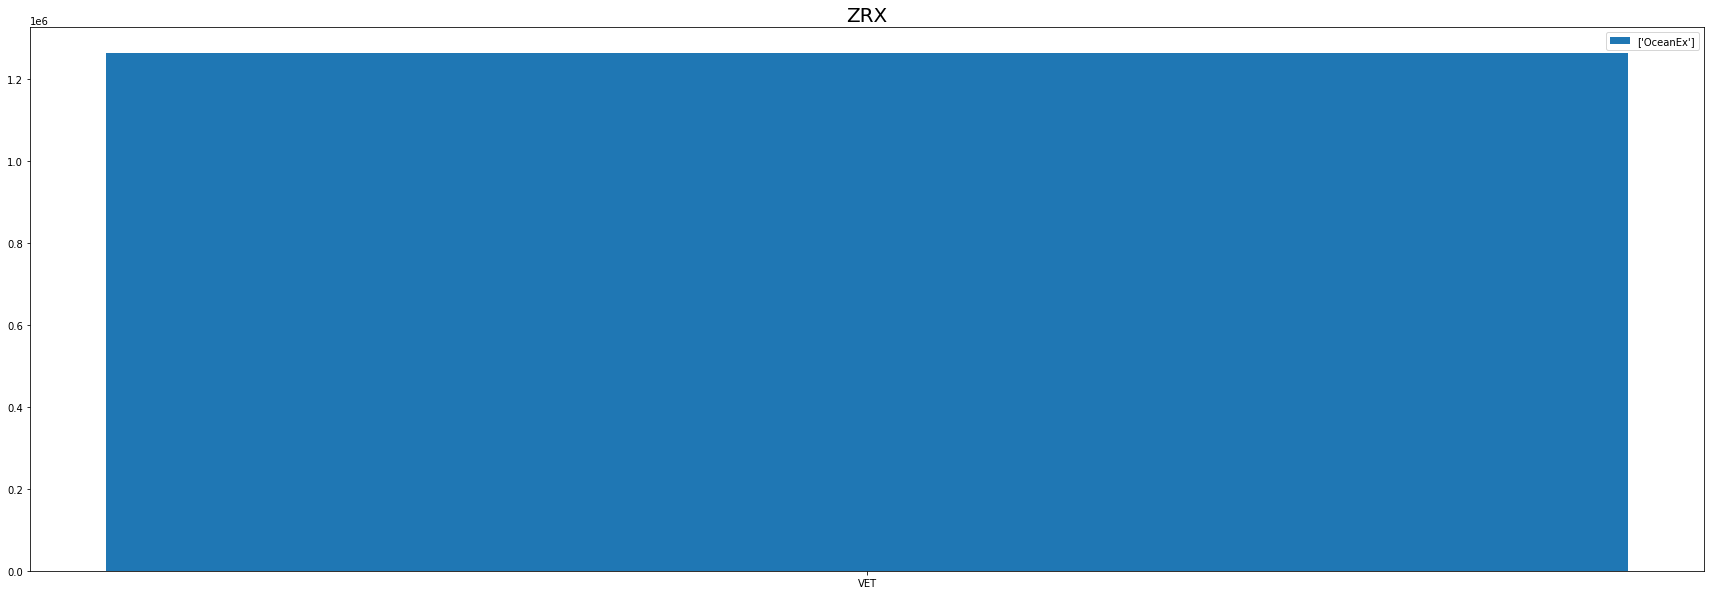

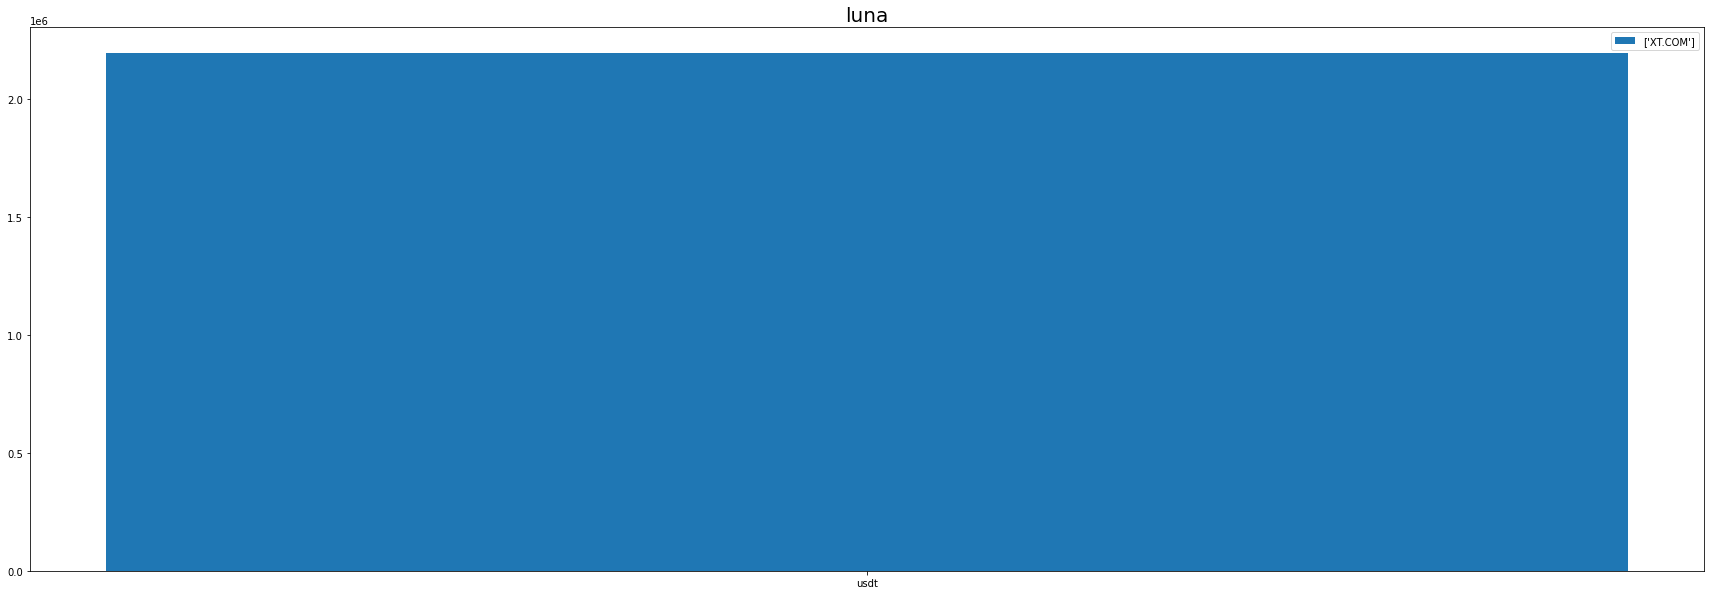

In [29]:
for i in range(len(Assets)):
  plt.figure(figsize=(30,10))
  for j in range(len(Quotes[i])):
    plt.bar(Quotes[i][j],Volumes[i][j])
  plt.legend(Exchanges[i])
  plt.title(Assets[i],fontsize=20)
  plt.show()

In [47]:
#Showing result images 
import os
images= []
for filename in os.listdir("images"):
  images.append(filename)
print(images)

['doge.png', 'atom.png', 'ada.png', 'ltc.png', 'etc.png', 'avax.png', 'matic.png', 'eth.png', 'sol.png', 'vet.png', 'bch.png', 'algo.png', 'xlm.png', 'fil.png', 'btc.png', 'dot.png', 'xrp.png', 'bnb.png', 'luna.png', 'icp.png']


In [70]:
def show_images(images, figsize=(40,20), columns = 4):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(image)

In [73]:
#Converting images to array
from PIL import Image
from numpy import asarray
images_array=[]
for i in images:
  path="images/"+i
  image = Image.open(path)
  arr = asarray(image)
  images_array.append(arr)

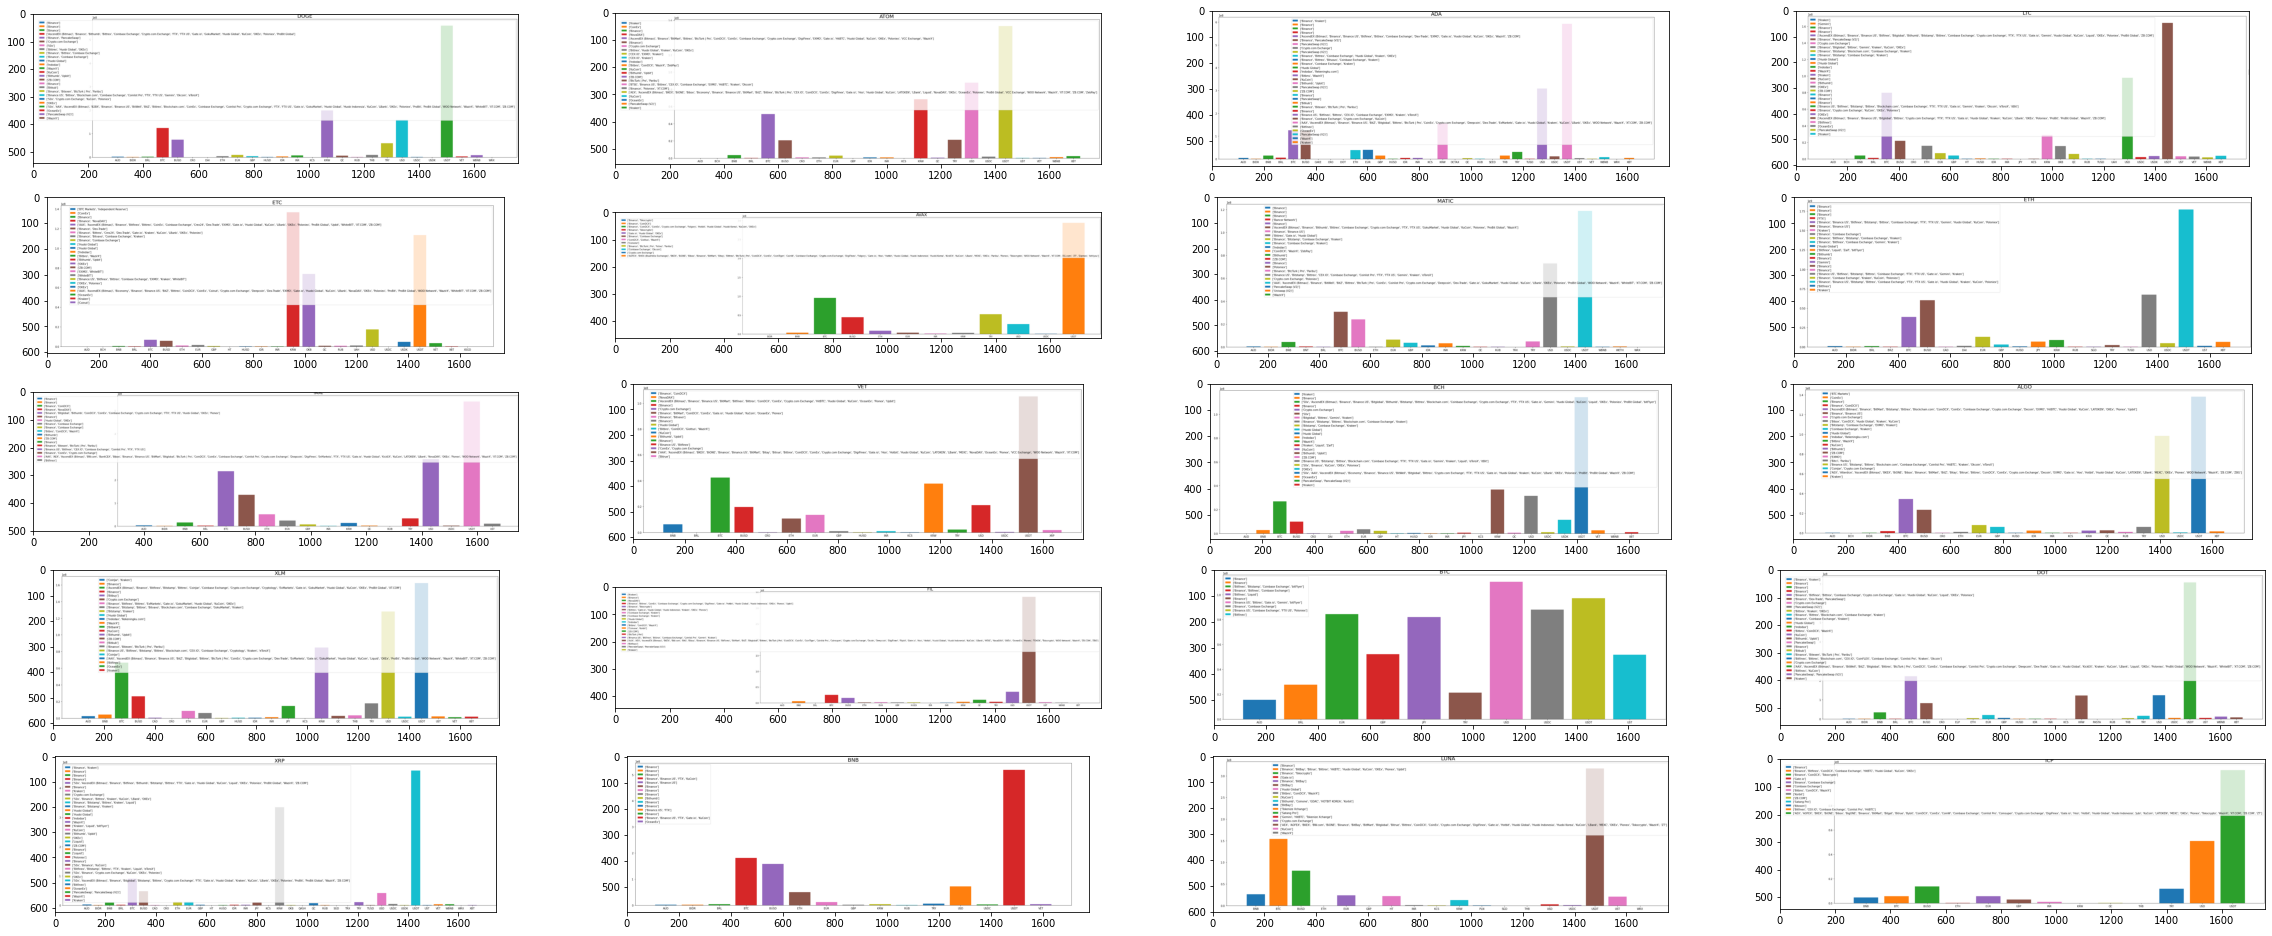

In [74]:
show_images(images_array)